## RAG System Project - Ricky Pang

#Executive Summary
A RAG (Retrieval-Augmented Generation) system operates as a question-answering framework that delivers responses grounded in contextual proprietary information, minimizing hallucinations and ensuring up-to-date accuracy. A basic RAG system comprises several key components: a chunking strategy, embeddings, a vector database, a retriever, a prompt template, and a large language model for text generation. By identifying weaknesses in this naive setup and addressing them with advanced techniques, a more robust system can be developed to produce more accurate and reliable text responses.
#Introduction
This proof-of-concept report addresses the challenge of effectively utilizing proprietary company documentation for question answering. Companies often aim to reduce reliance on tribal knowledge to bridge the knowledge gap that hinders new employees from making an immediate impact. New hires are frequently overwhelmed by the need to process vast amounts of job-critical information. In a sea of documentation, identifying relevant information for specific questions can be difficult and time-consuming. Even when the right document is found, the information is often so dense that extracting the necessary details for a given task becomes a significant challenge.

Large language models are good at what they do. They can take a prompt and generate a response cohesively and succinctly. They are also capable of generating detailed step by step instructions and long form summaries. One thing that they are not capable of is reliably providing current and accurate information. They also struggle with hallucination and often generate responses that read logically and sound correct but are wildly offbase in actuality. A rag system constricts an LLM by providing up to date and relevant context that the LLM’s response is conditioned on. A rag system can also be modified to generate responses that are appropriate to different audiences in the amount of information provided and the tone of the response. In this report the rag system aims to provide question answering services to both research and marketing teams.
#Key Findings
- RAG systems improve the response to questions that can be answered by portions of a knowledge corpus
- Chunking can be improved by breaking a document into its elements and using a mixture of semantic chunking and recursive text splitting
- Embedding models that are pre-trained on a diverse set of question-answer pairs generate a more reliable and accurate way of indexing documents
- Retrieval strategies such as cosine similarity, query expansion, query augmentation, and reranking improve response accuracy significantly
- Prompt engineering also improves performance quantitatively and qualitatively

#Methodology
The approach for this project involved developing a baseline model and iteratively enhancing it by addressing its weaknesses. The baseline model utilized a naive RAG system, which stored and retrieved documents as embedding vectors and generated responses based on these documents using an LLM. Subsequent improvements focused on resolving the baseline system's shortcomings, resulting in measurable enhancements to response metrics, both individually and on average.

This report highlights several key areas of weakness in a RAG system that can be addressed. A RAG system depends on critical components such as chunking, embedding, retrieval, prompt engineering, and inference. Each of these components presents unique challenges for developers, which are explored and resolved in this work.



#Validation Set

In [ ]:
##This cell is used for storing the questions and gold answers for evaluation - the indexing is sporadic so there is a portion on the bottom of the cell to correct this

validation_questions_answers = {
    0: {"question": "What purpose do large language models serve in the field of natural language processing?",
  "gold_answer_research": "Large language models (LLMs) serve the purpose of enabling general-purpose language generation and other natural language processing tasks such as classification. They achieve this by learning statistical relationships from text documents during computationally intensive self-supervised and semi-supervised training. LLMs can be used for text generation by predicting the next token or word, making them valuable for tasks like speech recognition, machine translation, and information retrieval. Additionally, LLMs have superseded previous models like recurrent neural networks, showcasing their efficiency and effectiveness in NLP tasks.",
  "gold_answer_marketing": "Large language models serve the purpose of improving performance in various natural language processing tasks, such as speech recognition, machine translation, natural language generation, optical character recognition, handwriting recognition, grammar induction, and information retrieval."},
1: {"question": "How does a large language model learn from text during training?",
  "gold_answer_research": "A large language model learns from text during training by first going through an unsupervised generative 'pretraining' stage where it sets initial parameters using a language modeling objective. Then, it goes through a supervised discriminative 'fine-tuning' stage where it refines its parameters based on annotated examples or task demonstrations. This dual-stage approach allows the model to learn statistical relationships from text documents in a computationally intensive process, enabling it to achieve general-purpose language generation and natural language processing tasks.",
  "gold_answer_marketing": "A large language model learns from text during training by first pretraining on a diverse dataset to acquire general language knowledge, and then fine-tuning on specific tasks or demonstrations to adapt its parameters for more targeted performance."},
2: {"question": "What are some key architectures behind the development of large language models?",
  "gold_answer_research": "Key architectures behind the development of large language models include the use of self-attention mechanisms, such as those seen in Transformer decoders. These architectures have been applied to tasks like autoregressive language modeling and have led to the dominance of Transformer-based language models in NLP. Models like BERT and GPT-2 have further advanced this paradigm, showcasing the power of large Transformer language models in achieving state-of-the-art results across various NLP tasks. Additionally, architectures like neural-retriever-in-the-loop generative-based models have shown improvements in tasks like open-domain QA and knowledge-grounded dialogue, emphasizing the importance of consistent and engaging responses in long-form generation and multi-turn conversations.",
  "gold_answer_marketing": "Key architectures behind the development of large language models include Transformer-based models such as BERT and GPT-2, which utilize self-attention mechanisms for tasks like autoregressive language modeling and knowledge-grounded dialogue. These models have shown significant success in NLP tasks and have led to advancements in general-purpose language generation and natural language processing."},
3: {"question": "Can you name some specific large language models and the companies or organizations that have developed them?",
  "gold_answer_research": "Some specific large language models include GPT-3 by OpenAI, Chinchilla by DeepMind, and BERT by Google. OpenAI developed GPT-3, DeepMind developed Chinchilla, and Google developed BERT. These models have been significant advancements in the field of natural language processing.",
  "gold_answer_marketing": "Chinchilla by DeepMind, GPT-3 by OpenAI."},
7: {"question": "What licensing models have been adopted for the distribution of source-available language models?",
  "gold_answer_research": "Based on the provided context, it seems that licensing models for the distribution of source-available language models have not been explicitly discussed in the referenced papers. However, it is crucial to consider potential licensing options such as open-source licenses (e.g., GPL, MIT) or proprietary licenses when distributing language models to ensure legal compliance and control over usage rights. Additionally, considering the implications of different licensing models on accessibility, collaboration, and commercialization is essential for determining the most suitable approach for sharing language models with the community. Further research or consultation with legal experts may be necessary to explore specific licensing strategies for source-available language models.",
  "gold_answer_marketing": "Answer: Some organizations choose open-sourcing, while others restrict access to a few organizations with resources or offer end-to-end deployment via API."},
8: {"question": "What are language models and what is their purpose in natural language processing?",
  "gold_answer_research": "Language models are probabilistic models of natural language that help predict or correct text. Their purpose in natural language processing is to assist in various tasks such as speech recognition, machine translation, natural language generation, and information retrieval. By analyzing the performance of human subjects, language models improve the understanding and generation of human-like text.",
  "gold_answer_marketing": "Language models are probabilistic models of natural language that are used in tasks such as speech recognition, machine translation, and natural language generation in natural language processing."},
9: {"question": "How have language models evolved in terms of architecture, from the 1980s to present times?",
  "gold_answer_research": "Language models have evolved significantly in terms of architecture from the 1980s to present times. In the 1980s, the first statistical language model was proposed, leading to experiments by IBM that identified areas for improvement by observing human subjects. However, it wasn't until 2017 when the transformer architecture was introduced by Google, revolutionizing the field. This development paved the way for models like BERT in 2018, which marked a shift towards large-scale transformer-based language models. These modern architectures, based on self-attention mechanisms, have dominated the field of natural language processing, achieving state-of-the-art performance in various tasks.",
  "gold_answer_marketing": "Language models have evolved from early statistical models in the 1980s to modern transformer architectures, such as BERT and GPT-2, which use self-attention mechanisms and have become dominant in natural language processing tasks."},
11: {"question": "Can you explain how maximum entropy language models work and what the partition function signifies?",
  "gold_answer_research": "Maximum entropy language models use feature functions to encode the relationship between a word and its n-gram history, aiming to maximize reward while satisfying a KL-constrained objective. The partition function, denoted as Z(x), is crucial in normalizing the probabilities of all possible outputs given the input. It represents the sum of the exponential of the reward function over all possible output sequences, making it computationally expensive to estimate but essential for accurate modeling. The partition function ensures that the model's predicted probabilities sum up to 1, providing a foundation for effective language modeling.",
  "gold_answer_marketing": "Maximum entropy language models encode the relationship between a word and the n-gram history using feature functions. The partition function in this context represents the total probability of all possible outcomes, making it a crucial factor in determining the optimal solution for the reward maximization objective."},
12: {"question": "What is the benefit of using continuous space embeddings in recurrent neural network language models?",
  "gold_answer_research": "Continuous space embeddings in recurrent neural network language models help alleviate the curse of dimensionality by representing words as non-linear combinations of weights in the embedding space. This approach helps address the data sparsity problem caused by the exponential increase in possible word sequences with vocabulary size. By utilizing continuous space embeddings, neural networks can effectively capture semantic relationships and meaning within the language model.",
  "gold_answer_marketing": "Continuous space embeddings in recurrent neural network language models help alleviate the curse of dimensionality caused by the exponential increase in possible word sequences, reducing data sparsity issues."},
13: {"question": "What challenges do large language models face in mirroring human cognitive patterns?",
  "gold_answer_research": "Large language models face challenges in mirroring human cognitive patterns because they sometimes learn patterns that humans do not learn, while also failing to learn patterns that humans typically learn. This discrepancy suggests that the models may not be plausible cognitive models, despite matching human performance in some tasks. Further research is needed to address these limitations and improve the alignment of large language models with human cognitive patterns.",
  "gold_answer_marketing": "Large language models sometimes learn patterns that humans do not learn and fail to learn patterns that humans typically do learn."},
16: {"question": "What factors influenced the development of generative language models by Anthropic?",
  "gold_answer_research": "Several factors influenced the development of generative language models by Anthropic, including the limitations in coding, math, and reasoning capabilities of the initial version Claude, the partnerships with companies like Notion and Quora to enhance the model's capabilities, and the need to address biases, unsafe content, and ethical considerations in training data. Additionally, the reliance on supervised learning and the need for controlled generation in generative models played a role in shaping the development of Anthropic's language models.",
  "gold_answer_marketing": "Factors that influenced the development of generative language models by Anthropic include partnerships with companies like Notion and Quora, limitations in coding, math, and reasoning capabilities in initial models like Claude, and the need to address biases and unsafe content in training datasets."},
17: {"question": "What is Constitutional AI and how does it affect the functionality of AI systems?",
  "gold_answer_research": "Constitutional AI is an approach developed by Anthropic for training AI systems, particularly language models like Claude, to be harmless and helpful without relying on extensive human feedback. It involves two phases: supervised learning, where the model generates responses to prompts and self-critiques based on a set of guiding principles, and reinforcement learning, where the model is trained with AI-generated feedback according to constitutional principles. This approach enables the training of AI assistants that are both helpful and harmless, with the ability to explain objections to harmful requests, enhancing transparency and reducing the need for human supervision.",
  "gold_answer_marketing": "Constitutional AI is an approach developed by Anthropic for training AI systems, particularly language models like Claude, to be harmless and helpful without relying on extensive human feedback. It involves supervised learning and reinforcement learning phases to guide the model's responses based on a set of guiding principles (a 'constitution'). This approach aims to create AI systems that are both helpful and transparent in their decision-making process, reducing the need for constant human supervision."},
18: {"question": "How do advances in AI models impact their ability to interact with different types of data, such as images?",
  "gold_answer_research": "Advances in AI models, such as multimodal models like RA-CM3, have significantly improved their ability to interact with different types of data, such as images. These models can refer to external memory, like web data, to increase their knowledge capacity, allowing them to generate correct images from entity-rich captions. Additionally, these models can perform image editing and manually specify examples in-context for better results. The use of large language models, combined with larger datasets and neural networks, has also enhanced their performance in tasks like image generation and text generation.",
  "gold_answer_marketing": "Advances in AI models, such as multimodal models like RA-CM3, allow for better interaction with different types of data, like images, by accessing external memory for increased knowledge capacity and improving performance in tasks like image generation and image editing."},
19: {"question": "What are the potential trade-offs between AI system alignment with ethical guidelines and practical utility?",
  "gold_answer_research": "The potential trade-offs between AI system alignment with ethical guidelines and practical utility include the risk of reduced performance and usability due to stringent ethical alignment measures, as seen with Claude 2. Users may face limitations and refusal of assistance for benign requests, leading to debates over the 'alignment tax' in AI development. Balancing ethical considerations with practical functionality is crucial to ensure alignment with ethical guidelines without compromising the practical utility of AI systems. Research is needed to find a middle ground that prioritizes ethical alignment while maintaining usability and performance.",
  "gold_answer_marketing": "The potential trade-offs between AI system alignment with ethical guidelines and practical utility include balancing stringent ethical alignment that may reduce usability and performance, ensuring transparency and fairness in alignment processes, and addressing the alignment tax that may impact adoption of AI systems."},
20: {"question": "How has the token handling capacity changed between different versions of the Claude model?",
  "gold_answer_research": "The token handling capacity has increased with each new version of the Claude model. Claude Instant has a context length of 100,000 tokens, Claude 2.1 doubled this to 200,000 tokens, and Claude 3 Opus default version has a context window of 200,000 tokens but can be expanded to 1 million for specific use cases. This progression shows a trend towards handling larger amounts of text data for improved performance and capabilities.",
  "gold_answer_marketing": "The token handling capacity has increased from Claude to Claude Instant to Claude 2.1, with Claude Instant having a input context length of 100,000 tokens, Claude 2.1 having a context window of 200,000 tokens, and Claude 3 Opus having a context window of 1 million tokens."},
22: {"question": "In what ways has the Claude model's ability to self-critique and revise its responses enhanced its transparency?",
  "gold_answer_research": "The Claude model's ability to self-critique and revise its responses has enhanced its transparency by allowing for iterative improvements based on past actions and mistakes. Through self-reflection, the model can refine its output by learning from feedback and generating special tokens to signal the need for retrieval or confirm the relevance, support, or completeness of its responses. This process ensures that the model's statements about the world are truthful and accurate, ultimately increasing transparency in its decision-making and reasoning processes.",
  "gold_answer_marketing": "The Claude model's ability to self-critique and revise its responses has enhanced its transparency by allowing it to generate text informed by retrieved passages, criticize the output, and signal the need for retrieval or confirm the output's relevance, support, or completeness. This self-reflection process helps improve the model's accuracy and reliability in generating responses."},
23: {"question": "How do subsequent versions of Claude compare in terms of their likelihood to produce false statements?",
  "gold_answer_research": "Claude Instant is a faster and lighter version of Claude, with an input context length of 100,000 tokens. In contrast, Claude 3 has faced criticism for its stringent ethical alignment, leading to a debate over the 'alignment tax' in AI development. Users have been refused assistance with benign requests, which has sparked discussions on balancing ethical considerations and practical functionality. This suggests that Claude Instant may have a lower likelihood of producing false statements compared to Claude 3 due to its focus on usability and performance.",
  "gold_answer_marketing": "Claude Instant is a faster, less expensive, and lighter version of Claude with a shorter input context length. Claude 3 has faced criticism for ethical alignment issues that may affect usability and performance."},
24: {"question": "Who developed the language model family known as Chinchilla?",
  "gold_answer_research": "The Chinchilla language model family was developed by the research team at DeepMind and presented in March 2022. It is named 'Chinchilla' as an advancement over the previous Gopher model family. The Chinchilla family has been trained to investigate the scaling laws of large language models and is designed to outperform GPT-3.",
  "gold_answer_marketing": "The research team at DeepMind developed the language model family known as Chinchilla."},
25: {"question": "What benchmark did Chinchilla achieve an average accuracy of 67.5% on?",
  "gold_answer_research": "Chinchilla achieved an average accuracy of 67.5% on the MMLU benchmark (Measuring Massive Multitask Language Understanding).",
  "gold_answer_marketing": "Chinchilla achieved an average accuracy of 67.5% on the MMLU benchmark (Measuring Massive Multitask Language Understanding)."},
27: {"question": "What is the relationship between Chinchilla and the Gopher language model families?",
  "gold_answer_research": "The Chinchilla family of transformer models is essentially the same as the Gopher family, with minor modifications and different training optimizers. Chinchilla uses AdamW optimizer while Gopher uses Adam optimizer. Additionally, Chinchilla uses relative positional encoding and RMSNorm instead of absolute positional encoding and LayerNorm used by Gopher. Chinchilla has 70B parameters and outperforms Gopher on the MMLU benchmark by 7%, showcasing an improvement in performance. Both families follow similar naming conventions and were developed to investigate the scaling laws of large language models.",
  "gold_answer_marketing": "Chinchilla is a family of transformer models developed by DeepMind, which is a further development over a previous model family named Gopher. Both model families were trained to investigate the scaling laws of large language models."},
28: {"question": "What distinguishes the architectures of the Chinchilla and Gopher family models in terms of optimization techniques used?",
  "gold_answer_research": "The main distinction in optimization techniques between the Chinchilla and Gopher family models lies in the choice of optimizers. The Gopher family utilizes the Adam optimizer, whereas the Chinchilla family is trained using the AdamW optimizer. Additionally, the Gopher family employs RMSNorm instead of LayerNorm, and relative positional encoding rather than absolute positional encoding. These differences in optimization techniques contribute to the unique characteristics and performance of each model family.",
  "gold_answer_marketing": "The Chinchilla family uses AdamW optimizer, while the Gopher family uses the Adam optimizer."},
30: {"question": "What is the recommended strategy for training large autoregressive language models with limited compute resources, as contributed by the Chinchilla team?",
  "gold_answer_research": "The Chinchilla team recommends that the number of training tokens should be doubled for every model size doubling to achieve better results on downstream tasks. They also suggest using larger, higher-quality training datasets to improve performance. Additionally, they mention the importance of balancing model size and efficiency to address computational costs and inference latency limitations. It is advised to focus on Transformer language models and consider sharing model parameters for quick task-switching when deploying as a service.",
  "gold_answer_marketing": "The Chinchilla team recommends doubling the number of training tokens for every model size doubling and using larger, higher-quality training datasets to achieve better results on downstream tasks."},
33: {"question": "What are some key areas of research in the field of artificial intelligence as reflected in recent academic literature?",
  "gold_answer_research": "Recent academic literature in the field of artificial intelligence reflects key areas of research such as natural language processing with state-of-the-art transformers, feature learning in infinite-width neural networks, diverse beam search for complex scene description, and the development of generative AI models capable of generating text and images. Additionally, research focuses on human preferences in dueling bandits, the use of few-shot learners in language models, and the exploration of knowledge-grounded neural conversation models. These areas of research highlight the advancements in AI technology and its applications across various domains.",
  "gold_answer_marketing": "Some key areas of research in artificial intelligence include natural language processing, deep neural networks, generative AI, AI safety, AI art, reinforcement learning, and language agents alignment."},
34: {"question": "What are some of the limitations of traditional position encoding methods in the architecture of pre-trained language models (PLMs), and what novel approach does the paper propose to address these issues?",
  "gold_answer_research": "One limitation of traditional position encoding methods in PLMs is that they may not enable length extrapolation of pre-existing models, leading to the need for substantial pre-training costs. The paper proposes a novel approach called Position Interpolation, which extends existing PLMs without deviating far from existing definitions of position encoding or attention mechanisms. This method allows for much extended context windows for text modeling, leading to significant perplexity gains and improved model performance.",
  "gold_answer_marketing": "Traditional position encoding methods in PLMs have limitations in enabling length extrapolation and adapting to extended context windows. The paper proposes a novel approach called Position Interpolation, which generates strong models that can effectively make use of much extended context windows. This method allows for substantial pre-training cost savings and preserves the quality of the original models, even for small context window tasks."},
35: {"question": "How does the Rotary Position Embedding (RoPE) approach in Transformers differ from the traditional additive method of position embedding with respect to encoding position information?",
  "gold_answer_research": "The RoPE approach in Transformers differs from the traditional additive method of position embedding by being multiplicative instead of additive. While traditional methods add position encoding to context representations, RoPE incorporates relative position information through rotation matrix product. This means that RoPE naturally includes relative position dependency in the self-attention formulation, without altering terms in the expanded formulation like the additive method does. Additionally, RoPE's properties show that it decays as the relative distance between positions increases, providing a clear theoretical interpretation of how position information is encoded.",
  "gold_answer_marketing": "The RoPE approach in Transformers differs from the traditional additive method of position embedding by incorporating relative position information through rotation matrix product instead of altering terms in the expanded formulation of additive position encoding."},
36: {"question": "What is the significance of comparing the normalized subspace similarity between ∆Wq, ∆Wv, and random Gaussian matrices when analyzing the adaptation of pre-trained language models?",
  "gold_answer_research": "Comparing the normalized subspace similarity between ∆Wq, ∆Wv, and random Gaussian matrices provides insight into the underlying mechanism for adapting pre-trained language models. It helps determine the intrinsic rank of the adaptation matrix ∆W and sheds light on the connection between ∆W and the original weight matrix W. By analyzing these similarities, we can understand how much of the adaptation is specific to the task at hand and how much is influenced by the pre-trained model. This comparison is crucial for optimizing the adaptation process and maximizing downstream performance in NLP tasks.",
  "gold_answer_marketing": "Comparing the normalized subspace similarity between ∆Wq, ∆Wv, and random Gaussian matrices helps understand the underlying mechanism for adapting pre-trained language models. It reveals the intrinsic rank and common singular value directions learned by different runs, shedding light on the fundamental principles of using pre-trained language models for downstream tasks in NLP."},
38: {"question": "What issues are associated with the homogeneity of language model training contractors, and how might it affect the behavior of the models?",
  "gold_answer_research": "The issues associated with the homogeneity of language model training contractors include potential biases in the labeling process, lack of diverse perspectives leading to limited coverage of sensitive content, and reduced robustness in model performance across different tasks. This homogeneity can affect the behavior of the models by reinforcing certain biases, increasing the risk of harmful content generation, and limiting the models' ability to generalize effectively. To address these issues, it is important to ensure diversity among labelers, incorporate varied perspectives in training data, and implement measures to enhance model robustness and performance across a range of tasks.",
  "gold_answer_marketing": "The homogeneity of language model training contractors can lead to biased or limited perspectives in the data, which may result in the models producing harmful content, gaming objectives, or lacking sensitivity to diverse viewpoints. This can affect the behavior of the models by reinforcing stereotypes, increasing toxicity, and reducing their ability to accurately represent under-represented groups."},
39: {"question": "What are common research topics and themes found in recent publications about artificial intelligence and natural language processing?",
  "gold_answer_research": "Recent publications in artificial intelligence and natural language processing have covered topics such as transformer models, feature learning in neural networks, attention mechanisms, multi-task benchmark platforms, semantic search using sentence embeddings, cross-task generalization, and question generation for question answering. Themes commonly explored include machine comprehension of text, reinforcement learning algorithms, sentence embeddings, semantic compositionality, reasoning with language models and knowledge graphs, and the gap between neural text and human text. These publications also delve into deep language understanding, retrieval-augmented transformers, image captioning, and open datasets for image-text pairs.",
  "gold_answer_marketing": "Common research topics and themes in recent publications on artificial intelligence and natural language processing include transformer models, attention mechanisms, semantic search, sentence embeddings, and question answering using language models and knowledge graphs."},
41: {"question": "Question: When conducting demographic and technical assessments of teams or research subjects, what types of data categories are typically collected and analyzed to ensure a comprehensive understanding of the group's composition and the methods used?",
  "gold_answer_research": "When conducting demographic and technical assessments of teams or research subjects, it is important to collect and analyze data categories such as age, gender, education level, professional background, and expertise in specific areas. By gathering information on these categories, you can ensure a comprehensive understanding of the group's composition and the methods used in your assessments. Additionally, it may be helpful to consider factors like cultural background, language proficiency, and geographical location to capture a more nuanced picture of the group being assessed. This detailed approach to data collection and analysis can provide valuable insights for making informed decisions and recommendations based on the gathered information.",
  "gold_answer_marketing": "Answer: Demographic data such as age, gender, education level, and technical data related to skills and experience are typically collected and analyzed for comprehensive understanding."},
43: {"question": "What kind of tasks can be performed using the datasets described in the provided text, and what are some common features of these datasets?",
  "gold_answer_research": "The datasets described in the provided text can be used for tasks such as question answering, duplicate question retrieval, entity retrieval, citation prediction, query understanding, document understanding, passage retrieval, text summarization, fact verification, and code search. Common features of these datasets include diverse task categories, comprehensive instructions, a wide range of synthetic user personalities and interaction patterns, and a focus on enhancing comprehension of documents to deliver accurate results. Additionally, the datasets cover a variety of domains such as public health, scientific exams, climate, and general knowledge.",
  "gold_answer_marketing": "The datasets described in the provided text can be used for tasks such as question answering, document summarization, duplicate question retrieval, code search, sentence simplification, dialogue generation, body retrieval, caption generation, fact verification, and more. Some common features of these datasets include diverse input-output pairs, incorporation of various knowledge-intensive datasets, and a focus on generating high-quality synthetic data points."},
44: {"question": "What conclusions can be drawn about the relationship between input prompt toxicity and output toxicity when using different language models and prompts?",
  "gold_answer_research": "Based on the findings presented in the results section, it can be concluded that the relationship between input prompt toxicity and output toxicity varies depending on the language model used and the specific prompt given. When instructed to produce a safe and respectful output, InstructGPT models generate less toxic outputs compared to GPT-3, but this advantage disappears when the respectful prompt is removed. On the other hand, when explicitly prompted to produce a toxic output, InstructGPT outputs are much more toxic than GPT-3 outputs. Additionally, the toxicity of the model outputs is highly correlated with the toxicity of the input prompt, as shown in Figure 39.",
  "gold_answer_marketing": "The study found that when instructed to produce a safe and respectful output, InstructGPT models generate less toxic outputs compared to GPT-3. However, this advantage disappears when the respectful prompt is removed. Interestingly, when explicitly prompted to produce a toxic output, InstructGPT outputs are much more toxic than GPT-3. This suggests that the toxicity of the output is highly correlated with the toxicity of the input prompt."},
45: {"question": "What are some challenges in training retrieval systems and how are negative samples used to address them?",
  "gold_answer_research": "Training retrieval systems face challenges such as redundancy in retrieved documents and lack of diversity in retrieval. Negative samples, including randomly sampled negatives, denoised hard negatives, and instruction-unfollowing negatives, are crucial for improving system performance. Carefully designed negative samples help the system effectively learn the task, but they can also lead to performance drops in out-of-domain datasets. Combining random samples and challenging negatives during training is key to building a competitive system for both in-domain and out-of-domain retrieval.",
  "gold_answer_marketing": "Some challenges in training retrieval systems include high cost of annotating datasets for new tasks and improving performance in zero-shot settings. Negative samples, such as denoised hard negative documents and instruction-unfollowing negative documents, are used to train retrieval systems effectively and address performance drops in out-of-domain datasets."},
46: {"question": "What factors have been found to potentially impact the ability of models to follow instructions, based on the analysis provided?",
  "gold_answer_research": "Based on the analysis provided, factors that have been found to potentially impact the ability of models to follow instructions include the human feedback obtained from contractors, which may be influenced by their beliefs, cultural backgrounds, and personal history. Additionally, the model's behavior can be affected by false premises in instructions, tendencies to hedge, and performance degradation with multiple explicit constraints in instructions. The models are also not fully aligned or safe, as they can generate toxic or biased outputs, make up facts, and fail to generate reasonable outputs in some cases.",
  "gold_answer_marketing": "Factors that may impact the ability of models to follow instructions include false premises in instructions, models hedging unnecessarily, performance degradation with multiple constraints in instructions, generation of toxic or biased outputs, and over-generalization leading to refusal of innocuous instructions."},
47: {"question": "What are some key factors to consider when building a successful multi-task instruction-following retrieval system as identified in the research?",
  "gold_answer_research": "Some key factors to consider when building a successful multi-task instruction-following retrieval system include the need for cross-task interdependence for training a single retriever, the flexibility and zero-shot transfer enabled by instructions compared to task identifiers, and the elimination of the need for hosting multiple task-specific retrievers. Additionally, optimizing the mix and volume of instructional data for diverse tasks is crucial, as well as considering the impact of ranking strategy in data construction. Finally, the effectiveness of the dataset scale in retrieval and the importance of carefully designed negative samples should be taken into account for improved efficiency of instruction-following retrievers.",
  "gold_answer_marketing": "Key factors to consider when building a successful multi-task instruction-following retrieval system include the effectiveness of the dataset scale in retrieval, the diversity in data and model scale, carefully designed negative samples, and the ability to adapt to new tasks via instructions."},
48: {"question": "What are the benefits of using retrieval-augmented techniques in multimodal language modeling, as demonstrated by the performance of the RA-CM3 model in the document?",
  "gold_answer_research": "The benefits of using retrieval-augmented techniques in multimodal language modeling, as demonstrated by the performance of the RA-CM3 model, include significantly better training efficiency with less training compute, outperforming existing models by using less training data, compute, and parameters. The retrieval augmentation allows the model to focus on learning how to use retrieved documents in context, leading to improved accuracy in classification tasks. Additionally, the RA-CM3 model achieves strong performance in image and caption generation, surpassing existing models like DALL-E and Flamingo despite using fewer resources.",
  "gold_answer_marketing": "The benefits of using retrieval-augmented techniques in multimodal language modeling, as demonstrated by the performance of the RA-CM3 model in the document, include outperforming existing models by using less training data, compute, and parameters, achieving significantly better training efficiency, and improving accuracy in k-shot classification tasks. Additionally, retrieval augmentation allows the model to focus on learning how to use retrieved documents in context, leading to stronger performance in tasks such as image and caption generation."},
50: {"question": "What methods are typically employed to create training data for embedding models that use task-specific instructions?",
  "gold_answer_research": "To create training data for embedding models that use task-specific instructions, a common method is to combine datasets from different sources, such as the SuperNaturalInstructions dataset with existing collections designed for embedding training. The SuperNaturalInstructions dataset provides natural language instructions, which can be paired with positive and negative examples to form training samples. Additionally, for tasks like classification or similarity, training samples can be constructed by selecting text sequences associated with different classes or similarities. This diverse training data is essential for instruction-based finetuning, which enables the embedding model to learn from a wide range of tasks and domains.",
  "gold_answer_marketing": "Training data for embedding models that use task-specific instructions is typically created by formulating a wide variety of tasks as text-to-text problems, distinguishing good/bad candidate outputs given an input text. This is done by combining datasets with natural language instructions and constructing positive and negative pairs for training."},
51: {"question": "Question: What are some of the challenges and innovations associated with fine-tuning large language models, and how does the approach discussed in the referenced text aim to address them?",
  "gold_answer_research": "Some challenges associated with fine-tuning large language models include limited access to and manipulation of knowledge, lagging performance on knowledge-intensive tasks, and the need for provenance in decision-making and updating world knowledge. The approach discussed in the referenced text aims to address these challenges by utilizing Retrieval Augmented Generation (RAG), which involves retrieving relevant passages from a corpus to feed to the language model for improved performance in tasks such as question-answering and dialogue. This iterative approach focuses on improving alignment with user intent and fine-tuning models to control sentiment and improve response quality in various language tasks.",
  "gold_answer_marketing": "The challenges with fine-tuning large language models include aligning them with user intent and controlling the quality of generated outputs. The approach discussed in the referenced text aims to address these challenges by using Retrieval Augmented Generation (RAG) to retrieve relevant passages from a corpus and feed them to the language model, improving alignment and performance."},
52: {"question": "What is a common technique used to address the outlier issue when applying block-wise k-bit quantization to input tensors, and how does it work?",
  "gold_answer_research": "A common technique used to address the outlier issue when applying block-wise k-bit quantization to input tensors is to chunk the input tensor into blocks that are independently quantized, each with their own quantization constant. This approach involves dividing the input tensor into contiguous blocks of size B by flattening the tensor and slicing it into n blocks, where n is determined by the size of the blocks. Each block is then quantized independently using a quantization constant c, which helps prevent outlier values from causing performance degradation.",
  "gold_answer_marketing": "A common technique used to address the outlier issue when applying block-wise k-bit quantization to input tensors is to chunk the input tensor into blocks that are independently quantized, each with their own quantization constant. This helps prevent performance degradation by reducing the impact of outliers on the quantization process."},
54: {"question": "What considerations or techniques are commonly implemented when setting up finetuning experiments for machine learning models?",
  "gold_answer_research": "When setting up finetuning experiments for machine learning models, it is common to use a two-stage approach. The initial stage involves setting the initial parameters using a language modeling objective. This is followed by a supervised discriminative 'fine-tuning' stage to adapt these parameters to the target task. Additionally, it is typical to train all models using the Adam optimizer and a triangular learning rate scheduler with 10% warmup. Experimentation with different hyperparameters such as number of epochs, peak learning rate, and batch size is also conducted to optimize model performance. Finally, utilizing a mixture of datasets and balancing the sizes of datasets can help improve the robustness and generalization of the finetuned models.",
  "gold_answer_marketing": "Considerations for setting up finetuning experiments for machine learning models commonly include using a language modeling objective for initial parameter setting and supervised discriminative fine-tuning for adapting parameters to the target task. Techniques such as hyperparameter search, Adam optimizer with triangular learning rate scheduler, and balancing dataset sizes through mixing strategies are also commonly implemented. Additionally, freezing some model layers during fine-tuning and incorporating negative examples for contrastive learning can be effective strategies."},
55: {"question": "What are the implications of the equivalence relation defined in the theoretical analysis of the DPO model for understanding the relationship between reward functions in reinforcement learning?",
  "gold_answer_research": "The equivalence relation defined in the theoretical analysis of the DPO model implies that two reward functions are considered equivalent if they differ by a constant function. This means that the class of learned reward models is not constrained by this reparameterization, allowing for the exact recovery of the optimal policy. Understanding this relationship between reward functions in reinforcement learning helps in defining a unique reward function within each equivalence class, which is crucial for optimizing policies under existing models of human preferences. It also highlights the generality and flexibility in the reward model due to the proposed reparameterization.",
  "gold_answer_marketing": "The equivalence relation defined in the theoretical analysis of the DPO model shows that two reward functions are considered equivalent if they differ by a fixed function. This implies that different reward functions can lead to the same optimal policy, allowing for flexibility in designing reward models in reinforcement learning."},
59: {"question": "Considering the structure and content of the provided text, what guidelines should be used to evaluate the effectiveness of a summary or chatbot response in this context?",
  "gold_answer_research": "To evaluate the effectiveness of a summary or chatbot response in this context, guidelines should include assessing the faithfulness of the answer to the retrieved context, the relevance of the answer to the question, and the focus of the retrieved context. Additionally, consider using quality metrics such as answer relevancy to rank responses based on how directly they address the question and avoid redundant or incomplete information. Lastly, take into account the performance of different tasks such as summarization, citation prediction, and passage ranking to determine the overall effectiveness of the response.",
  "gold_answer_marketing": "Answer: Evaluate based on faithfulness, answer relevance, and context relevance."},
60: {"question": "What are some recent methods and technologies that have been developed to enhance the capabilities and performance of natural language processing models?",
  "gold_answer_research": "Recent methods and technologies developed to enhance natural language processing models include retrieval-augmented multimodal language modeling, which outperforms existing models with less training data and parameters. Another advancement is the use of feature learning in infinite-width neural networks to improve performance. Additionally, embedding techniques in NLP have been developed to map words or phrases to real number vectors, enhancing the model's understanding of language. These innovations have led to improvements in tasks like query reformulation, document ranking, and fine-tuning larger language models for various applications.",
  "gold_answer_marketing": "Recent methods and technologies include retrieval-augmented language models, feature learning in infinite-width neural networks, and word embeddings."},
61: {"question": "What are some potential directions for future work mentioned in the document related to enhancing question-answering techniques for document-oriented tasks?",
  "gold_answer_research": "One potential direction for future work mentioned in the document is the development of multi-modal approaches that incorporate table and figure information into GPT-4 question-answering for documents. Another direction is to incorporate question type in the PDFTriage approach to improve the efficiency and efficacy of the approach. Additionally, the document suggests further research in document-grounded, information-seeking question answering, which the dataset is designed to facilitate.",
  "gold_answer_marketing": "Some potential future directions mentioned in the document include developing multi-modal approaches that incorporate table and figure information into question-answering for documents, and incorporating question type in the PDFTriage approach to improve efficiency and efficacy."},
62: {"question": "What information would you expect to find in section 2 of a document, based on the types of questions classified under Summarization?",
  "gold_answer_research": "Based on the types of questions classified under Summarization, you would expect to find key takeaways, concise summaries, and specific content extraction related to different sections of the document in section 2. The section likely contains detailed summaries of specific parts of the document, along with structured metadata representation and instructions for summarizing the content effectively. It may also include guidelines for extracting specific information and rewriting text for clarity and conciseness.",
  "gold_answer_marketing": "Based on the types of questions classified under Summarization, you would expect to find key takeaways, concise summaries, and specific content extraction related to the document in section 2."},
63: {"question": "What are the main advantages and attention mechanisms that contribute to the enhanced performance and efficiency of the newly introduced language model as compared to its predecessors?",
  "gold_answer_research": "The main advantages of the newly introduced language model include utilizing retrieval-augmentation to incorporate external knowledge, which improves prediction accuracy. Additionally, the model employs attention mechanisms that allow for better understanding of dependencies between source and target sequences, leading to more informed predictions. These attention mechanisms have been extended from machine translation to various other fields, enhancing the model's adaptability and performance across different tasks. Finally, the model's use of self-attention mechanisms enables better contextual representation learning, parallelization, and modeling of longer intra-token relations, improving efficiency and performance compared to previous models.",
  "gold_answer_marketing": "The main advantages of the newly introduced language model include the use of retrieval-augmented mechanisms, attention mechanisms, and context representation learning, which contribute to enhanced performance and efficiency compared to its predecessors."},
64: {"question": "What criteria are used to assess the quality of recommendations provided by different language models in a comparison study?",
  "gold_answer_research": "In a comparison study of language models, criteria such as sentence relevance, lexical accuracy, and contextual understanding are used to assess the quality of recommendations. Different tasks may benefit from different evaluation measures, such as STRINC, LEXICAL, and CXMI. Additionally, template selection plays a vital role in the quality of recommendations, with deliberate template design being important for tasks like query suggestion. The overall quality of recommendations is often judged using a Likert scale, along with metadata collection for each model output.",
  "gold_answer_marketing": "The criteria used to assess the quality of recommendations provided by different language models in a comparison study include comparing to human-created benchmarks, examining intrinsic character, comparing two models, investigating rate of learning, and analyzing learning curves."},
65: {"question": "What approaches have been proposed to enhance the task performance of language models while considering the trade-offs such as runtime efficiency, robustness to irrelevant context, and attribution quality?",
  "gold_answer_research": "Several approaches have been proposed to enhance the task performance of language models while considering trade-offs. These include using compression and selective augmentation methods to decrease the propensity of models to generate toxic or biased outputs. Adversarial setups have been suggested where labelers find worst-case behaviors of the model and add them to the dataset. Additionally, models like BART and T5 leverage bi-directional attention to achieve stronger performance on both discriminative and generative tasks. These methods aim to balance model performance with considerations such as runtime efficiency, robustness to irrelevant context, and attribution quality.",
  "gold_answer_marketing": "Approaches proposed to enhance language model task performance include compression and selective augmentation, adversarial set-ups for labeling worst-case behaviors, retrieval-augmented models, and extending existing models to enable length extrapolation while maintaining quality."},
67: {"question": "What metrics are commonly used to compare the performance of language models in various tasks, as outlined in an experimental results table?",
  "gold_answer_research": "Common metrics used to compare the performance of language models in various tasks, as outlined in an experimental results table, include Exact Match and Unigram F1. These metrics have become standard in evaluating language models. Additionally, other metrics such as BLEU score, FactScore (factuality), precision, and recall are also commonly used to assess the performance of language models across different tasks. It is important to consider a variety of metrics to get a comprehensive understanding of the effectiveness of a language model in different contexts.",
  "gold_answer_marketing": "The metrics commonly used to compare the performance of language models in various tasks are Exact Match and Unigram F1."},
69: {"question": "What is the role of manual assessment in the validation of language model predictions according to the text provided?",
  "gold_answer_research": "Manual assessment plays a crucial role in the validation of language model predictions. The engineers evaluate the quality of model outputs by having labelers rate them on test sets consisting of prompts from held-out customers. This manual assessment helps ensure that the models are aligned with a broad distribution of language tasks and can identify any behavioral issues that may arise from misalignment. Additionally, human annotators find that certain reflection token predictions are aligned with their assessments, providing valuable insights into the accuracy and effectiveness of the models.",
  "gold_answer_marketing": "Answer: Manual assessment plays a key role in evaluating the quality of language model predictions by having labelers rate the model outputs and comparing them to prompts from held-out customers."},
70: {"question": "What are the general steps outlined for training a language model in the document, and how is the training data for the generator language model collected and utilized?",
  "gold_answer_research": "The document outlines the general steps for training a language model, including incorporating retrieved documents into the main input sequence and optimizing the loss function to train the generator. The training data for the generator language model is collected through various techniques such as supervised fine-tuning, critic learning, and custom retrievers for downstream tasks. The collected data is used to train the generator on specific tasks like summarization, machine reading comprehension, and natural language to SQL translation, improving performance on those tasks.",
  "gold_answer_marketing": "The general steps for training a language model include fine-tuning on specific datasets, filtering pretraining data, and using critic learning. Training data for the generator language model is collected from open-access NLP papers and used for downstream conditional text generation tasks."},
73: {"question": "What are the three main categories used to refine language model abilities in understanding and executing search tasks according to the given document?",
  "gold_answer_research": "The three main categories used to refine language model abilities in understanding and executing search tasks are query understanding, document understanding, and query-document relationship understanding. Tasks within these categories focus on interpreting queries, comprehending documents, and understanding the relationships between queries and documents. This approach aims to enhance the models' performance in interpreting and responding to search-related instructions effectively, improving their utility in complex information retrieval scenarios.",
  "gold_answer_marketing": "The three main categories used to refine language model abilities in understanding and executing search tasks are query understanding, document understanding, and query-document relationship understanding."},
74: {"question": "What are some of the emerging research topics and challenges in the field of natural language processing and information retrieval according to recent academic conferences and publications?",
  "gold_answer_research": "Recent academic conferences and publications have highlighted emerging research topics and challenges in natural language processing and information retrieval. Some key areas of focus include efficient retrieval augmented generation, unsupervised dense information retrieval with contrastive learning, citation-informed transformers, and knowledge refinement via interaction between search engines and large language models. Additionally, challenges such as zero-shot retrieval, semantic search using GPT sentence embeddings, and prompt-based effective input reformulation for legal case retrieval have been identified as important research directions. These topics reflect the ongoing advancements and complexities in the field, driving innovation and progress in NLP and IR research.",
  "gold_answer_marketing": "Some emerging research topics and challenges in the field of natural language processing and information retrieval include efficient generation from unstructured knowledge, semantic code search evaluation, unsupervised dense information retrieval, context-aware document term weighting, knowledge refinement through interaction with large language models, and investigating the effectiveness of large language models in search re-ranking."},
75: {"question": "Question: How do models with different fine-tuning strategies compare in terms of accuracy and F1 score for fact verification tasks?",
  "gold_answer_research": "Models with different fine-tuning strategies are compared in terms of accuracy and F1 score for fact verification tasks. The introduction of LLMs has led to notable developments, with some studies leveraging prompting methods to apply LLMs in IR tasks. However, not all LLMs consistently outperform fine-tuned smaller models. For example, RankGPT based on gpt-3.5-turbo underperforms monoBERT in certain scenarios. Fine-tuning is not strictly necessary for models like GPT3, which has been evaluated on closed book question answering tasks without any updates or fine-tuning.",
  "gold_answer_marketing": "Models with different fine-tuning strategies have shown mixed results in terms of accuracy and F1 score for fact verification tasks. Some studies have found that large language models (LLMs) outperform smaller fine-tuned models, while others have reported inconsistent performance. Factors such as task complexity and the need for prompt methods to apply LLMs in information retrieval tasks can also impact the comparison."},
76: {"question": "What components does a fact verification task typically involve in order to assess the accuracy of a given statement?",
  "gold_answer_research": "A fact verification task typically involves assessing the relationship between a claim and the evidence provided, analyzing if there is enough information for a conclusive judgment. This task requires a detailed understanding of the claim and evidence to determine if it is supported or refuted. The use of performance metrics based on including gold answers in model generations instead of exact matching can help search engines deliver accurate and relevant results. Additionally, incorporating lexical measures and verification functions can aid in determining the accuracy of statements.",
  "gold_answer_marketing": "A fact verification task typically involves assessing the relationship between a claim and supporting evidence to determine accuracy."},
78: {"question": "What are the key factors that determine the performance of HALO-aligned models compared to non-HALO models, according to the results presented in the analysis?",
  "gold_answer_research": "According to the analysis presented, the key factors that determine the performance of HALO-aligned models compared to non-HALO models include the specific alignment method used (such as DPO and PPO variant), the model size (significant gap at 13B+ model sizes), and the ability to match or exceed the generation quality of SFT target sequences. Additionally, the study suggests that the cost of increasing model alignment is modest relative to pretraining, and that the modeling of human biases in HALOs may have practical benefits in improving overall performance.",
  "gold_answer_marketing": "The key factor that determines the performance of HALO-aligned models compared to non-HALO models is the model size, with HALO-aligned models generally outperforming non-HALO models at larger sizes (13B+ model sizes)."},
80: {"question": "How does the performance of KTO compare to DPO in model alignment, and what are the potential implications for data usage and training efficiency?",
  "gold_answer_research": "Based on the provided data and experiments, KTO consistently outperforms DPO in model alignment, even with restrictions such as using only one output per input. This suggests that KTO can achieve higher win rates and improve performance across various benchmarks compared to DPO. The implications of this performance difference include the ability to achieve quality generation results with significantly fewer desirable examples, potentially leading to more efficient data usage and training processes. This indicates that KTO may offer a more efficient and effective approach to model alignment compared to DPO.",
  "gold_answer_marketing": "KTO outperforms DPO in model alignment with up to 90% fewer examples. This suggests that KTO can achieve high performance even with imbalanced data, potentially leading to more efficient training processes."},
81: {"question": "What are some common approaches to building an open-domain question answering system?",
  "gold_answer_research": "Some common approaches to building an open-domain question answering system include using the RAG model, which minimizes the negative log-likelihood of answers, and comparing it to extractive QA paradigms that rely on non-parametric knowledge retrieval. Another approach is to incorporate question rewriting techniques to make open-domain QA more conversational. Additionally, utilizing datasets like QASPER, which contain questions requiring complex reasoning, can improve the performance of the system. References to papers by Anantha et al. and Asai et al. provide further insights into building ODQA systems.",
  "gold_answer_marketing": "Common approaches to building an open-domain question answering system include using retrieval over a knowledge base and incorporating the retrieved content as part of the prompt. Other methods involve pretraining models on large amounts of text data and fine-tuning them for question answering tasks."},
82: {"question": "What is the difference between open-book and closed-book question answering?",
  "gold_answer_research": "Open-book question answering involves the use of external sources of knowledge, such as Wikipedia, to retrieve information and generate a response. In contrast, closed-book question answering relies on pre-trained language models that have memorized factual knowledge within their parameters to generate responses without explicit context. Closed-book QA can be seen as analogous to a closed-book exam where no external resources are allowed. The key distinction lies in the reliance on external knowledge sources for open-book QA versus internal memorized knowledge for closed-book QA.",
  "gold_answer_marketing": "Open-book question answering involves using external sources of knowledge to answer questions, while closed-book question answering relies on pre-trained language models to provide answers without explicit context."},
84: {"question": "What are the basic components of the Retriever-Reader framework in open-domain QA?",
  "gold_answer_research": "The basic components of the Retriever-Reader framework in open-domain QA include a retriever model, which fetches relevant information based on input prompts efficiently using FAISS. The retriever component is responsible for retrieving contextually relevant documents or evidence blocks based on the input question. The reader component then processes this retrieved information to generate answers to the questions posed. This framework combines information retrieval and machine reading comprehension to achieve state-of-the-art results in open-domain question answering tasks.",
  "gold_answer_marketing": "The basic components of the Retriever-Reader framework in open-domain QA are the retriever and the reader components, which can be set up and trained independently or jointly trained end-to-end. The retriever component automatically fetches relevant information based on input prompts, while the reader component processes and comprehends the retrieved information to answer questions."},
85: {"question": "How is the TF-IDF model used in question answering retrieval systems?",
  "gold_answer_research": "In question answering retrieval systems, the TF-IDF model is used to represent queries and documents as bag-of-word vectors with terms weighted by term frequency multiplied by inverse document frequency. This allows for efficient non-learning-based search engine operations based on the vector space model. The TF-IDF model helps in calculating the relevance of documents to queries by measuring the importance of terms in the context of the entire document collection. This classic information retrieval approach aids in retrieving relevant information to answer questions accurately and efficiently.",
  "gold_answer_marketing": "The TF-IDF model is used in question answering retrieval systems to weight terms in queries and documents based on their importance in determining relevance."},
86: {"question": "Can neural networks enhance the process of information retrieval in QA systems?",
  "gold_answer_research": "Neural networks, such as MLP, LSTM, and bidirectional LSTM, can be used to learn dense representations of text for information retrieval in QA systems. These approaches, known as 'Neural IR', are a new category of methods that can improve performance in retrieval problems. The introduction of neural retrievers in recent QA literature has shown to outperform traditional word-similarity-based architectures, such as BM25, and can scale to handle knowledge-grounded dialogue tasks effectively. Additionally, incorporating pre-trained retrievers in QA systems has been shown to enhance the performance of generative language models.",
  "gold_answer_marketing": "Yes, neural networks can enhance the process of information retrieval in QA systems by improving performance in open-domain QA tasks and enabling the generation of more accurate answers."},
87: {"question": "What is the importance of fine-tuning in the context of QA data for open-domain question answering models?",
  "gold_answer_research": "Fine-tuning is important in the context of QA data for open-domain question answering models because it allows the model to adapt and improve its performance on specific QA datasets. By fine-tuning the model with common QA datasets, engineers can optimize the model's ability to answer questions accurately. However, there is a concern about the significant overlap between questions in the train and test sets of public QA datasets, which could affect the generalization ability of the fine-tuned models. Engineers should carefully consider this overlap and potentially explore ways to mitigate its impact during the fine-tuning process to ensure the model's effectiveness in real-world applications.",
  "gold_answer_marketing": "Fine-tuning is important in the context of QA data for open-domain question answering models to improve search task performance and the ability to generalize to unseen datasets."},
88: {"question": "How does pre-training with tasks like the Inverse Cloze Task benefit open-domain question answering models?",
  "gold_answer_research": "Pre-training with tasks like the Inverse Cloze Task benefits open-domain question answering models by improving the retrieval process over a knowledge base. By predicting the context given a sentence, the model can better understand the relationship between the question and the evidence. This approach helps in incorporating retrieved content effectively into the prompt, leading to higher accuracy in the question answering task. Additionally, using models pretrained with ICT can enhance the overall performance of the QA system by providing a better understanding of the context.",
  "gold_answer_marketing": "Pre-training with tasks like the Inverse Cloze Task benefits open-domain question answering models by improving retrieval and generation steps, ultimately enhancing the accuracy of the process."},
89: {"question": "What is the main goal of prompt engineering in language models?",
  "gold_answer_research": "The main goal of prompt engineering in language models is to effectively steer the behavior of the model towards desired outcomes without updating the model weights. This is achieved by composing and formatting prompts in a way that maximizes the model's performance on a specific task. Prompt engineering involves treating prompts as trainable parameters and optimizing them directly on the embedding space through methods like AutoPrompt, Prefix-Tuning, P-tuning, and Prompt-Tuning. The ultimate aim is to enhance the model's performance and alignment with user-defined tasks.",
  "gold_answer_marketing": "The main goal of prompt engineering in language models is to steer the behavior of the model for desired outcomes without updating the model weights."},
91: {"question": "What are some known biases that can affect the performance of few-shot classification in LLMs?",
  "gold_answer_research": "Some known biases that can affect the performance of few-shot classification in LLMs include majority label bias, recency bias, and common token bias. Majority label bias occurs when the distribution of labels among examples is unbalanced, recency bias refers to the tendency for the model to repeat the label at the end, and common token bias indicates that LLM tends to produce common tokens more often than rare tokens. These biases can contribute to high variance in few-shot classification tasks and may impact the model's ability to generalize effectively.",
  "gold_answer_marketing": "Some known biases that can affect the performance of few-shot classification in LLMs are majority label bias, recency bias, and common token bias."},
92: {"question": "Why might increasing model size not reduce variance in model performance with varying prompts?",
  "gold_answer_research": "Increasing model size may not necessarily reduce variance in model performance with varying prompts because the model's ability to generalize and adapt to different prompts is not solely dependent on its size. Factors such as the quality and relevance of the training examples, the learning rate or schedule, and the model's sensitivity to different hyperparameters can also play a significant role in determining performance variability. Additionally, the complexity of the task or dataset being used for training can impact how effectively the model scales with size. It is essential to consider these factors holistically when optimizing model performance rather than relying solely on increasing model size.",
  "gold_answer_marketing": "Increasing model size may not reduce variance in model performance with varying prompts because the same order of prompts may work well for one model but poorly for another. Additionally, when the validation set is limited, choosing the order of prompts that prevents the model from producing extremely unbalanced predictions or being overconfident can also affect performance."},
93: {"question": "What is the benefit of instruction-based finetuning in language models?",
  "gold_answer_research": "Instruction-based finetuning improves models' ability to generalize to unseen domains and tasks by providing task-specific representations that can be used for many downstream language tasks without additional training. This method also allows pretrained language models to follow instructions provided in prompts, enabling them to generate the desired output given specific inputs. Additionally, instruction finetuning helps transform raw pretrained LLMs into chatbot-like models, making finetuning more accessible and common, particularly for researchers with limited resources. Overall, the benefit of instruction-based finetuning is improved model performance, enhanced generalizability, and reduced communication costs in aligning with human intentions.",
  "gold_answer_marketing": "The benefit of instruction-based finetuning in language models is improved ability to generalize to unseen domains and tasks, without the need for additional training."},
94: {"question": "Can you describe a situation where retrieval-based methods would be necessary to enhance language model performance?",
  "gold_answer_research": "Retrieval-based methods are necessary to enhance language model performance in scenarios where the model needs to generate accurate and informative responses for entity-rich queries, such as 'George Washington standing in front of the Eiffel Tower.' In such cases, incorporating a retrieval module can provide additional context and relevant information to improve the model's understanding and generation of the desired output. Additionally, retrieval-based methods are crucial for question answering tasks, where the model needs to access external knowledge sources to provide accurate and comprehensive answers. By utilizing retrieval mechanisms, the language model can benefit from a wider range of information and improve its performance in handling complex and ambiguous queries effectively.",
  "gold_answer_marketing": "Retrieval-based methods are necessary to enhance language model performance in tasks like question answering, where incorporating additional information from external sources can improve the model's ability to generate accurate and relevant responses."},
95: {"question": "What is the Chain-of-Thought prompting technique and for which types of tasks is it particularly beneficial?",
  "gold_answer_research": "Chain-of-Thought (CoT) prompting is a technique that generates reasoning chains or rationales step by step to lead to a final answer, benefiting complicated reasoning tasks using large models with more than 50B parameters. It can be implemented through iterative Monte Carlo search methods or through a three-step process called augment-prune-select. CoT is particularly beneficial for enhancing model performance on complex tasks by decomposing them into smaller and simpler steps, shedding light on the model's thinking process. Task decomposition in CoT can be done with simple prompting, task-specific instructions, or human inputs.",
  "gold_answer_marketing": "Chain-of-Thought (CoT) prompting is a technique that generates reasoning chains or rationales step by step to lead to a final answer. It is particularly beneficial for complicated reasoning tasks when using large models with more than 50B parameters. Simple tasks only benefit slightly from CoT prompting."},
96: {"question": "How do augmented language models with external tools differ from regular models in functionality?",
  "gold_answer_research": "Augmented language models with external tools, such as TALM and Toolformer, are fine-tuned to learn how to use external tool APIs, expanding their capabilities beyond traditional language processing tasks. These models are trained to incorporate external tool API calls in order to improve the quality of their outputs, allowing them to perform tasks like speech recognition, machine translation, and information retrieval more effectively. By leveraging external tools, these models have the ability to access and utilize a wider range of resources and functionalities, enhancing their overall performance and versatility compared to regular language models.",
  "gold_answer_marketing": "Augmented language models with external tools differ from regular models by fine-tuning a LM to use external tool APIs, expanding the dataset to improve model outputs and enhancing tasks like speech recognition, machine translation, and natural language generation."},
97: {"question": "What can be inferred about the utilization of attention in neural networks?",
  "gold_answer_research": "Attention mechanisms in neural networks play a crucial role in allowing models to focus on specific parts of input data when making predictions or generating outputs. By assigning importance weights to different elements, such as pixels in an image or words in a sentence, attention helps the model to attend to relevant information and make more accurate predictions. The use of attention can improve the interpretability of neural networks by showing which parts of the input data are being focused on during the prediction process. Additionally, attention mechanisms, like multi-head attention, can enhance model performance by allowing the model to jointly attend to information from different representation subspaces at different positions.",
  "gold_answer_marketing": "Attention in neural networks allows the model to focus on specific parts of input data, such as images or text, in order to make predictions or generate output. It helps the model to learn relationships and correlations between different elements and improve performance in tasks like image captioning or language translation."},
101: {"question": "Can the use of attention mechanisms in deep learning models be applied to both machine translation and computer vision?",
  "gold_answer_research": "Yes, attention mechanisms in deep learning models have shown success in both machine translation and computer vision tasks. In machine translation, attention allows the model to capture dependencies between source and target sequences regardless of distance, leading to improved translation quality. Similarly, in computer vision, attention mechanisms have been used to focus on relevant parts of an image during caption generation, showcasing the ability to handle details and global dependencies effectively. Therefore, utilizing attention in both domains can enhance the performance of deep learning models significantly.",
  "gold_answer_marketing": "Yes, attention mechanisms in deep learning models can be applied to both machine translation and computer vision."},
102: {"question": "What are the potential benefits of incorporating self-attention mechanisms into Generative Adversarial Networks (GANs)?",
  "gold_answer_research": "Incorporating self-attention mechanisms into GANs can help the generator and discriminator better model relationships between spatial regions, leading to improved generation of detailed and realistic images. This is particularly useful for capturing global dependencies and enhancing the performance of transformer architectures. Additionally, self-attention can enable the model to assess its own predictions after each generated segment, allowing for customizable decoding algorithms to meet specific constraints or user preferences. Overall, self-attention in GANs can enhance detail handling and overall performance.",
  "gold_answer_marketing": "Incorporating self-attention mechanisms into GANs can help the generator and discriminator better model relationships between spatial regions, leading to improved performance in handling details and capturing global dependencies."},
103: {"question": "How does the transformer model variate from traditional sequence-aligned recurrent architectures?",
  "gold_answer_research": "The transformer model differs from traditional sequence-aligned recurrent architectures by not having a recurrent or convolutional structure. Instead, it heavily relies on self-attention mechanisms for processing sequences. This lack of recurrence and convolution, even with positional encoding, weakly incorporates sequential order, which can be a drawback for tasks sensitive to positional dependencies. Additionally, the transformer's architecture includes embedding layers, sinusoid-wave-based positional encoding, and softmax and linear layers in the final decoder output to maintain position information and facilitate processing of long sequences efficiently.",
  "gold_answer_marketing": "The transformer model differs from traditional sequence-aligned recurrent architectures by not having a recurrent or convolutional structure, and instead making heavy use of self-attention. This allows for handling very long sequences efficiently and achieving better performance on tasks involving long texts."},
104: {"question": "What implications does the concept of a Neural Turing Machine have for the theoretical power of neural networks?",
  "gold_answer_research": "The concept of a Neural Turing Machine (NTM) expands the theoretical power of neural networks by incorporating external memory storage, allowing for more complex computations and tasks. This mimics the Turing machine tape, enabling the neural network to control operation heads for reading and writing to the tape. However, the finite memory in NTM suggests it may resemble more of a 'Neural von Neumann Machine,' limiting its mathematical limitlessness seen in traditional Turing machines. Overall, the addition of external memory in NTM enhances the capabilities and potential applications of neural networks in solving more advanced problems.",
  "gold_answer_marketing": "The concept of a Neural Turing Machine suggests that neural networks can be equipped with external memory storage for more complex operations, potentially increasing their theoretical power."},
}


test_questions = {
4: {"question": "When was the transformer architecture introduced, and by which organization?"},
5: {"question": "How has the accessibility of powerful language models, such as GPT-3 and GPT-4, been controlled by their developers?"},
6: {"question": "What benchmarks or ratings are used to compare the capabilities of different language models?"},
10: {"question": "What are some of the primary applications for language models in technology and computing?"},
14: {"question": "How are language models typically evaluated and what benchmarks are used for this purpose?"},
15: {"question": "What datasets are available for evaluating language processing systems?"},
21: {"question": "What collaborations with other companies have contributed to the development of Claude's capabilities?"},
26: {"question": "According to DeepMind, how should the number of training tokens change relative to the model size?"},
29: {"question": "How do the sizes of models in the Gopher family range?"},
31: {"question": "What type of model architecture do the Gopher and Chinchilla families belong to?"},
32: {"question": "Can you name the author who wrote the novels A Farewell to Arms and The Sun Also Rises?"},
37: {"question": "What are the key advantages of InstructGPT models over GPT-3 models according to the findings in the research?"},
40: {"question": "What metrics are used to compare the performance of different models on training and validation splits according to the document provided?"},
42: {"question": "What types of evaluation metrics are commonly used to assess the accuracy of answers in AI-driven question and answer datasets?"},
49: {"question": "What factors contribute to the performance improvement in retrieval-augmented language models compared to non-retrieval-augmented models?"},
56: {"question": "What are the benchmarks used to evaluate the performance of the Deep Policy Optimization (DPO) method compared to other preference learning algorithms in the document provided?"},
57: {"question": "What methodologies have been evaluated for training language models to align with human preferences, and how do they compare in terms of effectiveness?"},
58: {"question": "What methods have been discussed in the literature for improving the alignment of language models with human preferences or feedback?"},
66: {"question": "What are some of the evaluation metrics used for assessing different types of text generation tasks presented in the study?"},
68: {"question": "Consider a document related to research in natural language processing or artificial intelligence. Can you name some of the recent topics or methods that have been discussed or introduced in the field according to the document?"},
71: {"question": "What is the significance of using reflection tokens in a model like SELF-RAG?"},
72: {"question": "How does the inclusion of selected context as opposed to appending all retrieved text spans impact computational cost during both training and inference times in language model generation tasks?"},
77: {"question": "What are the benefits of modeling human biases in Human-Aware Loss Optimizations (HALOs), and how do they compare to non-HALOs on the same datasets?"},
79: {"question": "What are the modifications made to the traditional Kahneman-Tversky model to adapt it for optimizing language model performance?"},
83: {"question": "How does a model's ability to answer questions relate to its exposure to specific types of questions during training?"},
90: {"question": "How can adding examples to a prompt affect the performance of language models?"},
98: {"question": "What are the main components of a Neural Turing Machine (NTM) architecture?"},
99: {"question": "How might a seq2seq model's limitations be addressed in natural language processing tasks?"},
100: {"question": "What differentiates hard attention from soft attention in image processing algorithms?"},
}


#renumber from 0-74 the validation_questions_answers dataset
temp_set = {}

for num,x in enumerate(validation_questions_answers.keys()):
  temp_set[num]=validation_questions_answers[x]

validation_questions_answers=temp_set


## INSTALL AND LOAD PACKAGES

In [ ]:
#install and load
%%capture
!pip -q install git+https://github.com/huggingface/transformers
!pip install -q datasets loralib sentencepiece
!pip -q install bitsandbytes accelerate
!pip -q install langchain
!pip install einops
!pip install faiss-gpu
!pip install langchain_community
!pip install --upgrade --quiet chromadb bs4 qdrant-client
!pip install langchainhub
!pip install -U langchain-huggingface
!pip install -U langchain-cohere
!pip install --upgrade --quiet  wikipedia
!pip install --upgrade --quiet  arxiv
!pip install --upgrade --quiet  pymupdf

!pip install xmltodict

!pip install cohere

import torch
import os
import bs4
import json
import numpy as np
import time


from pprint import pprint

import locale

from transformers import AutoTokenizer , AutoModelForCausalLM
from transformers import pipeline, BitsAndBytesConfig
from langchain_huggingface import HuggingFacePipeline
from langchain.llms import HuggingFacePipeline
from langchain_cohere import ChatCohere
from langchain import PromptTemplate, LLMChain
from langchain_core.prompts import ChatPromptTemplate
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_core.output_parsers import StrOutputParser
from langchain import hub
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS
from langchain_community.vectorstores import Chroma
from langchain_community.vectorstores import Qdrant
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.utils.math import cosine_similarity

from langchain_community.document_loaders import ArxivLoader
from langchain_community.document_loaders import TextLoader
from langchain_community.document_loaders import WikipediaLoader
from langchain_community.document_loaders import OnlinePDFLoader
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.document_loaders import PubMedLoader

#semantic chunking
!pip install --quiet langchain_experimental langchain_openai
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings

#from langchain_community.chat_models import ChatCohere

#RAG CHAIN FOR QUERY EXPANSION
from langchain_core.runnables import RunnableParallel,RunnableLambda

from google.colab import userdata

#textfile compatibility
locale.getpreferredencoding = lambda: "UTF-8"

%%capture
!pip install sentence_transformers


##MISTRAL

In [ ]:
# #mistral

# huggingface_token=userdata.get('huggingface')

# quantization_config = BitsAndBytesConfig(load_in_4bit=True,
#                                          )


# llm_mistral_model = AutoModelForCausalLM.from_pretrained(
#     "mistralai/Mistral-7B-Instruct-v0.2",
#     torch_dtype=torch.float32,
#     device_map='auto',
#     quantization_config=quantization_config, use_auth_token=huggingface_token
# )

# llm_mistral_tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2", use_auth_token=huggingface_token)


# mistral_pipe = pipeline(
#     "text-generation",
#     model=llm_mistral_model,
#     tokenizer=llm_mistral_tokenizer,
#     max_new_tokens=1000,
#     temperature=0.6,
#     top_p=0.95,
#     do_sample=True,
#     repetition_penalty=1.2
# )
# mistral_pipe.model.config.pad_token_id = mistral_pipe.model.config.eos_token_id

#     # wrapping the Hugging Face pipeline into a LangChain object

# mistral_llm_lc = HuggingFacePipeline(pipeline=mistral_pipe)

In [ ]:
# mistral_llm_lc = HuggingFacePipeline(pipeline=mistral_pipe)

#COHERE

In [ ]:
#cohere
COHERE_API_KEY = userdata.get('cohere')

#128k context window -- 100B+ parameters
cohere_chat_model = ChatCohere(cohere_api_key=COHERE_API_KEY,model='command-r-plus-08-2024',max_tokens=200)

# cohere_chat_model = ChatCohere(cohere_api_key=COHERE_API_KEY,model='command-r',max_tokens=200)


#EMBEDDINGS MODEL


Once documents have been chunked in a desirable way, the embedding model is used to create a vector representation of each chunk that serves as a key index for the chunk to be semantically searched and retrieved from within the vector database. The embedding model leverages the transformer architecture to tokenize text inputs and generate dense representations that encode the semantic meaning of the text. These representations are expressed as multi-dimensional coordinates, positioning the text within a vector space relative to other texts. The most basic way of taking a query and finding documentation to produce an answer is by using keyword searching. Keyword searching uses the number of matches for each unigram in the query (or possibly n-grams in more sophisticated keyword search algorithms) to rank documents that might be relevant to answering the question that was posed. The issue with keyword searching is that most of the time the document sharing the most keywords with the query does not contain the answer to the query itself. For example, "Who wrote Hamlet" does not share any words with its answer, "William Shakespeare." The solution to this is to create representations of the relevant documents that exist in a multi-dimensional space and capture the semantic meaning of the document. An embedding model is pre-trained to take a chunk of text and convert it into a multi-dimensional vector representation. Similar chunks of text are vectors that occupy positions that are close together, for example, "the capital of Hawaii is Honolulu" and "the capital of California is Sacramento" will likely be close in proximity. The vector that is generated is used to create an index position for the document that can be searched by meaning in place of matching keywords. As a whole process - the documents that are needed as context are chunked using a desired strategy, the embedding model converts those chunks to vectors, and finally the chunks are stored in a vector database with their index as the embedding vector that was generated to represent it. When it comes time to search, the same embedding model is used to convert the query to an embedding of the same dimensions and then the retriever takes the embedded query and finds the top k most semantically similar documents using cosine similarity.

As far as Embeddings go, we were given the choice of several different embedding models to use. Each of the embedding models were trained on labeled question answering pairs that were sourced from various internet resources. Among the most notable sources were wikipedia, yahoo answers, reddit, and quora. The first embedding model, multi-qa-mpnet-base-dot-v1, is intended for semantic search. It encodes queries and text paragraphs in a dense vector space. Text inputs into the model are returned as 768 dimensional vectors. The embedding model is trained on very large sentence level datasets using a self-supervised contrastive learning objective. Given a sentence pair, the model should predict the sentence that is paired with the original sentence. 215 million question answer pairs are used to train the model. The question answer training tuples come from websites like wikianswers, stackexchange, and yahoo answers. Using the inference API on huggingface I conducted a test of sentence similarities for a given query. I found that conditional on the question, the similarity scores for the question itself were higher than the actual answer to the question where. Given that this was the case I reworded the questions into hypothetical answers before using a retriever to semantically search for documents that are related to the question. This is contrastive to what I would've expected since the embedding model is trained on question and answer pairs. It would've made sense for answers to be most similar to the paired questions but that was not the case. It is worth considering that the all-mpnet-base-v2 has more training examples and uses the same base model as multi-qa-mpnet-base-dot-v1. However, based on my testing, multi-qa-mpnet-base-dot-v1 performs better for the applications in this project. The choice of vector database is also highly important. We were not tasked with deliberating between databases but in the future it would be possible to explore graph databases as a major improvement. In the future I would also like to try fine-tuning the embedding model or adding an adapter to the retriever.


In [ ]:
#embeddings 1

#there is a limit of 512 word pieces per the model card

#The models you can use are: 'all-mpnet-base-v2', 'all-MiniLM-L6-v2', 'multi-qa-mpnet-base-dot-v1', 'all-distilroberta-v1', and 'avsolatorio/GIST-Embedding-v0'

base_embeddings = HuggingFaceEmbeddings(model_name="multi-qa-mpnet-base-dot-v1")

<ipython-input-4-a6a0176c5a64>:7: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  base_embeddings = HuggingFaceEmbeddings(model_name="multi-qa-mpnet-base-dot-v1")
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.71k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# #embeddings 2

# #The models you can use are: 'all-mpnet-base-v2', 'all-MiniLM-L6-v2', 'multi-qa-mpnet-base-dot-v1', 'all-distilroberta-v1', and 'avsolatorio/GIST-Embedding-v0'

# base_embeddings = HuggingFaceEmbeddings(model_name="all-mpnet-base-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

##Fine-Tuning Embeddings

- Future scope

#CHUNKING NOTES

Chunking is used to segment documents and context into smaller portions of text and metadata. During this process there are a number of considerations. Mainly the rag system needs to be able to answer questions that may pull contextual information from several parts of a large document or from entirely different documents. On the other hand the LLM may find difficulties in sifting through the provided contextual information if the chunks that they are delivered in are too lengthy and contain a lot of irrelevant information (or in other words, noise). Another issue that cropped up while developing the rag system was that certain chunks contained a lot of key words but were useless as far as actual content goes. These types of chunks are deceptive and misleading sources of noise. The first two issues regarding noise and ample context present a trade off. Providing more characters/tokens in an effort to increase contextual information introduces the possibility of noise also being introduced into the chunks. Smaller chunk sizes are less likely to have irrelevant information but they are more likely to lack the required context needed to accurately answer the question. Finding a balanced chunk size helps to achieve better responses and testing a range of values for chunk size and overlap helps to identify the right ratio. Aside from chunk size and overlap there are chunking strategies that influence how documents are split into chunks. Fixed size chunking breaks down the text into chunks of a specified number of characters, regardless of their content or structure. Iterative chunking divides the text into smaller chunks in a hierarchical and iterative manner using a set of separators. Document based chunking splits the text into sections like titles, tables/charts, and body text. Recursive chunking splits text based on special characters that identify parts of the text like paragraphs and whitespace. If the initial attempt at splitting the text doesn’t produce chunks of the desired size, the method recursively calls itself on the resulting chunks with a different separator until the desired chunk size is achieved. Each chunking strategy has advantages, the two mentioned are basic and are the least computationally expensive. The desired chunking strategy is largely case and situation based and the choice depends on the structure and content of the text. I chose to use a combination of semantic chunking, document based chunking, and recursive chunking. The reason I chose to do this was because the main sources of information are research papers, articles, and wikipedia pages. Each of these sources included sections like code segments, tables and graphs. The most detrimental section to RAG performance was the works cited section. The works cited section contains lots of keywords that lack any explanation or true content. The unstructured api for chunking splits the documents into elements including titles, headers, tables/charts, body paragraphs, and works cited. By segmenting the documents into elements I was able to retain the body text and get rid of all the noise. The unstructured api also uses semantic chunking which uses an embedding model and a threshold to determine whether a chunk of text is explaining a singular topic or if it is branching off into a new topic with different semantic meaning. If the threshold is exceeded a split is made to reserve one topic per chunk. Lastly metadata was appended to each document object to help with querying the vector database further.

#Chunking Notes Continued (MISC)

goal is to embed a piece of content with as little noise as possible
chunks that are too small may lead to missing context and larger chunks may lead to more noise.
if a chunk makes sense without the surrounding context to a human it will make sense to the language model as well
- Chunks that are too small may miss out on broader contextual information found in paragraph or document
- Larger chunks may introduce noise or dilute the significance of individual sentences or phrases
- The embedding models chosen are intended for use with sentence to paragraph level chunks
- Several types of chunking strategies
    - Fixed size chunking is the simplest and the most computationally cheap since it doesn’t require the use of any NLP libraries
    - Content aware chunking - take advantage of the nature of the content and apply more sophisticated chunking to it
        - Sentence splitting - splitting on the period is one possibility but it doesn’t take into account all possible edge cases
        - NLTK with LangChain can split the text into sentences
    - Recursive Chunking
        - Recursive chunking divides the input text into smaller chunks in an iterative manner using a set of separators
        - If the initial attempt at splitting doesn’t produce the desired size the method is called recursively on the resulting chunks until the desired chunk size is reached
        - breaks down text hierarchichally starts in larger sections and breaks into smaller ones
    - Semantic Chunking
        - When a higher semantic distance is present a split will be made since a new concept is being touched on

# Figuring out chunk size
- Preprocess data - if data is from the web html tags or elements that add noise need to be processed out
- Select a range - choose a range of potential chunk sizes to test, find a balance between preserving context and maintaining accuracy
    - Smaller chunks for capturing more granular semantic information and larger chunks for retaining more context
- Evaluating performance of each chunk size

#Semantic Chunking Strategy
This chunker works by determining when to "break" apart sentences. This is done by looking for differences in embeddings between any two sentences. When that difference is past some threshold, then they are split.

The default way to split is based on percentile. In this method, all differences between sentences are calculated, and then any difference greater than the X percentile is split.

#Chunking with Unstructured - Semantic Text Chunking - setup

- Unstructured allows us to split research papers into elements that are components of the paper like the title, narrative, table, header, code snippet, image, etc...
- manually audited types of elements to remove - formula, figure caption, listitem, title, image, table. Include only narrativetext. 155 chunks were kept out of 230
- Instead of dealing with a wall of plain text with a random set of potential separators, once you partition the documents of any kind with Unstructured, chunking is applied to a set of individual document elements that represent logical units of the original document and reflect its structure.
- The “model-based” strategy identifies the layout of the document. The advantage of “hi_res” is that it uses the document layout to gain additional information about document elements. We recommend using this strategy if your use case is highly sensitive to correct classifications for document elements.
- max_characters - defaults to 500
- The by_similarity chunking strategy employs the sentence-transformers/multi-qa-mpnet-base-dot-v1 embedding model to identify topically similar sequential elements and combine them into chunks. As with other strategies, chunks will never exceed the hard-maximum chunk size set by max_characters. For this reason, not all elements that share a topic will necessarily appear in the same chunk. However, with this strategy you can guarantee that two elements with low similarity will not be combined in a single chunk. You can control the level of topic similarity you require for elements to have by setting the similarity_threshold parameter. similarity_threshold expects a value between 0.0 and 1.0 specifying the minimum similarity text in consecutive elements must have to be included in the same chunk. The default is 0.5.
- “By title” chunking strategy: This strategy leverages the document element types identified during partitioning to understand the document structure, and preserves section boundaries. This means that a single chunk will never contain text that occurred in two different sections, ensuring that topics remain self-contained for enhanced retrieval precision.


#Setup Chunking Overview

In [ ]:
from google.colab import userdata
unstructured_key=userdata.get('unstructured')
unstructured_url='https://api.unstructuredapp.io/general/v0/general'

In [ ]:
%%capture
!pip install "unstructured[all]"
from unstructured.partition.api import partition_via_api
import os, json
import os
import requests
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

#Chunking Research Paper PDFs

In the chunking research papers section I used unstructured's partitioning api to build a partitioning and chunking strategy. The api allows for partitioning to be done on PDFs, specifically research papers with formulas, graphs, sections, and tables. The average chunk size is 280 characters.

In [ ]:
import os
import requests
from google.colab import drive


drive.mount('/content/drive')


drive_folder_path = "/content/drive/My Drive/assignment5data/pdfs"

drive_folder_path_chunks = "/content/drive/My Drive/assignment5data/chunks"



global_doc_number=1

arxiv_numbers = ('2005.11401',
                 '2104.07567', '2104.09864', '2105.03011', '2106.09685', '2203.02155', '2211.09260', '2211.12561',
                 '2212.09741', '2305.14314', '2305.18290', '2306.15595', '2309.08872', '2309.15217', '2310.06825', '2310.11511',
                 '2311.08377', '2312.05708', '2401.06532', '2401.17268', '2402.01306', '2402.19473', '2406.04744')
all_arxiv_pages = []

json_file_paths_2=[]

#loop through the papers
for identifier in arxiv_numbers:
    # Construct URL using the arXiv unique identifier
    pdf_url = f"https://arxiv.org/pdf/{identifier}.pdf"

    #load pdf
    response = requests.get(pdf_url)

    #google drive file path for pdf
    pdf_file_path = os.path.join(drive_folder_path, f"{identifier}.pdf")

    #save pdf to google drive file path
    with open(pdf_file_path, "wb") as file:
      file.write(response.content)

    #create chunks from saved pdf in google drive
    elements = partition_via_api(
    filename=pdf_file_path,
    api_key=unstructured_key,
    api_url=unstructured_url,
    strategy="hi_res",
    chunking_strategy='by_title', # semantic chunking param to chunk by title in the paper
    max_characters=1500,
    include_orig_elements=True,
    similarity_threshold=0.5,
    multipage_sections=True
)

    element_dicts = [element.to_dict() for element in elements]

    # Write the processed data to a local file.
    json_elements = json.dumps(element_dicts, indent=2)

    print('done - chunking and convert to json')

    saved_pdf_file_path = os.path.join(drive_folder_path_chunks, f"{identifier}_2.pdf")

    #save the chunks as a json
    with open(saved_pdf_file_path, "w") as file:
        file.write(json_elements)

    #add url to list
    json_file_paths_2.append(saved_pdf_file_path)

    print('json saved to:',saved_pdf_file_path)

In [ ]:

#save the list of file paths for research paper jsons

import json

# Specify the file path
file_path = "/content/drive/My Drive/assignment5data/chunkslists/file_paths_list_2"

# Write to the JSON file
with open(file_path, 'w') as file:
    json.dump(json_file_paths_2, file, indent=4)

print(f"Strings saved to {file_path}")



Strings saved to /content/drive/My Drive/assignment5data/chunkslists/file_paths_list_2


#Chunking Wikipedia Articles

for wikipedia articles, the text is clean and does not contain tables, graphs, formulas, citations, and other elements so it is suitable for the recursive text splitter provided by LangChain

In [ ]:
wiki_docs = WikipediaLoader(query="Generative Artificial Intelligence", load_max_docs=4).load()

In [ ]:
wiki_docs[0].page_content

'Generative artificial intelligence (generative AI, GenAI, or GAI) is a subset of artificial intelligence that uses generative models to produce text, images, videos, or other forms of data. These models learn the underlying patterns and structures of their training data and use them to produce new data based on the input, which often comes in the form of natural language prompts.  \nImprovements in transformer-based deep neural networks, particularly large language models (LLMs), enabled an AI boom of generative AI systems in the early 2020s. These include chatbots such as ChatGPT, Copilot, Gemini, and LLaMA; text-to-image artificial intelligence image generation systems such as Stable Diffusion, Midjourney, and DALL-E; and text-to-video AI generators such as Sora. Companies such as OpenAI, Anthropic, Microsoft, Google, and Baidu as well as numerous smaller firms have developed generative AI models.\nGenerative AI has uses across a wide range of industries, including software developm

In [ ]:
wiki_docs = WikipediaLoader(query="Information Retrieval", load_max_docs=4).load()

In [ ]:
wiki_docs[0].page_content

"Information retrieval (IR) in computing and information science is the task of identifying and retrieving information system resources that are relevant to an information need.  The information need can be specified in the form of a search query. In the case of document retrieval, queries can be based on full-text or other content-based indexing. Information retrieval is the science of searching for information in a document, searching for documents themselves, and also searching for the metadata that describes data, and for databases of texts, images or sounds.\nAutomated information retrieval systems are used to reduce what has been called information overload. An IR system is a software system that provides access to books, journals and other documents; it also stores and manages those documents. Web search engines are the most visible IR applications.\n\n\n== Overview ==\nAn information retrieval process begins when a user enters a query into the system. Queries are formal stateme

#Chunking Lillian's Github Articles

Removed the tables and kept 'CompositeElement'.

these articles are suitable for unstructured because they have sections and elements that act as noise for chunks and should be removed.


”by_title” chunking strategy
The by_title chunking strategy preserves section boundaries and optionally page boundaries as well. “Preserving” here means that a single chunk will never contain text that occurred in two different sections. When a new section starts, the existing chunk is closed and a new one started, even if the next element would fit in the prior chunk.

In addition to the behaviors of the basic strategy above, the by_title strategy has the following behaviors:

Detect section headings. A Title element is considered to start a new section. When a Title element is encountered, the prior chunk is closed and a new chunk started, even if the Title element would fit in the prior chunk.

Respect page boundaries. Page boundaries can optionally also be respected using the multipage_sections argument. This defaults to True meaning that a page break does not start a new chunk. Setting this to False will separate elements that occur on different pages into distinct chunks.

Combine small sections. In certain documents, partitioning may identify a list-item or other short paragraph as a Title element even though it does not serve as a section heading. This can produce chunks substantially smaller than desired. This behavior can be mitigated using the combine_text_under_n_chars argument. This defaults to the same value as max_characters such that sequential small sections are combined to maximally fill the chunking window. Setting this to 0 will disable section combining.

R

In [ ]:
import json
from langchain.schema import Document

#chunk lillian articles and add them to vector database

article_urls=["https://lilianweng.github.io/posts/2023-06-23-agent/",
               "https://lilianweng.github.io/posts/2020-10-29-odqa/",
               "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
               "https://lilianweng.github.io/posts/2018-06-24-attention/",
               "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/"]

chunk_string_list=[]

for url in article_urls:
  chunks = partition_html(url=url, chunking_strategy="by_title")
  for chunk in chunks:
    chunk_string_list.append(chunk.text)

#documents is a list of LangChain Document Objects
documents = [Document(page_content=text) for text in chunk_string_list]

qdrant_vectorstore.add_documents(documents=documents)

In [ ]:
import os
import requests
from google.colab import drive


drive.mount('/content/drive')


drive_folder_path = "/content/drive/My Drive/assignment5data/pdfs"

drive_folder_path_chunks = "/content/drive/My Drive/assignment5data/chunks"



lilian_numbers = [0,1,2,3,4]

lilian_json_file_paths_2=[]

#loop through the papers
for identifier in lilian_numbers:

    #google drive file path for pdf
    pdf_file_path = os.path.join(drive_folder_path, f"{identifier}.pdf")

    #create chunks from saved pdf in google drive
    elements = partition_via_api(
    filename=pdf_file_path,
    api_key=unstructured_key,
    api_url=unstructured_url,
    strategy="hi_res",
    chunking_strategy='by_title', # semantic chunking param to chunk by title in the paper
    max_characters=1500,
    include_orig_elements=True,
    similarity_threshold=0.5,
    multipage_sections=True
)

    element_dicts = [element.to_dict() for element in elements]

    # Write the processed data to a local file.
    json_elements = json.dumps(element_dicts, indent=2)

    print('done - chunking and convert to json')

    saved_pdf_file_path = os.path.join(drive_folder_path_chunks, f"{identifier}_2.pdf")

    #save the chunks as a json
    with open(saved_pdf_file_path, "w") as file:
        file.write(json_elements)

    #add url to list
    lilian_json_file_paths_2.append(saved_pdf_file_path)

    print('json saved to:',saved_pdf_file_path)





In [ ]:
#save the list of file paths for research paper jsons

import json

# Specify the file path
file_path = "/content/drive/My Drive/assignment5data/chunkslists/lilian_file_paths_list_2"

# Write to the JSON file
with open(file_path, 'w') as file:
    json.dump(lilian_json_file_paths_2, file, indent=4)

print(f"Strings saved to {file_path}")

Strings saved to /content/drive/My Drive/assignment5data/chunkslists/lilian_file_paths_list_2


#Individual research paper test and evaluation of chunking

In [ ]:
import json

# Specify the file path
file_path = "/content/drive/My Drive/assignment5data/chunks/2005.11401.pdf"

# Open and load the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Print the loaded data
print(data)

#Chunking Complete

#Load chunks and add to vectordatabase

In [ ]:
#load list of file paths for research papers
import os
import requests
from google.colab import drive


drive.mount('/content/drive')

# Specify the file path
file_path = "/content/drive/My Drive/assignment5data/chunkslists/file_paths_list"

# Read the file back
with open(file_path, 'r') as file:
    json_file_paths = json.load(file)

print("Loaded strings:", json_file_paths)

Mounted at /content/drive
Loaded strings: ['/content/drive/My Drive/assignment5data/chunks/2005.11401.pdf', '/content/drive/My Drive/assignment5data/chunks/2104.07567.pdf', '/content/drive/My Drive/assignment5data/chunks/2104.09864.pdf', '/content/drive/My Drive/assignment5data/chunks/2105.03011.pdf', '/content/drive/My Drive/assignment5data/chunks/2106.09685.pdf', '/content/drive/My Drive/assignment5data/chunks/2203.02155.pdf', '/content/drive/My Drive/assignment5data/chunks/2211.09260.pdf', '/content/drive/My Drive/assignment5data/chunks/2211.12561.pdf', '/content/drive/My Drive/assignment5data/chunks/2212.09741.pdf', '/content/drive/My Drive/assignment5data/chunks/2305.14314.pdf', '/content/drive/My Drive/assignment5data/chunks/2305.18290.pdf', '/content/drive/My Drive/assignment5data/chunks/2306.15595.pdf', '/content/drive/My Drive/assignment5data/chunks/2309.08872.pdf', '/content/drive/My Drive/assignment5data/chunks/2309.15217.pdf', '/content/drive/My Drive/assignment5data/chunks

In [ ]:
#load list of file paths for lilian weng github articles
import os
import requests
from google.colab import drive


drive.mount('/content/drive')

# Specify the file path
file_path = "/content/drive/My Drive/assignment5data/chunkslists/lilian_file_paths_list_2"

# Read the file back
with open(file_path, 'r') as file:
    lilian_json_file_paths_2 = json.load(file)

print("Loaded strings:", lilian_json_file_paths_2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded strings: ['/content/drive/My Drive/assignment5data/chunks/0_2.pdf', '/content/drive/My Drive/assignment5data/chunks/1_2.pdf', '/content/drive/My Drive/assignment5data/chunks/2_2.pdf', '/content/drive/My Drive/assignment5data/chunks/3_2.pdf', '/content/drive/My Drive/assignment5data/chunks/4_2.pdf']


In [ ]:
import json
from langchain.schema import Document
def convert_to_documents(filepaths):
    metadata = {"source": "arxiv"}

    chunks=[]

    for filepath in filepaths:
        # Open and load the JSON file
        with open(filepath, 'r') as file:
            data = json.load(file)

        #data is a list of dictionaries
        for x in data:
          if x['type']=='NarrativeText':
            text=x['text']
            #chunks is a list of strings
            chunks.append(text)

    #documents is a list of LangChain Document Objects
    documents = [Document(page_content=text,metadata=metadata) for text in chunks]

    return documents

In [ ]:
import json
from langchain.schema import Document
def convert_to_documents_lilian(filepaths):
    metadata = {"source": "lilian"}

    chunks=[]

    for filepath in filepaths:
        # Open and load the JSON file
        with open(filepath, 'r') as file:
            data = json.load(file)

        #data is a list of dictionaries
        for x in data:
          if x['type']=='CompositeElement':
            text=x['text']
            #chunks is a list of strings
            chunks.append(text)

    #documents is a list of LangChain Document Objects
    documents = [Document(page_content=text,metadata=metadata) for text in chunks]

    return documents

In [ ]:
#convert json files to list of strings
research_paper_documents=convert_to_documents(json_file_paths)

In [ ]:
#convert lilian json files to list of strings
lilian_documents=convert_to_documents_lilian(lilian_json_file_paths_2)

In [ ]:
#find the average length of each chunk in characters - 280 for research papers
import numpy as np
array=[]
for x in research_paper_documents:
  array.append(len(x.page_content))
np.mean(array)

280.35067580077765

In [ ]:
#find the average length of each chunk in characters - 1087 for the web articles
import numpy as np
array=[]
for x in lilian_documents:
  array.append(len(x.page_content))
np.mean(array)



1087.7379679144385

In [ ]:
#instantiate the vector database using Qdrant and add the web articles as the base articles
qdrant_vectorstore = Qdrant.from_documents(lilian_documents,
    base_embeddings,
    location=":memory:",  # Local mode with in-memory storage only
    collection_name="rag_tech_db",
    force_recreate=True
)


retriever = qdrant_vectorstore.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 5}
)



#assign a unique number to each document we ingest
global_doc_number = 1

In [ ]:
%%capture
#add research paper articles to vector database
qdrant_vectorstore.add_documents(documents=research_paper_documents)

In [ ]:
#Recursive Text Splitter
CHUNK_SIZE=800
OVERLAP=100


#instantiate splitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=CHUNK_SIZE, chunk_overlap=OVERLAP)

In [ ]:
# #DEVELOPMENT CELL
# ###########
# #####
# ###
# wiki_docs = WikipediaLoader(query="Generative Artificial Intelligence", load_max_docs=4).load()
# for idx, text in enumerate(wiki_docs):
#     wiki_docs[idx].metadata['doc_num'] = global_doc_number
#     wiki_docs[idx].metadata['source'] = "Wikipedia"

#     global_doc_number += 1


# #index docs
# wiki_splits = text_splitter.split_documents(wiki_docs)
# for idx, text in enumerate(wiki_splits):
#     wiki_splits[idx].metadata['split_id'] = idx

# qdrant_vectorstore = Qdrant.from_documents(wiki_splits,
#     base_embeddings,
#     location=":memory:",  # Local mode with in-memory storage only
#     collection_name="rag_tech_db",
#     force_recreate=True
# )


# retriever = qdrant_vectorstore.as_retriever(
#     search_type="similarity",
#     search_kwargs={"k": 5}
# )

In [ ]:
%%capture
#load the wikipedia articles and add metadata - use recursive chunking strategy

wiki_docs = WikipediaLoader(query="Generative Artificial Intelligence", load_max_docs=4).load()
for idx, text in enumerate(wiki_docs):
    wiki_docs[idx].metadata['doc_num'] = global_doc_number
    wiki_docs[idx].metadata['source'] = "Wikipedia"

    global_doc_number += 1


#index docs
wiki_splits = text_splitter.split_documents(wiki_docs)
for idx, text in enumerate(wiki_splits):
    wiki_splits[idx].metadata['split_id'] = idx

qdrant_vectorstore.add_documents(documents=wiki_splits)


wiki_docs = WikipediaLoader(query="Information Retrieval", load_max_docs=4).load()
for idx, text in enumerate(wiki_docs):
    wiki_docs[idx].metadata['doc_num'] = global_doc_number
    wiki_docs[idx].metadata['source'] = "Wikipedia"

    global_doc_number += 1


#index docs
wiki_splits = text_splitter.split_documents(wiki_docs)
for idx, text in enumerate(wiki_splits):
    wiki_splits[idx].metadata['split_id'] = idx


qdrant_vectorstore.add_documents(documents=wiki_splits)

wiki_docs = WikipediaLoader(query="Large Language Models", load_max_docs=4).load()
for idx, text in enumerate(wiki_docs):
    wiki_docs[idx].metadata['doc_num'] = global_doc_number
    wiki_docs[idx].metadata['source'] = "Wikipedia"

    global_doc_number += 1


wiki_splits = text_splitter.split_documents(wiki_docs)
for idx, text in enumerate(wiki_splits):
    wiki_splits[idx].metadata['split_id'] = idx


qdrant_vectorstore.add_documents(documents=wiki_splits)

In [ ]:
# docs=retriever.get_relevant_documents('Wikipedia')

In [ ]:
# docs[0].page_content

In [ ]:
# docs[0].metadata.get("source")

In [ ]:
docs=retriever.get_relevant_documents("What methods are typically employed to create training data for embedding models that use task-specific instructions?" )

<ipython-input-20-c9bfd546eafe>:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs=retriever.get_relevant_documents("What methods are typically employed to create training data for embedding models that use task-specific instructions?" )


In [ ]:
docs[0].page_content

'There are no existing datasets that consist of a variety of tasks for embedding training with in- structions. We thus construct a collection of 330 datasets with instructions across diverse task cate- gories and domains: Multitask Embeddings Data with Instructions (MEDI).'

In [ ]:
docs[0].metadata.get("source")

'arxiv'

#Test Retriever and see chunks

In [ ]:
retrievertest=retriever.get_relevant_documents("What methods are typically employed to create training data for embedding models that use task-specific instructions?" )

In [ ]:
for x in retrievertest:
  print(x.page_content)

There are no existing datasets that consist of a variety of tasks for embedding training with in- structions. We thus construct a collection of 330 datasets with instructions across diverse task cate- gories and domains: Multitask Embeddings Data with Instructions (MEDI).
Instruction Finetuning Recent work demon- strated that instruction-finetuned language models could perform new tasks given a natural language instruction (Mishra et al., 2022; Zhong et al., 2021; Min et al., 2022; Sanh et al., 2022; Wei et al., 2022; Wang et al., 2022b; Ouyang et al., 2022). Nonethe- less, instruction finetuning has yet to be studied in the context of broadly-applicable embeddings. In this work, we explore finetuning embedding mod- els to follow human instructions where the instruc- tion specifies eventual use cases. Concurrent work demonstrated that instructions could facilitate in- formation retrieval (Asai et al., 2022), which is related to our INSTRUCTOR design. They used instructions to build a t

#Recursive Text Splitter - DOCUMENT LOADING AND SPLITTING

the cells below are used for recursive chunking strategy only - varying chunk sizes and overlap are used

In [ ]:
# #vectorstore

# qdrant_vectorstore = Qdrant.from_documents(splits,
#     base_embeddings,
#     location=":memory:",  # Local mode with in-memory storage only
#     collection_name="rag_tech_db",
#     force_recreate=True
# )

# retriever = qdrant_vectorstore.as_retriever()

# #Note that these defaults may or may not be ideal!
# CHUNK_SIZE=128
# OVERLAP=0

# text_splitter = RecursiveCharacterTextSplitter(chunk_size=CHUNK_SIZE, chunk_overlap=OVERLAP)

# #assign a unique number to each document we ingest
# global_doc_number = 1


In [ ]:
# #splits
# #URL for scraping using beautiful soup - pull content, title, and header
# loader = WebBaseLoader(
#     web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
#     bs_kwargs=dict(
#         parse_only=bs4.SoupStrainer(
#             class_=("post-content", "post-title", "post-header")
#         )
#     ),
# )

# documents = loader.load()

# CHUNK_SIZE=800
# OVERLAP=100


# #instantiate splitter
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=CHUNK_SIZE, chunk_overlap=OVERLAP)

# # #semantic chunking
# # text_splitter = SemanticChunker(OpenAIEmbeddings(), breakpoint_threshold_type="percentile")

# #use the splitter to chunk the document into 128 character chunks
# splits = text_splitter.split_documents(documents)
# print('Number of splits/chunks: ', str(len(splits)))

Number of splits/chunks:  81


In [ ]:
# #vectorstore

# qdrant_vectorstore = Qdrant.from_documents(splits,
#     base_embeddings,
#     location=":memory:",  # Local mode with in-memory storage only
#     collection_name="rag_tech_db",
#     force_recreate=True
# )


# retriever = qdrant_vectorstore.as_retriever(
#     search_type="similarity",
#     search_kwargs={"k": 5}
# )



# #assign a unique number to each document we ingest
# global_doc_number = 1



In [ ]:
# #documentloading
# %%capture

# arxiv_numbers = ('2005.11401', '2104.07567', '2104.09864', '2105.03011', '2106.09685', '2203.02155', '2211.09260', '2211.12561',
#                  '2212.09741', '2305.14314', '2305.18290', '2306.15595', '2309.08872', '2309.15217', '2310.06825', '2310.11511',
#                  '2311.08377', '2312.05708', '2401.06532', '2401.17268', '2402.01306', '2402.19473', '2406.04744')
# all_arxiv_pages = []

# #loop through the papers
# for identifier in arxiv_numbers:
#     # Construct URL using the arXiv unique identifier
#     arx_url = f"https://arxiv.org/pdf/{identifier}.pdf"

#     # Extract pages from the document and add them to the list of pages
#     arx_loader = PyMuPDFLoader(arx_url)
#     arx_pages = arx_loader.load()
#     for page_num in range(len(arx_pages)):
#         page = arx_pages[page_num]
#         #CHANGED
#         page.metadata['page_num'] = page_num
#         page.metadata['doc_num'] = global_doc_number
#         page.metadata['doc_source'] = "ArXiv"
#         all_arxiv_pages.append(page)


#     global_doc_number += 1

# num_pages = len(all_arxiv_pages)
# num_docs = global_doc_number - 1

# print(f"{num_docs} documents in total")
# print(f"{num_pages} pages in total")

# all_arxiv_pages[5].page_content[:150]  # all pages of the Document content


# #index doc chunks
# splits = text_splitter.split_documents(all_arxiv_pages)
# for idx, text in enumerate(splits):
#     splits[idx].metadata['split_id'] = idx

# print('Number of splits/chunks: ', len(splits))

# qdrant_vectorstore.add_documents(documents=splits)


# query = "How can we train a model for preferences?"
# found_docs = qdrant_vectorstore.similarity_search_with_score(query)

# print(found_docs[0][0].page_content)
# print(found_docs[0][1])

# wiki_docs = WikipediaLoader(query="Generative Artificial Intelligence", load_max_docs=4).load()
# for idx, text in enumerate(wiki_docs):
#     wiki_docs[idx].metadata['doc_num'] = global_doc_number
#     wiki_docs[idx].metadata['doc_source'] = "Wikipedia"

#     global_doc_number += 1

# print('Number of documents: ', len(wiki_docs))

# #index docs
# wiki_splits = text_splitter.split_documents(wiki_docs)
# for idx, text in enumerate(wiki_splits):
#     wiki_splits[idx].metadata['split_id'] = idx

# print('Number of splits/chunks: ', len(wiki_splits))

# #vectorstore.add_documents(documents=wiki_splits, embedding=base_embeddings)
# qdrant_vectorstore.add_documents(documents=wiki_splits)


# wiki_docs = WikipediaLoader(query="Information Retrieval", load_max_docs=4).load()
# for idx, text in enumerate(wiki_docs):
#     wiki_docs[idx].metadata['doc_num'] = global_doc_number
#     wiki_docs[idx].metadata['doc_source'] = "Wikipedia"

#     global_doc_number += 1

# print('Number of documents: ', len(wiki_docs))

# #index docs
# wiki_splits = text_splitter.split_documents(wiki_docs)
# for idx, text in enumerate(wiki_splits):
#     wiki_splits[idx].metadata['split_id'] = idx

# print('Number of splits/chunks: ', len(wiki_splits))


# #vectorstore.add_documents(documents=wiki_splits, embedding=base_embeddings)
# qdrant_vectorstore.add_documents(documents=wiki_splits)

# wiki_docs = WikipediaLoader(query="Large Language Models", load_max_docs=4).load()
# for idx, text in enumerate(wiki_docs):
#     wiki_docs[idx].metadata['doc_num'] = global_doc_number
#     wiki_docs[idx].metadata['doc_source'] = "Wikipedia"

#     global_doc_number += 1

# print('Number of documents: ', len(wiki_docs))

# #index docs
# wiki_splits = text_splitter.split_documents(wiki_docs)
# for idx, text in enumerate(wiki_splits):
#     wiki_splits[idx].metadata['split_id'] = idx

# print('Number of splits/chunks: ', len(wiki_splits))


# #vectorstore.add_documents(documents=wiki_splits, embedding=base_embeddings)
# qdrant_vectorstore.add_documents(documents=wiki_splits)

# web_loader = WebBaseLoader(
#     web_paths=("https://lilianweng.github.io/posts/2020-10-29-odqa/",
#                "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
#                "https://lilianweng.github.io/posts/2018-06-24-attention/",
#                "https://lilianweng.github.io/posts/2023-06-23-agent/",
#                "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/"),

#     bs_kwargs=dict(
#         parse_only=bs4.SoupStrainer(
#             class_=("post-content", "post-title", "post-header")
#         )
#     ),
# )

# web_documents = web_loader.load()

# for idx, text in enumerate(web_documents):
#     web_documents[idx].metadata['doc_num'] = global_doc_number
#     web_documents[idx].metadata['doc_source'] = "WWW"
#     global_doc_number += 1

# print('Number of documents: ', len(web_documents))

# web_splits = text_splitter.split_documents(web_documents)

# for idx, text in enumerate(web_splits):
#     web_splits[idx].metadata['split_id'] = idx

# print('Number of splits: ', len(web_splits))

# qdrant_vectorstore.add_documents(documents=web_splits)


#Retrieval Strategy

Retrieval of documents is done by semantic search. Given a query, the embedding model converts the query into a vector and several comparison methods can be used to find the most relevant chunk in the vector database. The main measures of comparison are euclidean distance, cosine similarity, and dot product similarity. For simplicity I used cosine similarity to retrieve relevant documents for each query. Beyond semantic search there are several methods that can be used to retrieve better context. By expanding the query into an n number of slightly different queries, the retriever can be called n times to find n*k documents. The queries can also be changed and rewritten as answers so that they are more semantically similar to the chunks that are likely to be written in answer form. By combining both methods the system is able to cast a wide net and retrieve a large number of documents that may be relevant to the answer. Given a larger scope of context it can be assumed that noise has also increased in the collection. Using a reranking system can be used to eliminate noise and irrelevant documents, trimming down to only what is necessary to provide a correct answer. I experimented with two different reranking systems, one that uses the BERT cross-encoder, and also Cohere’s reranking api. In the future scope of this project I would like to experiment with sub-querying and making additional calls for retrieval while generating a text response - or in other words, iterative retrieval.

#FUNCTIONS FOR RAG

these functions are used for various retrieval strategies and for formatting purposes within the rag chain

In [ ]:
def length_check(model, text):
  """checks the length of the query and retrieves more documents if possible"""
  pass

In [ ]:
def introduce_key_words(query):
  """takes a query and introduces additional key words"""
  pass

In [ ]:
def convert_to_answer(query,model=cohere_chat_model):
  """takes a query and rephrases it into an answer so that it is more similar to relevant chunks"""
  new_query=f'***Rephrase the following question so that it sounds like it is an answer keep it to two sentences*** ***Question: {query}?***'
  output=model.invoke(new_query)
  output_parser = StrOutputParser()
  text=output_parser.parse(output).content
  return text


In [ ]:
convert_to_answer('what is the meaning of life')

'The meaning of life is a complex and deeply philosophical concept, often debated by scholars and thinkers throughout history. It can be seen as a personal journey of self-discovery, where one finds purpose and fulfillment in their unique experiences and contributions to the world.'

In [ ]:
#this cell tests the retrieved context with convert to answer and without convert to answer
testquery="What purpose do large language models serve in the field of natural language processing?"
with_function=retriever.get_relevant_documents(convert_to_answer(testquery))
without_function=retriever.get_relevant_documents(testquery)
def customprint(results):
  for doc in results:
    print(doc.page_content)
customprint(with_function)
print('-'*200)
customprint(without_function)


A large language model (LLM) is a type of computational model designed for natural language processing tasks such as language generation. As language models, LLMs acquire these abilities by learning statistical relationships from vast amounts of text during a self-supervised and semi-supervised training process.
Large language models, currently their most advanced form, are a combination of larger datasets (frequently using words scraped from the public internet), feedforward neural networks, and transformers. They have superseded recurrent neural network-based models, which had previously superseded the pure statistical models, such as word n-gram language model.
Large language models (LLMs) excel in a variety of tasks ranging from response generation and log- ical reasoning to program synthesis. One of the important active areas of LLM research is to uti- lize them as planning agents (Huang et al., 2022). Planning is an essential functionality for processing complex natural language 

<ipython-input-25-6513882effe4>:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  with_function=retriever.get_relevant_documents(convert_to_answer(testquery))


In [ ]:
import re
#this function takes the original query and returns 3 similar but slightly different queries in order to diversify and expand the pool of context for reranking

#consider using a model with more or less temperature
def multiple_query_expansion(query,model=cohere_chat_model):
  """takes a query and expands it into multiple questions so that there are more relevant chunks to retrieve"""
  new_query=f'***Create 3 versions of the following question that are each slightly different. Make sure to end each new question with a question mark. Only return the questions.*** ***Question: {query}?***'
  output=model.invoke(new_query)
  output_parser = StrOutputParser()
  text=output_parser.parse(output).content
  split_text = text.split('?\n\n')
  split_text = [x.strip() for x in split_text]
  questions=[]
  for x in split_text:
    # Remove numbers and punctuation
    clean_text = re.sub(r'[^A-Za-z\s]', '', x) #match anything that is not A-Z and not a-z and not white space - replace with empty string
    questions.append(clean_text)
  return questions

In [ ]:
# multitest=multiple_query_expansion(without_function[0])

In [ ]:
# runnable_convert_to_answer = RunnableLambda(convert_to_answer)
# runnable_retrieve_docs = RunnableLambda(retrieve_docs)

# chain = RunnablePassthrough() | multiple_query_expansion | runnable_convert_to_answer.batch | runnable_retrieve_docs.batch

# results=chain.invoke('what do large language models do?')

In [ ]:
# len(results[0])

In [ ]:
def retrieve_docs(query):
  docs=retriever.get_relevant_documents(query)
  return docs

In [ ]:
# testdictionary={'context':results,'query':'what do large language models do?'}

In [ ]:
# results[0]

In [ ]:
# docs=runnable_retrieve_docs.batch(results)

In [ ]:
# resultsdocs=[]
# for x in docs:
#   for y in x:
#     resultsdocs.append(y)


In [ ]:
# resultsdocs[844].page_content

In [ ]:
from sentence_transformers import CrossEncoder
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

#cross encoder uses a classifier to measure the similarity between a query and document pair
#cross encoder reranking gets more out of longtail and filters results from an expanded query to the original query (emphasize different parts of the query that the retriever cannot)
#essentially use quick semantic search to get lots of results then rerank results with a more accurate encoder and pick the top results

#takes a query that is a string and also documents retrieved using the retriever
def rerank(dictionary):
  """pass query and results and rerank results based on the score conditioned on the query"""
  query=dictionary['question']
  docs=dictionary['context']
  docslist=[]
  #every list in docs
  for x in docs:
    #every page in each list
    for y in x:
      #docslist is a list of strings
      docslist.append(y.page_content)
  tracking_dict={}
  cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')
  #note that the document must be in the format in which it is retrieved from the vector database (using retreiver.get_relevant_documents)
  pairs = [[query, doc] for doc in docslist]
  scores = cross_encoder.predict(pairs)
  combined=zip(pairs,scores)
  #create a dictionary of scored question and document pairs
  for pair,score in combined:
    tracking_dict[score]=pair[-1]
  #store the top five scored pairs
  sorted_top_five = sorted(tracking_dict.items(), key=lambda item: item[0], reverse=True)[:5]
  #store the top five scored documents
  items_only = [item[1] for item in sorted_top_five]
  #return the original question and the documents that have gone through re ranking and filtering
  return {'context':items_only,'question':query}


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
#this function scores the documents that are passeed to it and returns a list of the top five scoring documents
#this function is intended to be used after expanding and rewriting the query and it filters multiple retrievals worth of documents

from google.colab import userdata
COHERE_KEY=userdata.get('cohere')
import cohere


def cohere_rerank(dictionary):
  """pass query and results and rerank results based on the score conditioned on the query"""
  query=dictionary['question']
  #this is a list of 3 lists
  docs=dictionary['context']
  docslist=[]
  #every list in docs
  for x in docs:
    #every page in each list
    for y in x:
      #docslist is a list of strings
      docslist.append(y.page_content)

  tracking_dict={}
  co=cohere.ClientV2(api_key=COHERE_KEY)
  results = co.rerank(model="rerank-english-v3.0", query=query, documents=docslist, top_n=5, return_documents=True)
  #note that the document must be in the format in which it is retrieved from the vector database (using retreiver.get_relevant_documents)
  ranks=[]

  results=results.results
  for x in results:
    tracking_dict[x.relevance_score]=x.document.text

  sorted_top_five = sorted(tracking_dict.items(), key=lambda item: item[0], reverse=True)[:5]
  #store the top five scored documents
  items_only = [item[1] for item in sorted_top_five]
  #return the original question and the documents that have gone through re ranking and filtering
  return {'context':items_only,'question':query}

In [ ]:
#this function uses cohere rerank and also prints the context and source of the context after narrowing down to the top 5 scoring documents

from google.colab import userdata
COHERE_KEY=userdata.get('cohere')
import cohere


def cohere_rerank_test(dictionary):
  """pass query and results and rerank results based on the score conditioned on the query"""
  query=dictionary['question']
  #this is a list of 3 lists
  docs=dictionary['context']
  docslist=[]
  sourcelist=[]
  #every list in docs
  for x in docs:
    #every page in each list
    for y in x:
      #docslist is a list of strings
      docslist.append(y.page_content)
      sourcelist.append(y.metadata.get('source'))

  tracking_dict={}
  co=cohere.ClientV2(api_key=COHERE_KEY)
  results = co.rerank(model="rerank-english-v3.0", query=query, documents=docslist, top_n=5, return_documents=True)
  #note that the document must be in the format in which it is retrieved from the vector database (using retreiver.get_relevant_documents)
  ranks=[]

  results=results.results
  for x in results:
    tracking_dict[x.relevance_score]=x.document.text

  sorted_top_five = sorted(tracking_dict.items(), key=lambda item: item[0], reverse=True)[:5]
  #store the top five scored documents
  items_only = [item[1] for item in sorted_top_five]
  #return the original question and the documents that have gone through re ranking and filtering
  print('**context_passed_to_LLM** ',items_only, ' **context_passed_end**')
  print('**source_passed_to_LLM** ',sourcelist, ' **source_passed_end**')
  return {'context':items_only,'question':query}

In [ ]:
# coheretestlist=['hi','a','c','d','e','f','large language model']
# testquery='what purpose do large language models serve in the field of natural language processing?'
# co=cohere.ClientV2(api_key=COHERE_KEY)
# results = co.rerank(model="rerank-english-v3.0", query=testquery, documents=coheretestlist, top_n=5, return_documents=True)

In [ ]:
# results.results[0].document.text

In [ ]:
# results.results[0].relevance_score

In [ ]:
# results=results.results
# testdictionary={}
# for x in results:
#   testdictionary[x.relevance_score]=x.document.text


In [ ]:
# sorted_top_five = sorted(testdictionary.items(), key=lambda item: item[0], reverse=True)[:5]
# #store the top five scored documents
# items_only = [item[1] for item in sorted_top_five]

In [ ]:
# middledict={'context':items_only,'question':testquery}

In [ ]:
# query=middledict['question']
# documents=middledict['context']
# new_docs="\n\n".join(doc for doc in documents)
# lastdict={'context':new_docs,'question':query}

In [ ]:
# lastdict

In [ ]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [ ]:
# def retrieve_docs(querylist):
#   list_of_docs=[]
#   for x in querylist:
#     docs=retriever.get_relevant_documents(x)
#     for x in docs:
#       list_of_docs.append(x)
#   return list_of_docs

In [ ]:
def test_return(kwargs):
  newlist=kwargs['context']
  firstlist=newlist[0]
  nextlist=[x.page_content for x in firstlist]
  for x in nextlist:
    print(x)
  return

In [ ]:
def reformat(dictionary):
  query=dictionary['question']
  documents=dictionary['context']
  new_docs="\n\n".join(doc for doc in documents)
  return {'context':new_docs,'question':query}

In [ ]:
def ranktest(dictionary):
  query=dictionary['question']
  documents=dictionary['context']
  print(type(documents[0]),documents[0])
  print(type(documents))
  print(query)


In [ ]:
def test_return_2(kwargs):
  return kwargs['context']

#TEST RAG CHAINS


the goal is to gather relevant content using the following steps:


1.   Convert one question into multiple similar questions
2.   Rephrase each question into an answer
3.   Retrieve 10 documents per reworded question
4.   Package all documents into one bundle
5.   Rerank all documents using cross-encoder and return the top 5
6.   Use Prompt Engineering to get an answer from the LLM



#TEST RAG CHAIN - V3 COHERE RERANK + FIXED LAMBDAS

In [ ]:
#RAG CHAIN FOR QUERY EXPANSION
from langchain_core.runnables import RunnableParallel,RunnableLambda


output_parser = StrOutputParser()

rag_template = """use the context to answer a question ***context:{context}*** ------------------------------ ****question:{question}****"""
rag_prompt = ChatPromptTemplate.from_template(rag_template)
runnable_convert_to_answer = RunnableLambda(convert_to_answer)
runnable_retrieve_docs = RunnableLambda(retrieve_docs)

# Define the RAG chain with intermediate steps
test_rag_chain = (
    RunnableParallel({
        "context": RunnablePassthrough()
                   | multiple_query_expansion
                    | runnable_convert_to_answer.batch
                    | runnable_retrieve_docs.batch,
        "question": RunnablePassthrough()
    })
     | cohere_rerank #need to return a dictionary
     | reformat
     | rag_prompt  # Use the summarization prompt template
     | cohere_chat_model  # Language model for response generation
     | output_parser  # Parse output to clean it up
)

cohere_rerank_items=test_rag_chain.invoke("What purpose do large language models serve in the field of natural language processing?")


In [ ]:
cohere_rerank_items

'Large Language Models (LLMs) like T5 play a crucial role in Natural Language Processing (NLP) by enabling machines to understand and generate human language in a more sophisticated and flexible manner. These models have revolutionized NLP with their ability to perform a wide range of language-related tasks.\n\nHere are some of the key purposes and applications of LLMs in NLP:\n1. **Understanding and Generating Text**: At their core, LLMs are designed to comprehend and generate human language. They can process input text and produce coherent and meaningful output, which is useful for various NLP tasks such as machine translation, text summarization, question-answering, and dialogue generation.\n2. **Pretraining and Transfer Learning**: LLMs are typically pretrained on vast amounts of text data, learning to predict missing words or phrases in the text. This pretraining allows the model to acquire a general understanding of language and grammar. After pretraining, the model can be fine-t

#TEST RAG CHAIN - V2 FIXED LAMBDAS AND RERANK

In [ ]:
#RAG CHAIN FOR QUERY EXPANSION
from langchain_core.runnables import RunnableParallel,RunnableLambda


output_parser = StrOutputParser()

rag_template = """use the context to answer a question ***context:{context}*** ------------------------------ ****question:{question}****"""
rag_prompt = ChatPromptTemplate.from_template(rag_template)
runnable_convert_to_answer = RunnableLambda(convert_to_answer)
runnable_retrieve_docs = RunnableLambda(retrieve_docs)

# Define the RAG chain with intermediate steps
test_rag_chain = (
    RunnableParallel({
        "context": RunnablePassthrough()
                   | multiple_query_expansion
                    | runnable_convert_to_answer.batch
                    | runnable_retrieve_docs.batch,
        "question": RunnablePassthrough()
    })
     | rerank #need to return a dictionary
     | reformat
     | rag_prompt  # Use the summarization prompt template
     | cohere_chat_model  # Language model for response generation
     | output_parser  # Parse output to clean it up
)

test_rag_chain.invoke("What purpose do large language models serve in the field of natural language processing?")


"Large Language Models (LLMs) have revolutionized the field of Natural Language Processing (NLP) and have become an integral part of various applications. Here's how they serve the purpose in NLP:\n\n**Advanced Language Understanding:** LLMs are designed to process and understand human language on a large scale. They are trained on massive amounts of text data, enabling them to learn complex patterns, grammar, semantics, and contextual information. This capability allows them to generate human-like responses, summarize text, translate languages, and perform sentiment analysis, among other NLP tasks.\n**Contextual Generation:** One of the key strengths of LLMs is their ability to generate coherent and contextually relevant text. They can complete sentences, generate paragraphs, or even create entire articles based on a given prompt or context. This is particularly useful for content generation, chatbots, and language translation.\n**Information Retrieval:** LLMs can assist in informatio

#TEST RAG CHAIN - MISTRAL

In [ ]:
# #RAG CHAIN FOR QUERY EXPANSION
# from langchain_core.runnables import RunnableParallel,RunnableLambda


# output_parser = StrOutputParser()

# rag_template = """use the context to answer a question ***context:{context}*** ------------------------------ ****question:{question}****"""
# rag_prompt = ChatPromptTemplate.from_template(rag_template)

# # Define the RAG chain with intermediate steps
# test_rag_chain = (
#     RunnableParallel({
#         "context": (RunnablePassthrough(), model==mistral_llm_lc)
#                    | multiple_query_expansion
#                    | RunnableLambda(retrieve_docs),
#         "question": RunnablePassthrough()
#     })
#     | rerank #need to return a dictionary
#     | reformat
#     | rag_prompt  # Use the summarization prompt template
#     | mistral_llm_lc  # Language model for response generation
#     | output_parser  # Parse output to clean it up
# )

# test_rag_chain.invoke("What purpose do large language models serve in the field of natural language processing?")


#RAG CHAINS

In [ ]:
# for entry in validation_questions_answers:
#   print(validation_questions_answers[entry]['gold_answer_research'])

In [ ]:
# # # {"question": "What purpose do large language models serve in the field of natural language processing?",


# # #   "gold_answer_research": "Large language models (LLMs) serve the purpose of enabling general-purpose language generation and other natural language processing
# tasks such as classification. They achieve this by learning statistical relationships from text documents during computationally
# intensive self-supervised and semi-supervised training. LLMs can be used for text generation by predicting the
# next token or word, making them valuable for tasks like speech recognition, machine translation, and information retrieval.
# Additionally, LLMs have superseded previous models like recurrent neural networks, showcasing their efficiency and effectiveness in NLP tasks.",


# # #   "gold_answer_marketing": "Large language models serve the purpose of improving performance in various natural language processing tasks,
# # such as speech recognition, machine translation, natural language generation, optical character recognition, handwriting recognition, grammar induction, and information retrieval."},


In [ ]:
#consider running the question through cohere and restructuring it to read like an answer since the retriever is using similarity scores

In [ ]:
from langchain_core.runnables import RunnableParallel

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

output_parser = StrOutputParser()
# Step 1: Define Two Prompt Templates
prompt_template_1 = """[INST]You are tasked with generating an answer that a tech engineering research team would come up with. \
The answer that you generate should be as verbose and as technical as possible. Limit to 3 sentences. \
Reference only the context provided
Here is the context: **** \n\nContext:\n{context}\n **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """


prompt_template_2 = """[INST]You are tasked with generating an answer that a marketing team would come up with. \
The answer that you generate should include high level terminology and buzzwords and it should not be too in depth or technical. Limit to 2 sentences \
Reference only the context provided
Here is the context: **** \n\nContext:\n{context}\n **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """

# Convert the templates to LangChain prompts
prompt_1 = ChatPromptTemplate.from_template(prompt_template_1)
prompt_2 = ChatPromptTemplate.from_template(prompt_template_2)

# Step 2: Define Two Separate RAG Chains with Different Prompts
chain_1 = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}  # Pass context and question
    | prompt_1  # Use the summarization prompt
    | cohere_chat_model  # Language model for response generation
    | output_parser  # Parse output to clean it up
)

# Second chain for question answering
chain_2 = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}  # Same retriever and question passthrough
    | prompt_2  # Use the Q&A prompt
    | cohere_chat_model  # Language model
    | output_parser  # Parse output
)

# Step 3: Combine Chains into a Parallel Runnable Map
map_chain = RunnableParallel(gold_answer_research=chain_1, gold_answer_marketing=chain_2)

# Run the chain with a sample question
question = "What purpose do large language models serve in the field of natural language processing?"
results=map_chain.invoke(question)

# Print the results
print("Research Output:", results["gold_answer_research"])
print('-'*200)
print("Marketing Output:", results["gold_answer_marketing"])


Research Output: Large Language Models (LLMs) have become an integral component in the domain of Natural Language Processing (NLP), offering a sophisticated approach to various language-centric tasks. These models excel at speech recognition, significantly reducing the occurrence of nonsensical or low-probability predictions, and are pivotal in machine translation and natural language understanding. The research community's interest in LLMs is evident, with numerous studies exploring their architecture, performance, and societal implications, as indicated by the provided references.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Marketing Output: Large Language Models (LLMs) are pivotal in Natural Language Processing (NLP) as they enable advanced capabilities such as speech recognition, machine translation, and understanding of comple

In [ ]:
from langchain_core.runnables import RunnableParallel

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

output_parser = StrOutputParser()
#Define Two Prompt Templates
prompt_template_1 = """[INST]You are tasked with generating an answer that a tech engineering research team would come up with. \
The answer that you generate should be as verbose and as technical as possible. Limit your answer to 3 sentences. Do not use bullet points. \
Reference only the context provided
Here is the context: **** Context:{context} **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """


prompt_template_2 = """[INST]You are tasked with generating an answer that a marketing team would come up with. \
The answer that you generate should include high level terminology and buzzwords and it should not be too in depth or technical. Limit your answer to two sentences. Do not use bullet points \
Reference only the context provided
Here is the context: **** Context:{context} **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """

# Convert the templates to LangChain prompts
prompt_1 = ChatPromptTemplate.from_template(prompt_template_1)
prompt_2 = ChatPromptTemplate.from_template(prompt_template_2)

# Define Two Separate RAG Chains with Different Prompts
chain_1 = (
    RunnableParallel({
        "context": RunnablePassthrough() | convert_to_answer | retriever | format_docs,
        "question": RunnablePassthrough()
    })
    | prompt_1  # Use the summarization prompt template
    | cohere_chat_model  # Language model for response generation
    | output_parser  # Parse output to clean it up
)

# Second chain for question answering
chain_2 = (
    RunnableParallel({
        "context": RunnablePassthrough() | convert_to_answer | retriever | format_docs,
        "question": RunnablePassthrough()
    })
    | prompt_2  # Use the summarization prompt template
    | cohere_chat_model  # Language model for response generation
    | output_parser  # Parse output to clean it up
)

# Step 3: Combine Chains into a Parallel Runnable Map
map_chain = RunnableParallel(gold_answer_research=chain_1, gold_answer_marketing=chain_2)

# Run the chain with a sample question
question = "What purpose do large language models serve in the field of natural language processing?"
results=map_chain.invoke(question)

# Print the results
print("Research Output:", results["gold_answer_research"])
print('-'*200)
print("Marketing Output:", results["gold_answer_marketing"])


Research Output: Large Language Models (LLMs) are a cornerstone of Natural Language Processing (NLP) research, designed to revolutionize language-centric tasks through their advanced architecture. These models, trained on extensive datasets, employ feedforward neural networks and transformers to surpass traditional statistical models, enabling them-generation, reasoning, and even program synthesis. While LLMs demonstrate remarkable capabilities, ongoing research aims to address their limitations, such as factual inaccuracies and bias, to enhance their reliability as NLP tools.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Marketing Output: Large Language Models (LLMs) are powerful tools in Natural Language Processing (NLP), enabling advanced capabilities like response generation, logical reasoning, and program synthesis. These models

##FINAL RAG CHAIN: USING MULTIPLE QUERY EXPANSION, CONVERT TO ANSWER, CROSS-ENCODER RERANK

In [ ]:
from langchain_core.runnables import RunnableParallel

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

output_parser = StrOutputParser()
#  Define Two Prompt Templates
prompt_template_1 = """[INST]You are tasked with generating an answer that a tech engineering research team would come up with. \
The answer that you generate should be as verbose and as technical as possible. Limit your answer to 3 sentences. Do not use bullet points. \
Reference only the context provided
Here is the context: **** Context:{context} **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """


prompt_template_2 = """[INST]You are tasked with generating an answer that a marketing team would come up with. \
The answer that you generate should include high level terminology and buzzwords and it should not be too in depth or technical. Limit your answer to two sentences. Do not use bullet points \
Reference only the context provided
Here is the context: **** Context:{context} **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """

# Convert the templates to LangChain prompts
prompt_1 = ChatPromptTemplate.from_template(prompt_template_1)
prompt_2 = ChatPromptTemplate.from_template(prompt_template_2)

# Define Two Separate RAG Chains with Different Prompts
chain_1 = (
    RunnableParallel({
        "context": RunnablePassthrough()
                   | multiple_query_expansion
                   | RunnableLambda(convert_to_answer)
                   | RunnableLambda(retrieve_docs),
        "question": RunnablePassthrough()
    })
    | rerank #need to return a dictionary
    | reformat
    | prompt_1  # Use the summarization prompt template
    | cohere_chat_model  # Language model for response generation
    | output_parser  # Parse output to clean it up
)


# Second chain for question answering
chain_2 = (
    RunnableParallel({
        "context": RunnablePassthrough()
                   | multiple_query_expansion
                   | RunnableLambda(convert_to_answer)
                   | RunnableLambda(retrieve_docs),
        "question": RunnablePassthrough()
    })
    | rerank #need to return a dictionary
    | reformat
    | prompt_2  # Use the summarization prompt template
    | cohere_chat_model  # Language model for response generation
    | output_parser  # Parse output to clean it up
)

#Combine Chains into a Parallel Runnable Map
map_chain = RunnableParallel(gold_answer_research=chain_1, gold_answer_marketing=chain_2)

# Run the chain with a sample question
question = "What purpose do large language models serve in the field of natural language processing?"
results=map_chain.invoke(question)

# Print the results
print("Research Output:", results["gold_answer_research"])
print('-'*200)
print("Marketing Output:", results["gold_answer_marketing"])


Research Output: Large language models (LLMs) have become pivotal in Natural Language Processing (NLP) research, offering a versatile foundation for various tasks. These models, exemplified by the cited works, excel in unsupervised learning, enabling them to tackle diverse NLP challenges, including question answering, language understanding, and policy optimization. The ability of LLMs to adapt to new tasks through fine-tuning and their potential for zero-shot learning make them invaluable tools for advancing the state-of-the-art in NLP.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Marketing Output: Large language models are pivotal in natural language processing, enabling unsupervised multi-task learning and zero-shot learning capabilities. These models are essential for advancing language understanding systems and addressing ethic

##FINAL RAG CHAIN V2 - FIXED RUNNING LAMBDA AND ADD FIXED RERANK

In [ ]:
from langchain_core.runnables import RunnableParallel

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

output_parser = StrOutputParser()
#Define Two Prompt Templates
prompt_template_1 = """[INST]You are tasked with generating an answer that a tech engineering research team would come up with. \
The answer that you generate should be as verbose and as technical as possible. Limit your answer to 3 sentences. Do not use bullet points. \
Reference only the context provided
Here is the context: **** Context:{context} **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """


prompt_template_2 = """[INST]You are tasked with generating an answer that a marketing team would come up with. \
The answer that you generate should include high level terminology and buzzwords and it should not be too in depth or technical. Limit your answer to two sentences. Do not use bullet points \
Reference only the context provided
Here is the context: **** Context:{context} **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """

# Convert the templates to LangChain prompts
prompt_1 = ChatPromptTemplate.from_template(prompt_template_1)
prompt_2 = ChatPromptTemplate.from_template(prompt_template_2)

#create runnable lambda functions for convert to answer and also multiple query expansion
runnable_convert_to_answer = RunnableLambda(convert_to_answer)
runnable_retrieve_docs = RunnableLambda(retrieve_docs)

# Define Two Separate RAG Chains with Different Prompts
chain_1 = (
    RunnableParallel({
        "context": RunnablePassthrough()
                   | multiple_query_expansion
                    | runnable_convert_to_answer.batch
                    | runnable_retrieve_docs.batch,
        "question": RunnablePassthrough()
    })
     | rerank #need to return a dictionary
     | reformat
     | prompt_1  # Use the summarization prompt template
     | cohere_chat_model  # Language model for response generation
     | output_parser  # Parse output to clean it up
)


# Second chain for question answering
chain_2 = (
    RunnableParallel({
        "context": RunnablePassthrough()
                   | multiple_query_expansion
                    | runnable_convert_to_answer.batch
                    | runnable_retrieve_docs.batch,
        "question": RunnablePassthrough()
    })
     | rerank #need to return a dictionary
     | reformat
     | prompt_2  # Use the summarization prompt template
     | cohere_chat_model  # Language model for response generation
     | output_parser  # Parse output to clean it up
)

# Combine Chains into a Parallel Runnable Map
map_chain = RunnableParallel(gold_answer_research=chain_1, gold_answer_marketing=chain_2)

# Run the chain with a sample question
question = "What purpose do large language models serve in the field of natural language processing?"
results=map_chain.invoke(question)

# Print the results
print("Research Output:", results["gold_answer_research"])
print('-'*200)
print("Marketing Output:", results["gold_answer_marketing"])


Research Output: Large Language Models (LLMs) play a pivotal role in Natural Language Processing (NLP) by providing a sophisticated and comprehensive understanding of human language. These models, through their intricate neural network architectures, can process and generate human-like text, enabling a wide range of applications. LLMs contribute to advancements in language translation, text summarization, sentiment analysis, and contextually aware language-based systems, thereby enhancing human-computer interactions and improving the overall efficiency of NLP tasks.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Marketing Output: Large Language Models (LLMs) are powerful tools in NLP, enabling advanced text analysis and generation. They revolutionize language understanding and processing, offering businesses innovative ways to engage 

#FINAL RAG CHAIN V3 - COHERE RERANK

In [ ]:
from langchain_core.runnables import RunnableParallel

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

output_parser = StrOutputParser()
# Define Two Prompt Templates
prompt_template_1 = """[INST]You are tasked with generating an answer that a tech engineering research team would come up with. \
The answer that you generate should be as verbose and as technical as possible. Limit your answer to 3 sentences. Do not use bullet points. \
Reference only the context provided
Here is the context: **** Context:{context} **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """


prompt_template_2 = """[INST]You are tasked with generating an answer that a marketing team would come up with. \
The answer that you generate should include high level terminology and buzzwords and it should not be too in depth or technical. Limit your answer to two sentences. Do not use bullet points \
Reference only the context provided
Here is the context: **** Context:{context} **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """

# Convert the templates to LangChain prompts
prompt_1 = ChatPromptTemplate.from_template(prompt_template_1)
prompt_2 = ChatPromptTemplate.from_template(prompt_template_2)

#create runnable lambda functions for convert to answer and also multiple query expansion
runnable_convert_to_answer = RunnableLambda(convert_to_answer)
runnable_retrieve_docs = RunnableLambda(retrieve_docs)

# Define Two Separate RAG Chains with Different Prompts
chain_1 = (
    RunnableParallel({
        "context": RunnablePassthrough()
                   | multiple_query_expansion
                    | runnable_convert_to_answer.batch
                    | runnable_retrieve_docs.batch,
        "question": RunnablePassthrough()
    })
     | cohere_rerank #need to return a dictionary
     | reformat
     | prompt_1  # Use the summarization prompt template
     | cohere_chat_model  # Language model for response generation
     | output_parser  # Parse output to clean it up
)


# Second chain for question answering
chain_2 = (
    RunnableParallel({
        "context": RunnablePassthrough()
                   | multiple_query_expansion
                    | runnable_convert_to_answer.batch
                    | runnable_retrieve_docs.batch,
        "question": RunnablePassthrough()
    })
     | cohere_rerank #need to return a dictionary
     | reformat
     | prompt_2  # Use the summarization prompt template
     | cohere_chat_model  # Language model for response generation
     | output_parser  # Parse output to clean it up
)

# Combine Chains into a Parallel Runnable Map
map_chain = RunnableParallel(gold_answer_research=chain_1, gold_answer_marketing=chain_2)

# Run the chain with a sample question
question = "What purpose do large language models serve in the field of natural language processing?"
results=map_chain.invoke(question)

# Print the results
print("Research Output:", results["gold_answer_research"])
print('-'*200)
print("Marketing Output:", results["gold_answer_marketing"])


#FINAL RAG CHAIN V4
- Unstructured chunking strategy
- query expansion
- convert to answer
- cohere rerank
- 41 - no chunking strategy used
- 42 - by_title chunking strategy used and recursive text splitter 800,100

In [ ]:
from langchain_core.runnables import RunnableParallel

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

output_parser = StrOutputParser()
# Define Two Prompt Templates
prompt_template_1 = """[INST]You are tasked with generating an answer that a tech engineering research team would come up with. \
The answer that you generate should be as verbose and as technical as possible. Limit your answer to 3 sentences. Do not use bullet points. \
Reference only the context provided
Here is the context: **** Context:{context} **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """


prompt_template_2 = """[INST]You are tasked with generating an answer that a marketing team would come up with. \
The answer that you generate should include high level terminology and buzzwords and it should not be too in depth or technical. Limit your answer to two sentences. Do not use bullet points \
Reference only the context provided
Here is the context: **** Context:{context} **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """

# Convert the templates to LangChain prompts
prompt_1 = ChatPromptTemplate.from_template(prompt_template_1)
prompt_2 = ChatPromptTemplate.from_template(prompt_template_2)

#create runnable lambda functions for convert to answer and also multiple query expansion
runnable_convert_to_answer = RunnableLambda(convert_to_answer)
runnable_retrieve_docs = RunnableLambda(retrieve_docs)

# Define Two Separate RAG Chains with Different Prompts
chain_1 = (
    RunnableParallel({
        "context": RunnablePassthrough()
                   | multiple_query_expansion
                    | runnable_convert_to_answer.batch
                    | runnable_retrieve_docs.batch,
        "question": RunnablePassthrough()
    })
     | cohere_rerank #need to return a dictionary
     | reformat
     | prompt_1  # Use the summarization prompt template
     | cohere_chat_model  # Language model for response generation
     | output_parser  # Parse output to clean it up
)


# Second chain for question answering
chain_2 = (
    RunnableParallel({
        "context": RunnablePassthrough()
                   | multiple_query_expansion
                    | runnable_convert_to_answer.batch
                    | runnable_retrieve_docs.batch,
        "question": RunnablePassthrough()
    })
     | cohere_rerank #need to return a dictionary
     | reformat
     | prompt_2  # Use the summarization prompt template
     | cohere_chat_model  # Language model for response generation
     | output_parser  # Parse output to clean it up
)

# Combine Chains into a Parallel Runnable Map
map_chain = RunnableParallel(gold_answer_research=chain_1, gold_answer_marketing=chain_2)

# Run the chain with a sample question
question = "What purpose do large language models serve in the field of natural language processing?"
results=map_chain.invoke(question)

# Print the results
print("Research Output:", results["gold_answer_research"])
print('-'*200)
print("Marketing Output:", results["gold_answer_marketing"])


Research Output: Large Language Models (LLMs) are sophisticated computational systems that have revolutionized Natural Language Processing (NLP) by offering a comprehensive approach to understanding and generating human-like language. These models excel at various NLP tasks, including response generation, logical reasoning, and program synthesis, by leveraging vast textual data during training. The research focus on utilizing LLMs as planning agents aims to enhance their capabilities in complex instruction processing, enabling them to select relevant tools for each sub-task, thereby improving their overall functionality in NLP applications.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Marketing Output: Large Language Models (LLMs) are powerful tools for natural language processing, offering advanced capabilities in text generation a

#FINAL RAG CHAIN V5
- corrected retrieve doc batch function

In [ ]:
from langchain_core.runnables import RunnableParallel

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

output_parser = StrOutputParser()
# Define Two Prompt Templates
prompt_template_1 = """[INST]You are tasked with generating an answer that a tech engineering research team would come up with. \
The answer that you generate should be as verbose and as technical as possible. Limit your answer to 3 sentences. Do not use bullet points. \
Reference only the context provided
Here is the context: **** Context:{context} **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """


prompt_template_2 = """[INST]You are tasked with generating an answer that a marketing team would come up with. \
The answer that you generate should include high level terminology and buzzwords and it should not be too in depth or technical. Limit your answer to two sentences. Do not use bullet points \
Reference only the context provided
Here is the context: **** Context:{context} **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """

# Convert the templates to LangChain prompts
prompt_1 = ChatPromptTemplate.from_template(prompt_template_1)
prompt_2 = ChatPromptTemplate.from_template(prompt_template_2)

#create runnable lambda functions for convert to answer and also multiple query expansion
runnable_convert_to_answer = RunnableLambda(convert_to_answer)
runnable_retrieve_docs = RunnableLambda(retrieve_docs)

# Define Two Separate RAG Chains with Different Prompts
chain_1 = (
    RunnableParallel({
        "context": RunnablePassthrough()
                   | multiple_query_expansion
                    | runnable_convert_to_answer.batch
                    | runnable_retrieve_docs.batch,
        "question": RunnablePassthrough()
    })
     | cohere_rerank #need to return a dictionary
     | reformat
     | prompt_1  # Use the summarization prompt template
     | cohere_chat_model  # Language model for response generation
     | output_parser  # Parse output to clean it up
)


# Second chain for question answering
chain_2 = (
    RunnableParallel({
        "context": RunnablePassthrough()
                   | multiple_query_expansion
                    | runnable_convert_to_answer.batch
                    | runnable_retrieve_docs.batch,
        "question": RunnablePassthrough()
    })
     | cohere_rerank #need to return a dictionary
     | reformat
     | prompt_2  # Use the summarization prompt template
     | cohere_chat_model  # Language model for response generation
     | output_parser  # Parse output to clean it up
)

# Combine Chains into a Parallel Runnable Map
map_chain = RunnableParallel(gold_answer_research=chain_1, gold_answer_marketing=chain_2)

# Run the chain with a sample question
question = "What purpose do large language models serve in the field of natural language processing?"
results=map_chain.invoke(question)

# Print the results
print("Research Output:", results["gold_answer_research"])
print('-'*200)
print("Marketing Output:", results["gold_answer_marketing"])


##RUNNING RAG CHAINS

In [ ]:
import random
import time

#select 4 random questions and invoke the chain to get answers
def rag_eval(data,rag_chain,stop=3,sleeptime=61):
  """selects a random set of 4 questions -> returns a list of dictionaries - each with the question, rag_answer, gold_answer_research, and gold_answer_marketing"""
  rag_answers=[]

  max_num=max(data.keys())
  random_number = random.randint(0, max_num)
  counter=0

  for num in data:
    if num > random_number+stop:
      break
    #wait for the cohere trial api bottlenecking
    if counter%2==0 and counter!=0:
      print('sleeping')
      time.sleep(sleeptime)
      print('awake')
    if num < random_number:
      continue
    tracker={}
    entry=data[num]
    question=entry['question']
    rag_answer=rag_chain.invoke(question)
    tracker['num']=num
    tracker['question']=question
    tracker['rag_answer']=rag_answer
    tracker['gold_answer_research']=entry['gold_answer_research']
    tracker['gold_answer_marketing']=entry['gold_answer_marketing']
    rag_answers.append(tracker)
    print('done')
    counter+=1
  return rag_answers

In [ ]:
import random
import time

#select 4 random questions and invoke the chain to get answers
def rag_eval_full(data,rag_chain,sleeptime=61):
  """selects a random set of 4 questions -> returns a list of dictionaries - each with the question, rag_answer, gold_answer_research, and gold_answer_marketing"""
  rag_answers=[]

  max_num=max(data.keys())
  random_number = random.randint(0, max_num)
  counter=0

  for num in data:
    if counter%2==0 and counter!=0:
      time.sleep(sleeptime)
    tracker={}
    entry=data[num]
    question=entry['question']
    rag_answer=rag_chain.invoke(question)
    tracker['num']=num
    tracker['question']=question
    tracker['rag_answer']=rag_answer
    tracker['gold_answer_research']=entry['gold_answer_research']
    tracker['gold_answer_marketing']=entry['gold_answer_marketing']
    rag_answers.append(tracker)
    counter+=1
    if counter%25==0 and counter!=0:
      print('done')
  return rag_answers

In [ ]:
import random
import time

#select 4 random questions and invoke the chain to get answers
def cohere_rag_eval(data,rag_chain,sleeptime=61):
  """selects a random set of 4 questions -> returns a list of dictionaries - each with the question, rag_answer, gold_answer_research, and gold_answer_marketing"""
  rag_answers=[]

  max_num=max(data.keys())
  random_number = random.randint(0, max_num)
  counter=0

  for num in data:
    tracker={}
    entry=data[num]
    question=entry['question']
    rag_answer=rag_chain.invoke(question)
    tracker['num']=num
    tracker['question']=question
    tracker['rag_answer']=rag_answer
    tracker['gold_answer_research']=entry['gold_answer_research']
    tracker['gold_answer_marketing']=entry['gold_answer_marketing']
    rag_answers.append(tracker)
    counter+=1
    if counter%25==0 and counter!=0:
      print('done')
  return rag_answers

#RAG SAMPLE EVALUATION - RUN THE RAG CHAIN ON A RANDOM SAMPLE OF A GIVEN SIZE

In [ ]:
import random
import time

#select 4 random questions and invoke the chain to get answers
def rag_eval_sample(data,rag_chain,stop=3,sleeptime=61):
  """selects a random set of 4 questions -> returns a list of dictionaries - each with the question, rag_answer, gold_answer_research, and gold_answer_marketing"""
  rag_answers=[]

  max_num=max(data.keys())
  random_number = random.randint(0, max_num)
  counter=0

  for num in data:
    if num > random_number+stop:
      break
    if num < random_number:
      continue
    tracker={}
    entry=data[num]
    question=entry['question']
    rag_answer=rag_chain.invoke(question)
    tracker['num']=num
    tracker['question']=question
    tracker['rag_answer']=rag_answer
    tracker['gold_answer_research']=entry['gold_answer_research']
    tracker['gold_answer_marketing']=entry['gold_answer_marketing']
    rag_answers.append(tracker)
    print('done')
    counter+=1
  return rag_answers

In [ ]:
len(validation_questions_answers)

75

In [ ]:
#call the random question evaluation to get a dictionary of results
gold_QA_results=rag_eval(validation_questions_answers,map_chain,stop=7)

done
done
sleeping
awake
done
done
sleeping
awake
done
done
sleeping
awake
done
done
sleeping
awake


In [ ]:
#printing results for human evaluation

line='-'*200
for x in gold_QA_results:
  print('START',x['question'])
  print('EXAMPLE RESEARCH:')
  print(x['gold_answer_research'])
  print(line)
  print(x['rag_answer']['gold_answer_research'])
  print(line)
  print('EXAMPLE MARKETING:')
  print(x['gold_answer_marketing'])
  print(line)
  print(x['rag_answer']['gold_answer_marketing'])
  print('END')

START How have language models evolved in terms of architecture, from the 1980s to present times?
EXAMPLE RESEARCH:
Language models have evolved significantly in terms of architecture from the 1980s to present times. In the 1980s, the first statistical language model was proposed, leading to experiments by IBM that identified areas for improvement by observing human subjects. However, it wasn't until 2017 when the transformer architecture was introduced by Google, revolutionizing the field. This development paved the way for models like BERT in 2018, which marked a shift towards large-scale transformer-based language models. These modern architectures, based on self-attention mechanisms, have dominated the field of natural language processing, achieving state-of-the-art performance in various tasks.
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##SAVING AND LOADING RESULTS FROM RAG CHAIN FINAL

In [ ]:
import json
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#call the random question evaluation to get a dictionary of results
gold_QA_results=rag_eval_full(validation_questions_answers,map_chain)

done
done
done


In [ ]:
#call the random question evaluation to get a dictionary of results
gold_QA_results2=cohere_rag_eval(validation_questions_answers,map_chain)

done
done
done


In [ ]:

file_name='datafinal.json'

data=gold_QA_results

# Define the path for the folder in Google Drive
folder_path = f'/content/drive/My Drive/assignment5data'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Full path to the file
file_path = os.path.join(folder_path, file_name)

# Save the list of dictionaries as a JSON file
with open(file_path, 'w') as f:
    json.dump(data, f)

print(f"Data saved to {file_path}")

Data saved to /content/drive/My Drive/assignment5data/datafinal.json


In [ ]:
#952 compute units when started
file_name='databaseline.json'

data=gold_QA_results2

# Define the path for the folder in Google Drive
folder_path = f'/content/drive/My Drive/assignment5data'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Full path to the file
file_path = os.path.join(folder_path, file_name)

# Save the list of dictionaries as a JSON file
with open(file_path, 'w') as f:
    json.dump(data, f)

print(f"Data saved to {file_path}")

In [ ]:
file_path = f'/content/drive/My Drive/assignment5data/datafinal.json'
# Load the JSON file
with open(file_path, 'r') as f:
    answers = json.load(f)

print('data loaded succesfully')

data loaded succesfully


In [ ]:
file_path = f'/content/drive/My Drive/assignment5data/databaseline.json'
# Load the JSON file
with open(file_path, 'r') as f:
    answers2 = json.load(f)

print('data loaded succesfully')

data loaded succesfully


##SAVING AND LOADING RESULTS FOR V3.1 MODEL

V31 - final v3 and chunk size 200,30

In [ ]:
#call the random question evaluation to get a dictionary of results
gold_QA_results=rag_eval_sample(validation_questions_answers,map_chain,stop=10)

#status_code: 400, body: {'message': 'invalid request: number of total max chunks (number of documents * max chunks per doc) must be less than 10000'}

done
done
done
done
done
done
done
done
done
done
done


In [ ]:
#save v31
file_name='v31.json'

data=gold_QA_results

# Define the path for the folder in Google Drive
folder_path = f'/content/drive/My Drive/assignment5data'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Full path to the file
file_path = os.path.join(folder_path, file_name)

# Save the list of dictionaries as a JSON file
with open(file_path, 'w') as f:
    json.dump(data, f)

print(f"Data saved to {file_path}")

Data saved to /content/drive/My Drive/assignment5data/v31.json


In [ ]:
file_path = f'/content/drive/My Drive/assignment5data/v31.json'
# Load the JSON file
with open(file_path, 'r') as f:
    answers3 = json.load(f)

print('data loaded succesfully')

data loaded succesfully


#SAVING AND LOADING FOR V3.2 MODEL
- cohere rerank plus all functions, chunk size 800,100

In [ ]:
#call the random question evaluation to get a dictionary of results
gold_QA_results=rag_eval_sample(validation_questions_answers,map_chain,stop=10)


done
done
done
done
done
done
done
done
done
done
done


In [ ]:
#save v32
file_name='v32.json'

data=gold_QA_results

# Define the path for the folder in Google Drive
folder_path = f'/content/drive/My Drive/assignment5data'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Full path to the file
file_path = os.path.join(folder_path, file_name)

# Save the list of dictionaries as a JSON file
with open(file_path, 'w') as f:
    json.dump(data, f)

print(f"Data saved to {file_path}")

Data saved to /content/drive/My Drive/assignment5data/v32.json


In [ ]:
file_path = f'/content/drive/My Drive/assignment5data/v32.json'
# Load the JSON file
with open(file_path, 'r') as f:
    answers4 = json.load(f)

print('data loaded succesfully')

data loaded succesfully


#Saving and Loading Model V41

In [ ]:
#call the random question evaluation to get a dictionary of results
gold_QA_results=rag_eval_sample(validation_questions_answers,map_chain,stop=10)


done
done
done
done


In [ ]:
#save v31
file_name='v4.json'

data=gold_QA_results

# Define the path for the folder in Google Drive
folder_path = f'/content/drive/My Drive/assignment5data'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Full path to the file
file_path = os.path.join(folder_path, file_name)

# Save the list of dictionaries as a JSON file
with open(file_path, 'w') as f:
    json.dump(data, f)

print(f"Data saved to {file_path}")

Data saved to /content/drive/My Drive/assignment5data/v4.json


In [ ]:
file_path = f'/content/drive/My Drive/assignment5data/v4.json'
# Load the JSON file
with open(file_path, 'r') as f:
    answers5 = json.load(f)

print('data loaded succesfully')

data loaded succesfully


#SAVING AND LOADING - MODEL V42
- V4 model with all functions and cohere rerank - chunk size 800,100

In [ ]:
#call the random question evaluation to get a dictionary of results
gold_QA_results=rag_eval_sample(validation_questions_answers,map_chain,stop=10)


done
done
done
done
done
done
done
done
done
done
done


In [ ]:
#save v31
file_name='v42.json'

data=gold_QA_results

# Define the path for the folder in Google Drive
folder_path = f'/content/drive/My Drive/assignment5data'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Full path to the file
file_path = os.path.join(folder_path, file_name)

# Save the list of dictionaries as a JSON file
with open(file_path, 'w') as f:
    json.dump(data, f)

print(f"Data saved to {file_path}")

Data saved to /content/drive/My Drive/assignment5data/v42.json


In [ ]:
file_path = f'/content/drive/My Drive/assignment5data/v42.json'
# Load the JSON file
with open(file_path, 'r') as f:
    answers6 = json.load(f)

print('data loaded succesfully')

data loaded succesfully


#SAVING AND LOADING MODEL - FINAL MODEL V5

In [ ]:
#call the random question evaluation to get a dictionary of results
gold_QA_results=rag_eval_sample(validation_questions_answers,map_chain,stop=10)
#start 7.98 - 4:26

done
done
done
done
done
done
done
done
done
done
done


In [ ]:
#save v5
file_name='v5.json'

data=gold_QA_results

# Define the path for the folder in Google Drive
folder_path = f'/content/drive/My Drive/assignment5data'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Full path to the file
file_path = os.path.join(folder_path, file_name)

# Save the list of dictionaries as a JSON file
with open(file_path, 'w') as f:
    json.dump(data, f)

print(f"Data saved to {file_path}")

Data saved to /content/drive/My Drive/assignment5data/v5.json


In [ ]:
file_path = f'/content/drive/My Drive/assignment5data/v5.json'
# Load the JSON file
with open(file_path, 'r') as f:
    answers7 = json.load(f)

print('data loaded succesfully')

data loaded succesfully


#Saving and Loading - Final Model V5 - full run

In [ ]:
#call the random question evaluation to get a dictionary of results
gold_QA_results=cohere_rag_eval(validation_questions_answers,map_chain)

done
done
done


In [ ]:
#save v5
file_name='v5full.json'

data=gold_QA_results

# Define the path for the folder in Google Drive
folder_path = f'/content/drive/My Drive/assignment5data'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Full path to the file
file_path = os.path.join(folder_path, file_name)

# Save the list of dictionaries as a JSON file
with open(file_path, 'w') as f:
    json.dump(data, f)

print(f"Data saved to {file_path}")

Data saved to /content/drive/My Drive/assignment5data/v5full.json


In [ ]:
file_path = f'/content/drive/My Drive/assignment5data/v5full.json'
# Load the JSON file
with open(file_path, 'r') as f:
    answers8 = json.load(f)

print('data loaded succesfully')

data loaded succesfully


#SAVING AND LOADING - FINAL MODEL V32 - FULL RUN THROUGH
- recursive text splitter 800,100
- cohere rerank and all functions

In [ ]:
#call the random question evaluation to get a dictionary of results
gold_QA_results=cohere_rag_eval(validation_questions_answers,map_chain)

done
done
done


In [ ]:
#save v5
file_name='v32full.json'

data=gold_QA_results

# Define the path for the folder in Google Drive
folder_path = f'/content/drive/My Drive/assignment5data'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Full path to the file
file_path = os.path.join(folder_path, file_name)

# Save the list of dictionaries as a JSON file
with open(file_path, 'w') as f:
    json.dump(data, f)

print(f"Data saved to {file_path}")

Data saved to /content/drive/My Drive/assignment5data/v32full.json


In [ ]:
file_path = f'/content/drive/My Drive/assignment5data/v32full.json'
# Load the JSON file
with open(file_path, 'r') as f:
    answers9 = json.load(f)

print('data loaded succesfully')

data loaded succesfully


##Tests & Evaluations

Testing and Evaluation was done in two phases. The first phase was testing by eye and reading the responses generated by the LLM to determine which hyper parameters would work best for the task at hand. The second phase of testing was using defined metrics including BERTscore, BLEU, ROUGE, and RAGAS. BERT, ROUGE, and BLEU all have precision recall and f-1 scores.




The second phase of testing was using defined metrics including BERTscore, BLEU, ROUGE, and RAGAS. BERT, ROUGE, and BLEU all have precision recall and f-1 scores.

BERTScore evaluates text similarity based on contextual embeddings rather than token matching. It’s typically used for evaluation on tasks like text generation and summarization. The candidate and reference texts are converted to embeddings using the BERT transformer architecture and similarity is calculated using cosine similarity. BERTScore consists of  precision, recall, and f-1 scores. Precision captures how well the generated tokens are matched/covered by the reference tokens on average. Recall captures how well the reference tokens are covered/matched by the generated tokens on average. F-1 is the harmonic mean of precision and recall. BERTScore is good because it captures contextual meaning and semantic similarity. However it may overestimate similarity in cases of shallow paraphrasing.

BLEU measures the similarity between a machine-generated text and one or more reference texts based on n-gram overlap. The approach works by counting matching n-grams in the candidate translation to n-grams in the reference text, where 1-gram or unigram would be each token and a bigram comparison would be each word pair. The comparison is made regardless of word order. Even though BLEU is intended for machine translation, many still use it as a benchmark (coupled with others) for question answering. The biggest con of the metric is that it ignores semantic meaning, but this is addressed by other metrics.

ROUGE measures overlap between machine-generated summaries and reference summaries. ROUGE-N: Measures n-gram overlap (e.g., ROUGE-1 for unigrams, ROUGE-2 for bigrams). ROUGE-L: Uses longest common subsequence (LCS) to capture sentence-level fluency. The metric is well suited for summarization tasks and it is flexible on different n-gram levels. Each ROUGE score calculates precision, recall, and an f-1 score. The only downside is that ROUGE also overlooks semantic meaning.

RAGAS is a composite metric for evaluating candidate and reference texts for question answering tasks. RAGAS is the metric of choice and it is an LLM as a judge type of measure. RAGAS combines multiple evaluation techniques including embedding similarity, lexical overlap, and other semantic scoring methods. RAGAS can also be used to evaluate the context provided and faithfulness of the answer generated. For this project GPT 3.5 turbo is used to judge the similarity between the gold answer and the candidate text that is generated.


Phase 1:
In the first phase of model testing I tested both chunk size and embedding models with the example RAG system and some prompt engineering. I read a sample of 10 responses to both marketing and research answers and decided which chunk size, overlap, and embedding produced the best results.
- Baseline Model: all-mpnet-base-v2, Recursive (200, 30)
- Baseline Model: all-mpnet-base-v2, Recursive (800, 100)
- Baseline Model: multi-qa-mpnet-base-dot-v1, Recursive (200, 30)
- Baseline Model: multi-qa-mpnet-base-dot-v1, Recursive (800, 100)
- Baseline Model: all-MiniLM-L6-v2, Recursive (200, 30)
- Baseline Model: all-MiniLM-L6-v2, Recursive (800, 100)
- Baseline Model: all-distilroberta-v1, Recursive (200, 30)
- Baseline Model: all-distilroberta-v1, Recursive (800, 100)
- Baseline Model: avsolatorio/GIST-Embedding-v0, Recursive (200, 30)
- Baseline Model: avsolatorio/GIST-Embedding-v0, Recursive (800, 100)
- Baseline Model: multi-qa-mpnet-base-dot-v1, Recursive (2000, 300)
- Baseline Model: multi-qa-mpnet-base-dot-v1, Recursive (50,0)

Phase2:
In the second phase of model testing I used the best embedding and chunk size and overlap. In addition to these parameters I added a chunking strategy that uses semantic chunking as well as recursive chunking. I also expanded the query to 3 different but similar queries using cohere. I converted those queries to be rewritten as answers using cohere. I then retrieved 10 chunks per converted query and reranked them in two different ways. I reranked using sentence encoder and also using cohere rerank. The model specifications are given below all Final Models use multi-qa-mpnet-base-dot-v1:
- Baseline Model: multi-qa-mpnet-base-dot-v1, Recursive (800, 100)
- Final Model V1: Recursive (800, 100), BERT Cross-Encoder Rerank, Query - Expansion, Query Rewrite, Prompt Engineering
- Final Model V31: Recursive (200, 30), Cohere Rerank, Query Expansion, Query - Rewrite, Prompt Engineering
- Final Model V32: Recursive (800, 100), Cohere Rerank, Query Expansion, Query Rewrite, Prompt Engineering
- Final Model V41: Unstructured API Chunking + Recursive (200, 30),Query - Expansion, Cohere Rerank, Query Rewrite, Prompt Engineering
- Final Model V42: Unstructured API Chunking + Recursive (800, 100), Query - Expansion, Cohere Rerank, Query Rewrite, Prompt Engineering
- Final Model V5: Unstructured API Chunking + Semantic Chunking + Recursive (800, 100), Cohere Rerank, Query Expansion, Query Rewrite, Prompt Engineering


##BERTScore Lexical Scoring

In [ ]:
%%capture
!pip install bert_score
import bert_score
from bert_score import score

In [ ]:
%%capture
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate.bleu_score import sentence_bleu
!pip install rouge-score
from rouge_score import rouge_scorer
def compute_score(data,model=None,scoretype='bertscore'):
  if scoretype=='bertscore':
    pass
  if scoretype=='rouge':
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
  if scoretype=='ragas':
    pass
  if scoretype=='bleu':
    # Adding smoothing to handle short sentences
    smoothing = SmoothingFunction().method1
  list_of_scores=[]
  scores={}
  for x in data:
    num=x['num']
    question=x['question']
    goldresearch=(x['gold_answer_research'])
    predictedresearch=x['rag_answer']['gold_answer_research']
    goldmarketing=x['gold_answer_marketing']
    predictedmarketing=x['rag_answer']['gold_answer_marketing']

    if scoretype=='bertscore':
      researchresults = score([predictedresearch], [goldresearch], lang='en',verbose=False)
      marketingresults = score([predictedmarketing], [goldmarketing], lang='en',verbose=False)
      scores={'num':num,'question':question,'research':researchresults,'marketing':marketingresults}
      list_of_scores.append(scores)

    if scoretype=='rouge':
      researchresults = scorer.score(predictedresearch,goldresearch)
      marketingresults = scorer.score(predictedmarketing,goldmarketing)
      scores={'num':num,'question':question,'research':researchresults,'marketing':marketingresults}
      list_of_scores.append(scores)

    if scoretype=='bleu':
      researchresults = sentence_bleu([predictedresearch.split()], goldresearch.split(),smoothing_function=smoothing)
      marketingresults = sentence_bleu([predictedmarketing.split()], goldmarketing.split(),smoothing_function=smoothing)
      scores={'num':num,'question':question,'research':researchresults,'marketing':marketingresults}
      list_of_scores.append(scores)

    if scoretype=='ragas':
      list_of_scores.append('test')
      pass


  return list_of_scores

In [ ]:
%%capture
cohere_scores=compute_score(answers)

In [ ]:
def get_average(scores,scoretype='bertscore'):
  researchscores=[]
  marketingscores=[]
  for x in scores:
    researchscore=x['research']
    marketingscore=x['marketing']

    if scoretype=='bertscore':
      #F1 score
      researchscores.append(researchscore[2].item())
      marketingscores.append(marketingscore[2].item())

    if scoretype=='rouge':
      #rouge1 recall
      researchscores.append(researchscore['rouge1'][0])
      marketingscores.append(marketingscore['rouge1'][0])

    if scoretype=='bleu':
      researchscores.append(researchscore)
      marketingscores.append(marketingscore)

  return {'research_avg':sum(researchscores)/len(researchscores),'marketing_avg':sum(marketingscores)/len(marketingscores)}


#BERT SCORE FOR FINAL MODEL

In [ ]:
cohere_average_bertscores=get_average(cohere_scores)
print(cohere_average_bertscores)

{'research_avg': 0.8751521150271098, 'marketing_avg': 0.8869317515691122}


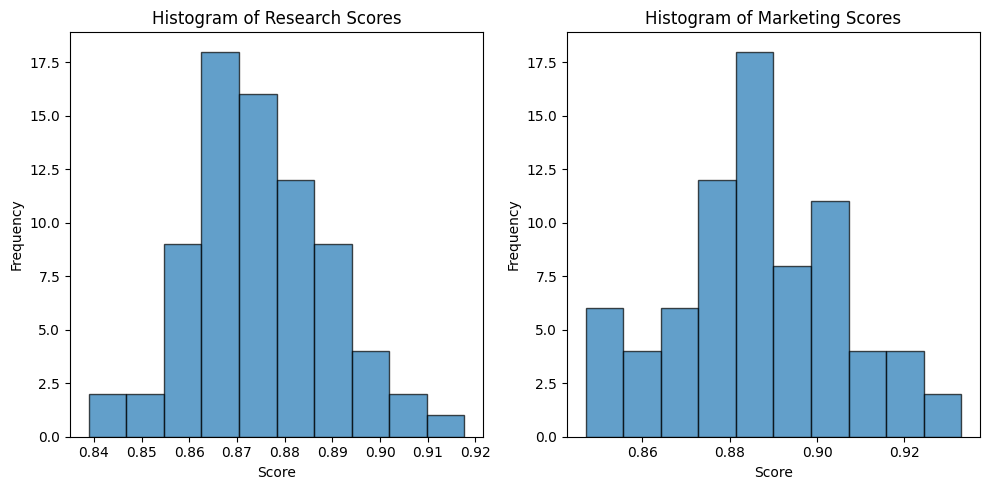

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'][2].item() for entry in cohere_scores]
marketing_scores = [entry['marketing'][2].item() for entry in cohere_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#BERTSCORE FOR BASELINE MODEL
uses the given RAG pipeline and a chunk size of 200 and overlap of 50

In [ ]:
%%capture
baseline_scores=compute_score(answers2)

In [ ]:
baseline_average_scores=get_average(baseline_scores)
print(baseline_average_scores)

{'research_avg': 0.8849847189585368, 'marketing_avg': 0.8935506057739258}


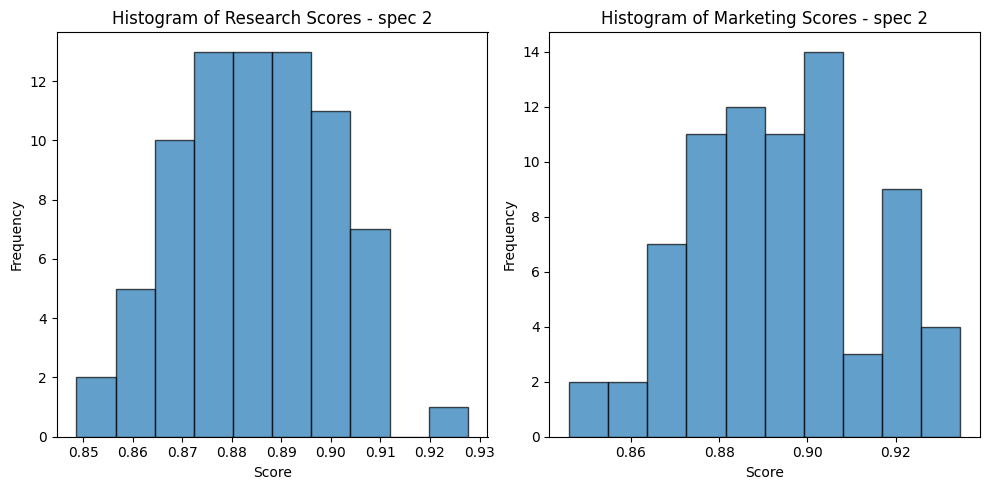

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'][2].item() for entry in baseline_scores]
marketing_scores = [entry['marketing'][2].item() for entry in baseline_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores - spec 2')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - spec 2')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#BERTSCORE FOR FINAL MODEL V3.1

In [ ]:
%%capture
v31_scores=compute_score(answers3)

In [ ]:
v31_average_scores=get_average(v31_scores)
print(v31_average_scores)

{'research_avg': 0.8742525577545166, 'marketing_avg': 0.8953541625629772}


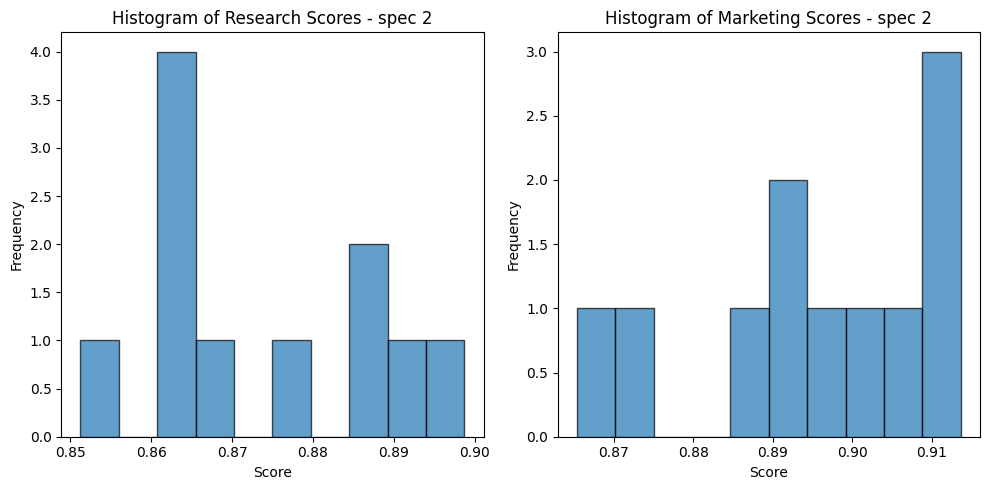

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'][2].item() for entry in v31_scores]
marketing_scores = [entry['marketing'][2].item() for entry in v31_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores - spec 2')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - spec 2')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#BERTSCORE MODEL V32

In [ ]:
%%capture
cohere_scores=compute_score(answers4)

{'research_avg': 0.8840422467751936, 'marketing_avg': 0.9010054035620256}


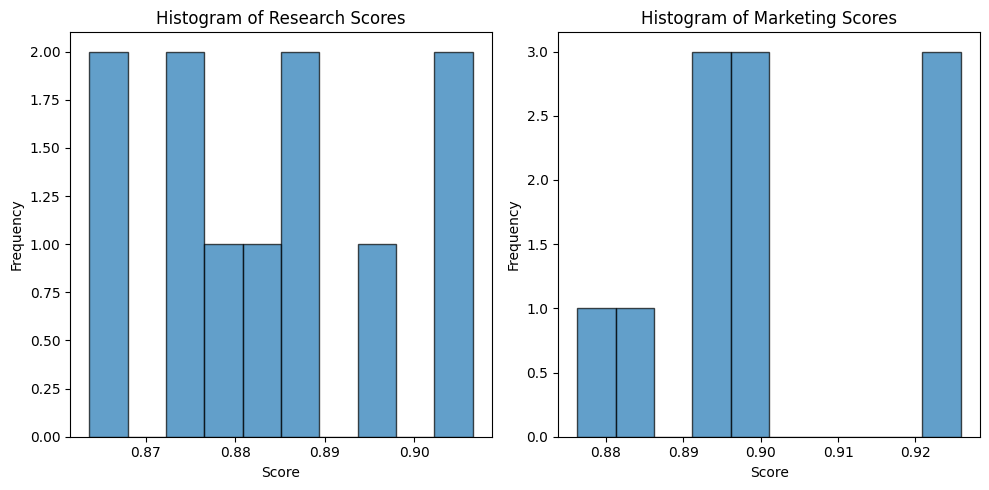

In [ ]:

cohere_average_bertscores=get_average(cohere_scores)
print(cohere_average_bertscores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'][2].item() for entry in cohere_scores]
marketing_scores = [entry['marketing'][2].item() for entry in cohere_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#BERTSCORE - MODEL V41

In [ ]:
%%capture
cohere_scores=compute_score(answers5)

{'research_avg': 0.8895623981952667, 'marketing_avg': 0.9066645205020905}


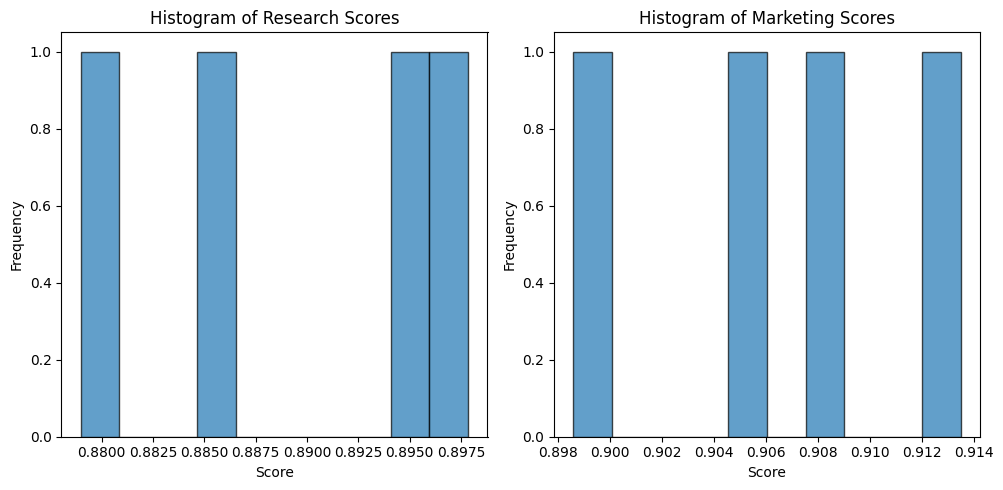

In [ ]:

cohere_average_bertscores=get_average(cohere_scores)
print(cohere_average_bertscores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'][2].item() for entry in cohere_scores]
marketing_scores = [entry['marketing'][2].item() for entry in cohere_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#BERTSCORE - MODEL V42

In [ ]:
%%capture
cohere_scores=compute_score(answers6)

{'research_avg': 0.8734677975827997, 'marketing_avg': 0.8811922073364258}


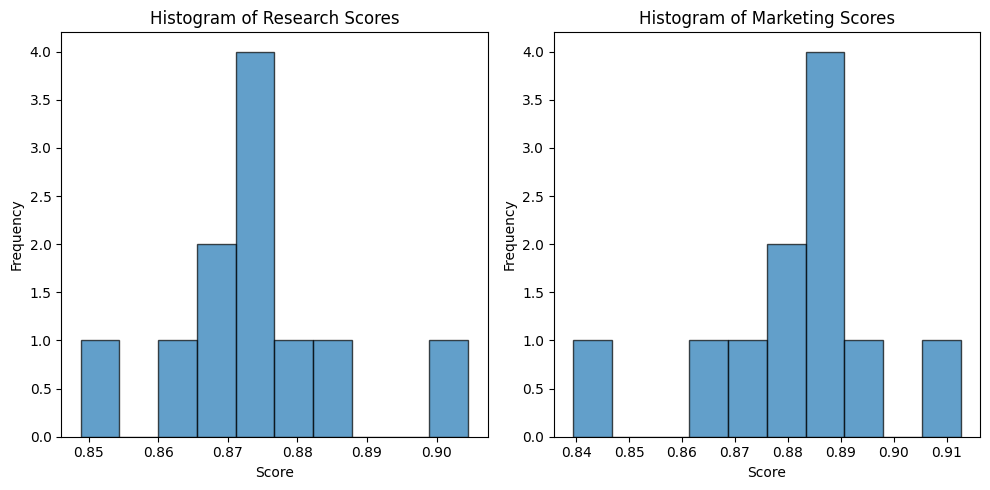

In [ ]:

cohere_average_bertscores=get_average(cohere_scores)
print(cohere_average_bertscores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'][2].item() for entry in cohere_scores]
marketing_scores = [entry['marketing'][2].item() for entry in cohere_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#BERTSCORE - FINAL MODEL V5

In [ ]:
%%capture
cohere_scores=compute_score(answers7)


{'research_avg': 0.8896455222910101, 'marketing_avg': 0.911475577137687}


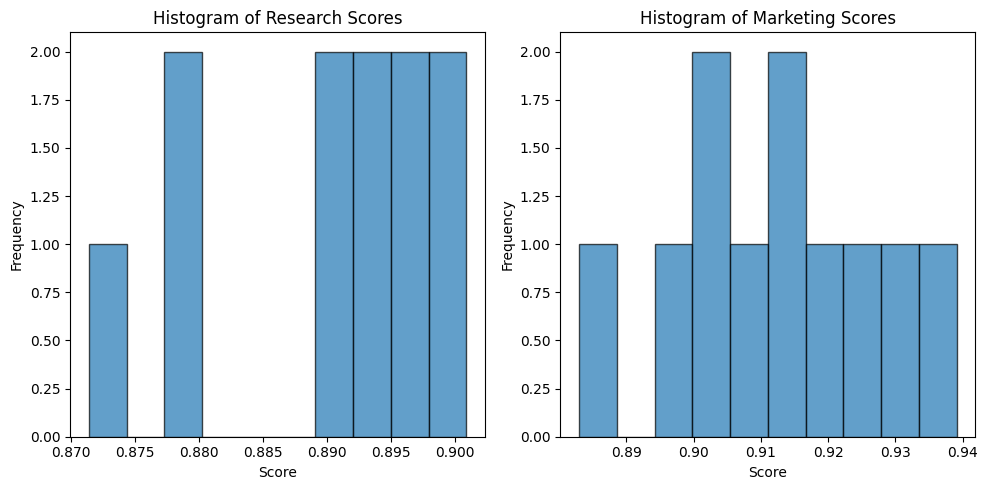

In [ ]:

cohere_average_bertscores=get_average(cohere_scores)
print(cohere_average_bertscores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'][2].item() for entry in cohere_scores]
marketing_scores = [entry['marketing'][2].item() for entry in cohere_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#BERTSCORE - FINAL MODEL V5 FULL RUNTHROUGH

In [ ]:
%%capture
cohere_scores=compute_score(answers8)



{'research_avg': 0.8828915810585022, 'marketing_avg': 0.8896504783630371}


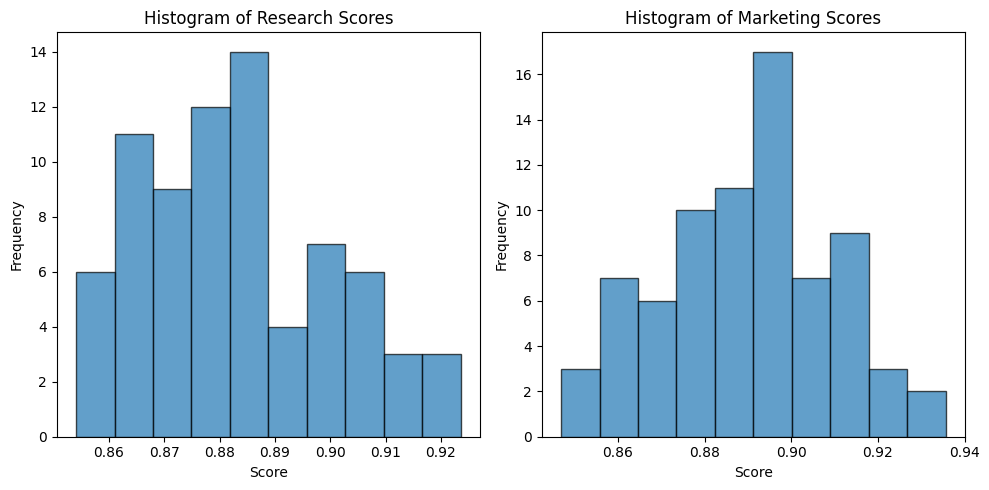

In [ ]:

cohere_average_bertscores=get_average(cohere_scores)
print(cohere_average_bertscores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'][2].item() for entry in cohere_scores]
marketing_scores = [entry['marketing'][2].item() for entry in cohere_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#BERT - FULL MODEL V3.2 - FULL RUN THROUGH

In [ ]:
%%capture
cohere_scores=compute_score(answers9)

{'research_avg': 0.8828379392623902, 'marketing_avg': 0.8909521349271139}


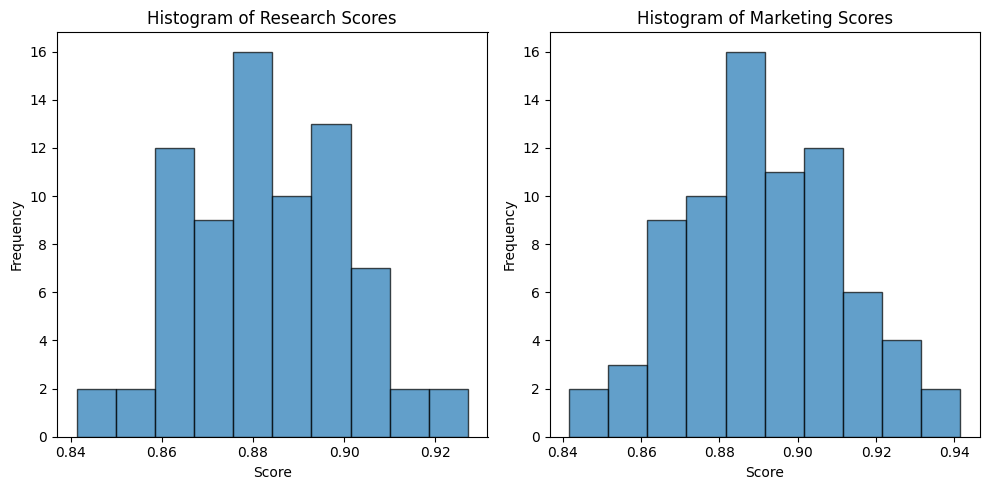

In [ ]:
cohere_average_bertscores=get_average(cohere_scores)
print(cohere_average_bertscores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'][2].item() for entry in cohere_scores]
marketing_scores = [entry['marketing'][2].item() for entry in cohere_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#BLEU EVALUATION

BLEU is a machine translation metric.

BLEU evaluates for unigrams, bigrams, trigrams, and so on. BLEU considers n-gram overlaps and incrudes a brevity penalty if the candidate sentence is shorter than the reference.

#BLEU SCORE - FINAL MODEL

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
bleu_scores=compute_score(answers,scoretype='bleu')

In [ ]:
bleu_average_scores=get_average(bleu_scores,scoretype='bleu')
print(bleu_average_scores)

{'research_avg': 0.04018634509927509, 'marketing_avg': 0.04835739510498175}


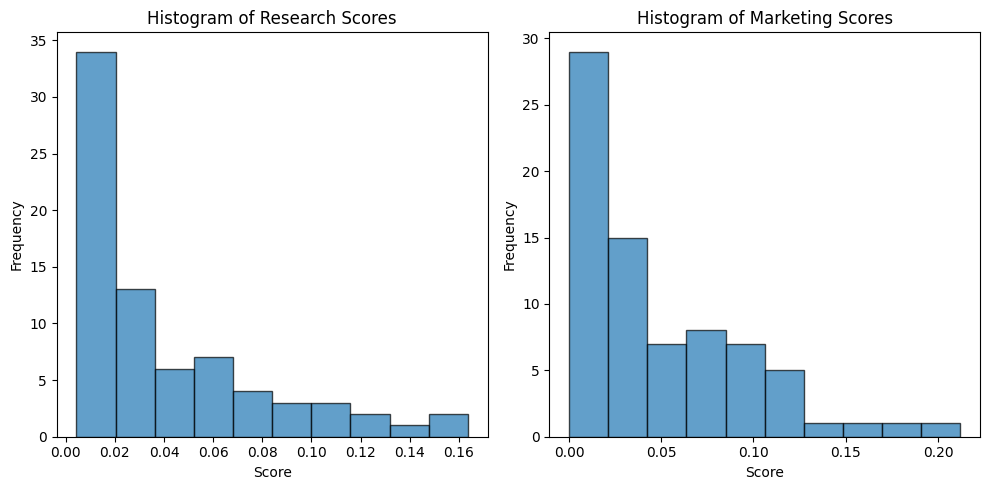

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'] for entry in bleu_scores]
marketing_scores = [entry['marketing'] for entry in bleu_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#BLEU SCORE - BASELINE MODEL

In [ ]:
baseline_bleu_scores=compute_score(answers2,scoretype='bleu')

In [ ]:
baseline_bleu_average_scores=get_average(baseline_bleu_scores,scoretype='bleu')
print(baseline_bleu_average_scores)

{'research_avg': 0.05285574983278001, 'marketing_avg': 0.049907389531788846}


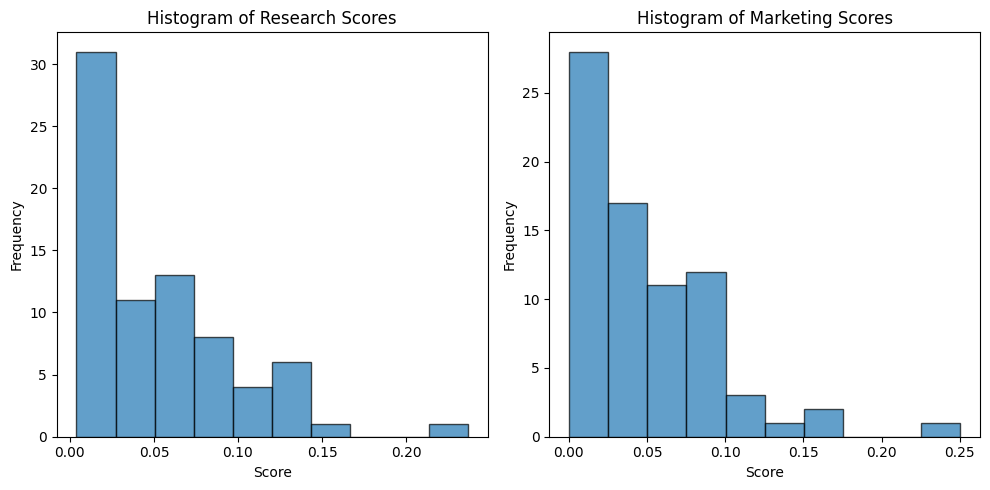

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'] for entry in baseline_bleu_scores]
marketing_scores = [entry['marketing'] for entry in baseline_bleu_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#BLEU - MODEL V31

{'research_avg': 0.03614025232845276, 'marketing_avg': 0.027781808708630996}


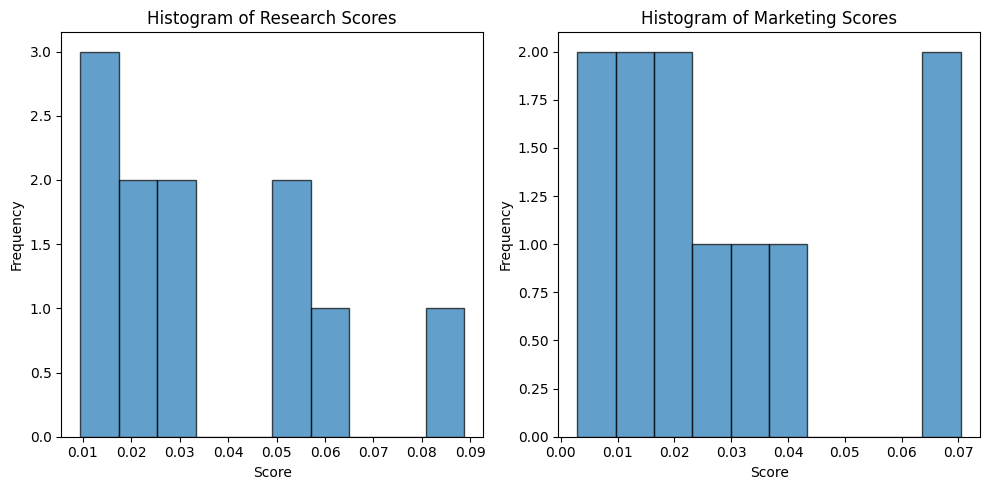

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

bleu_scores=compute_score(answers3,scoretype='bleu')

bleu_average_scores=get_average(bleu_scores,scoretype='bleu')
print(bleu_average_scores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'] for entry in bleu_scores]
marketing_scores = [entry['marketing'] for entry in bleu_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#BLEU - FINAL MODEL V32

{'research_avg': 0.03953961514383739, 'marketing_avg': 0.05649602619867946}


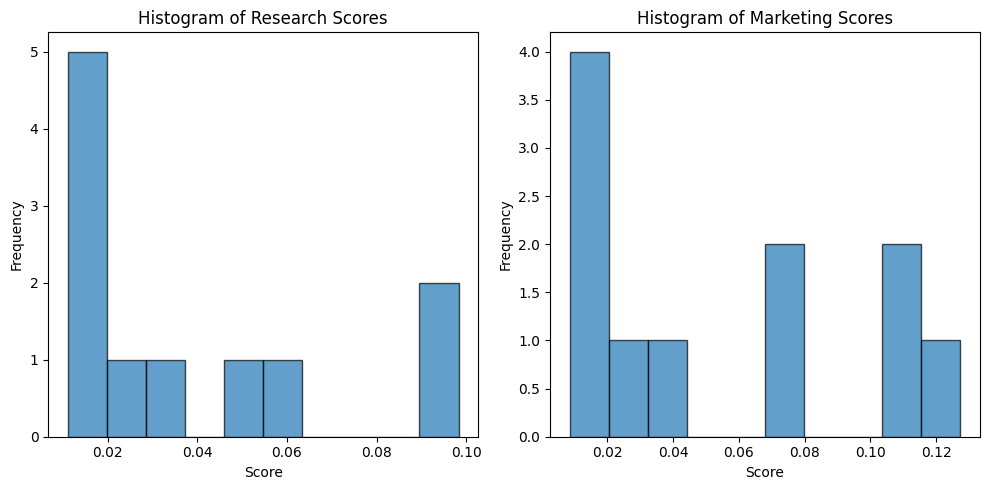

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

bleu_scores=compute_score(answers4,scoretype='bleu')

bleu_average_scores=get_average(bleu_scores,scoretype='bleu')
print(bleu_average_scores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'] for entry in bleu_scores]
marketing_scores = [entry['marketing'] for entry in bleu_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#BLEU - FINAL MODEL V41

{'research_avg': 0.04897309037243752, 'marketing_avg': 0.045955376841955824}


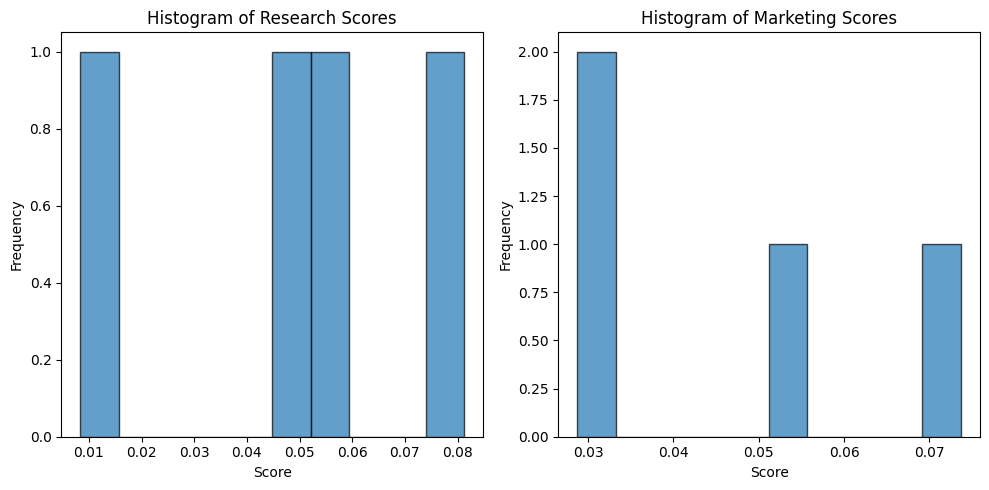

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

bleu_scores=compute_score(answers5,scoretype='bleu')

bleu_average_scores=get_average(bleu_scores,scoretype='bleu')
print(bleu_average_scores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'] for entry in bleu_scores]
marketing_scores = [entry['marketing'] for entry in bleu_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#BLEU - FINAL MODEL V42

{'research_avg': 0.03455884949232375, 'marketing_avg': 0.02781491680755377}


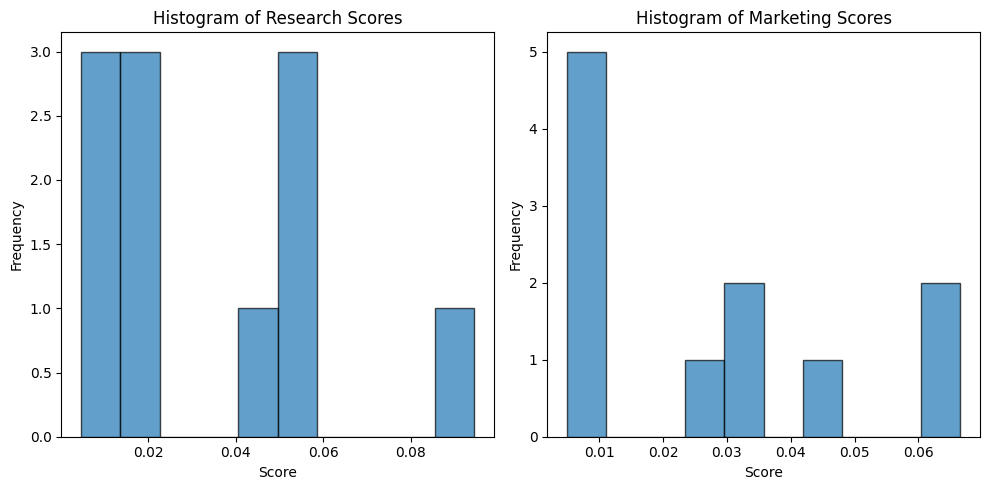

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

bleu_scores=compute_score(answers6,scoretype='bleu')

bleu_average_scores=get_average(bleu_scores,scoretype='bleu')
print(bleu_average_scores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'] for entry in bleu_scores]
marketing_scores = [entry['marketing'] for entry in bleu_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#BLEU - FINAL MODEL V5

{'research_avg': 0.0538391747592738, 'marketing_avg': 0.08699336020422323}


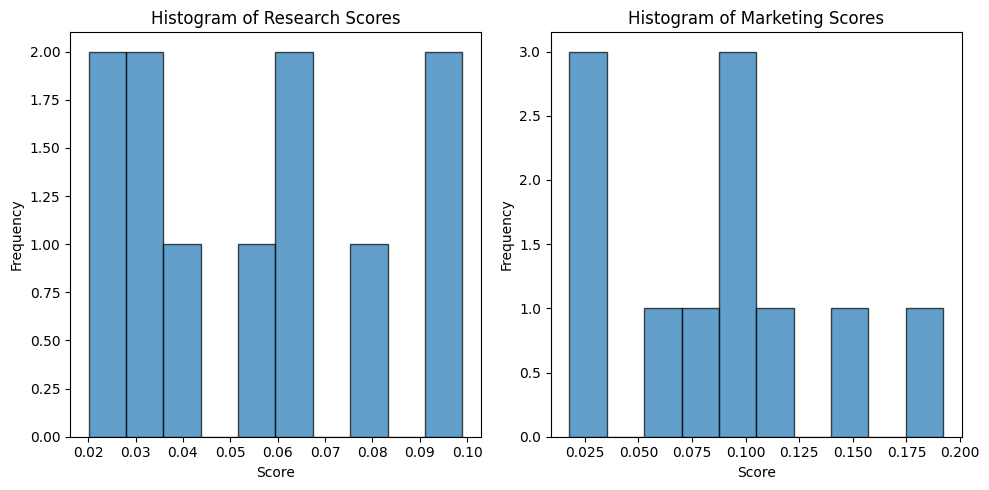

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

bleu_scores=compute_score(answers7,scoretype='bleu')

bleu_average_scores=get_average(bleu_scores,scoretype='bleu')
print(bleu_average_scores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'] for entry in bleu_scores]
marketing_scores = [entry['marketing'] for entry in bleu_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#BLEU - FINAL MODEL V5 - FULL RUN THROUGH

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

bleu_scores=compute_score(answers8,scoretype='bleu')



{'research_avg': 0.04516540939433398, 'marketing_avg': 0.039948342457525966}


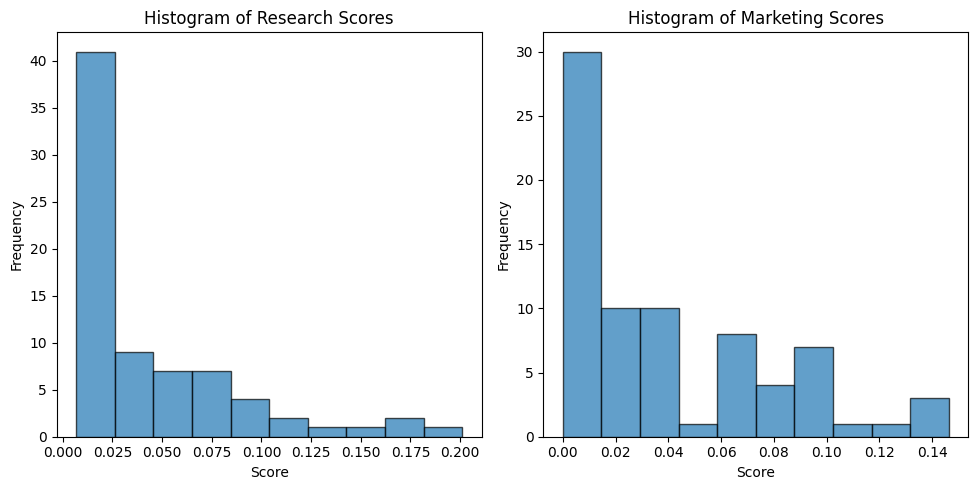

In [ ]:
bleu_average_scores=get_average(bleu_scores,scoretype='bleu')
print(bleu_average_scores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'] for entry in bleu_scores]
marketing_scores = [entry['marketing'] for entry in bleu_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#BLEU - FINAL MODEL V3.2 - FULL RUN THROUGH

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

bleu_scores=compute_score(answers9,scoretype='bleu')

{'research_avg': 0.050917162969670596, 'marketing_avg': 0.051781250953135176}


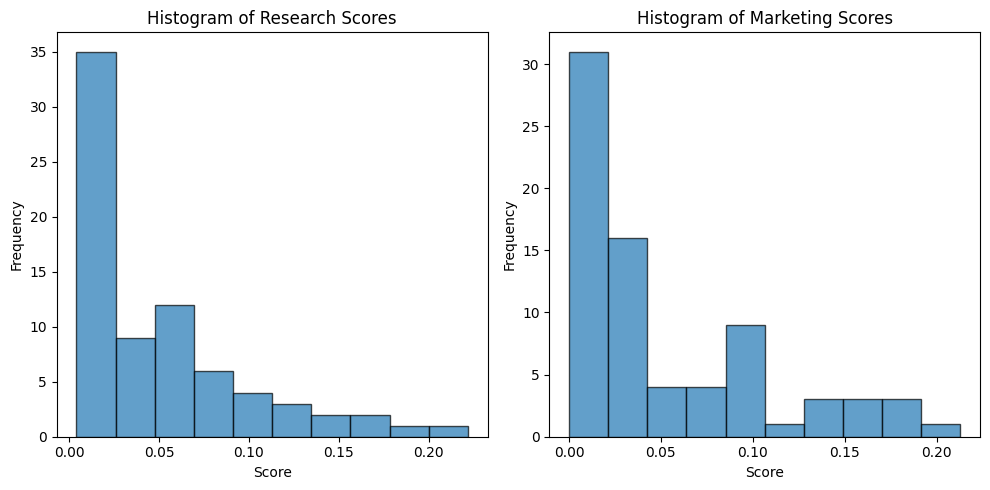

In [ ]:
bleu_average_scores=get_average(bleu_scores,scoretype='bleu')
print(bleu_average_scores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research'] for entry in bleu_scores]
marketing_scores = [entry['marketing'] for entry in bleu_scores]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

##ROUGE EVALUATION

ROUGE is a summarization metric.

ROUGE only tries to assess the adequacy, by simply counting how many n-grams in your generated summary match the n-grams in your reference summary (or summaries, as ROUGE supports multi-reference corpora)

ROUGE-n recall=40% means that 40% of the n-grams in the reference summary are also present in the generated summary.
ROUGE-n precision=40% means that 40% of the n-grams in the generated summary are also present in the reference summary.
ROUGE-n F1-score=40% is more difficult to interpret, like any F1-score.


Important to note that a lot of the gold answers and predicted answers are comprised almost entirely of the question itself so some of the explanation for achieving a higher metric are encapsulated in the question being restated or rephrased.



#ROUGE SETUP

In [ ]:
%%capture
!pip install rouge-score
from rouge_score import rouge_scorer

#ROUGE - FINAL MODEL

In [ ]:
%%capture
cohere_scores_rouge=compute_score(answers,scoretype='rouge')

In [ ]:
cohere_rouge_average_scores=get_average(cohere_scores_rouge,scoretype='rouge')
print(cohere_rouge_average_scores)

{'research_avg': 0.40659460245165635, 'marketing_avg': 0.44283567815517766}


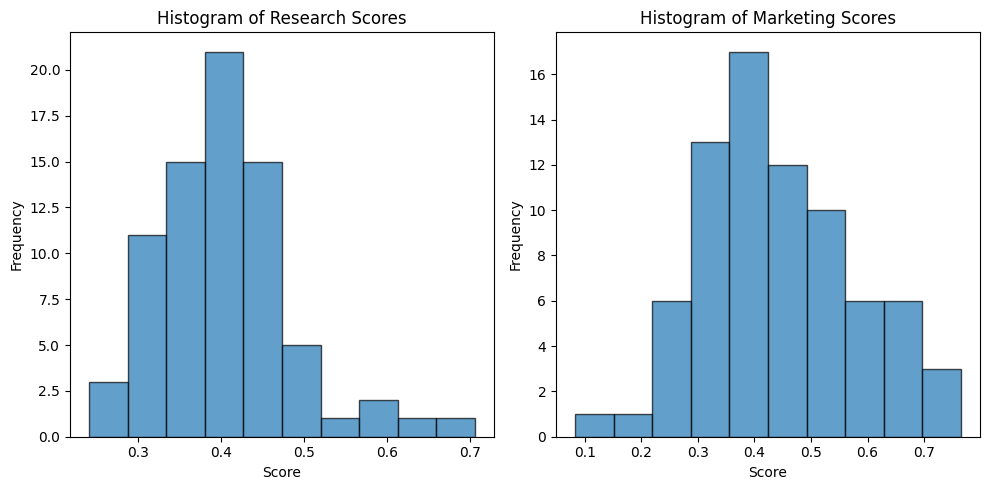

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research']['rouge1'][0] for entry in cohere_scores_rouge]
marketing_scores = [entry['marketing']['rouge1'][0] for entry in cohere_scores_rouge]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#ROUGE - BASELINE

In [ ]:
%%capture
baseline_scores_rouge=compute_score(answers2,scoretype='rouge')

In [ ]:
baseline_rouge_average_scores=get_average(baseline_scores_rouge,scoretype='rouge')
print(baseline_rouge_average_scores)

{'research_avg': 0.42250264037841473, 'marketing_avg': 0.4673710898852977}


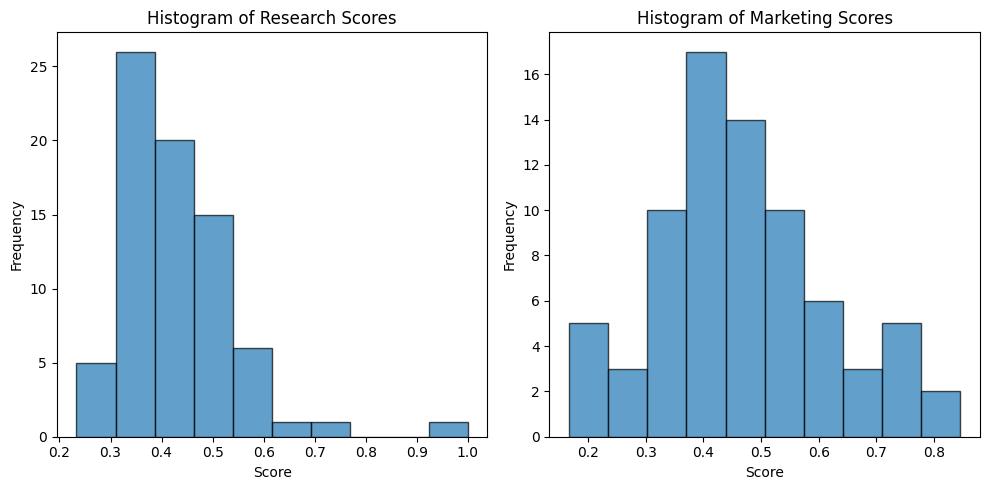

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research']['rouge1'][0] for entry in baseline_scores_rouge]
marketing_scores = [entry['marketing']['rouge1'][0] for entry in baseline_scores_rouge]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Approx 40% and 44% of the unigrams in the reference answer are also present in the generated answer. This is Rouge1 recall.

#ROUGE - FINAL MODEL V31

{'research_avg': 0.4278888333655744, 'marketing_avg': 0.3993884842014089}


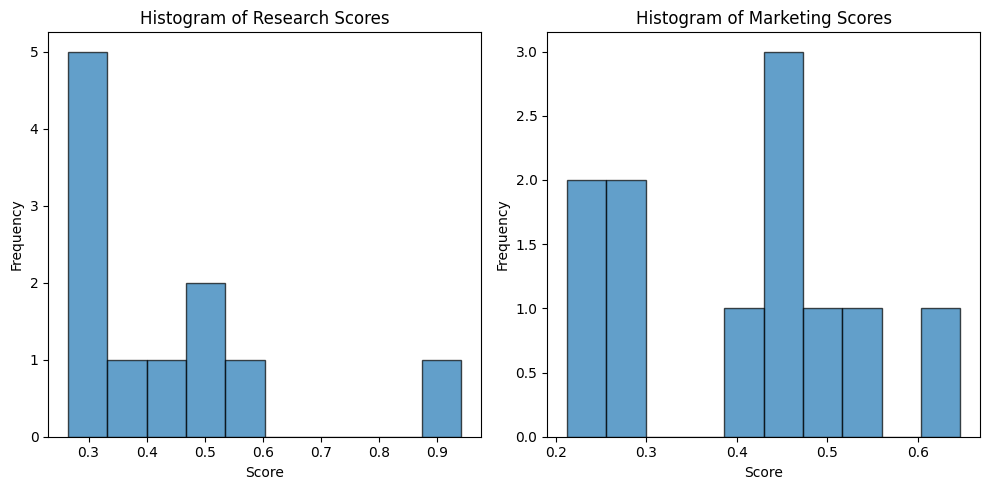

In [ ]:
cohere_scores_rouge=compute_score(answers3,scoretype='rouge')

cohere_rouge_average_scores=get_average(cohere_scores_rouge,scoretype='rouge')
print(cohere_rouge_average_scores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research']['rouge1'][0] for entry in cohere_scores_rouge]
marketing_scores = [entry['marketing']['rouge1'][0] for entry in cohere_scores_rouge]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#ROUGE - FINAL MODEL V32

{'research_avg': 0.4116377271828304, 'marketing_avg': 0.512864018346922}


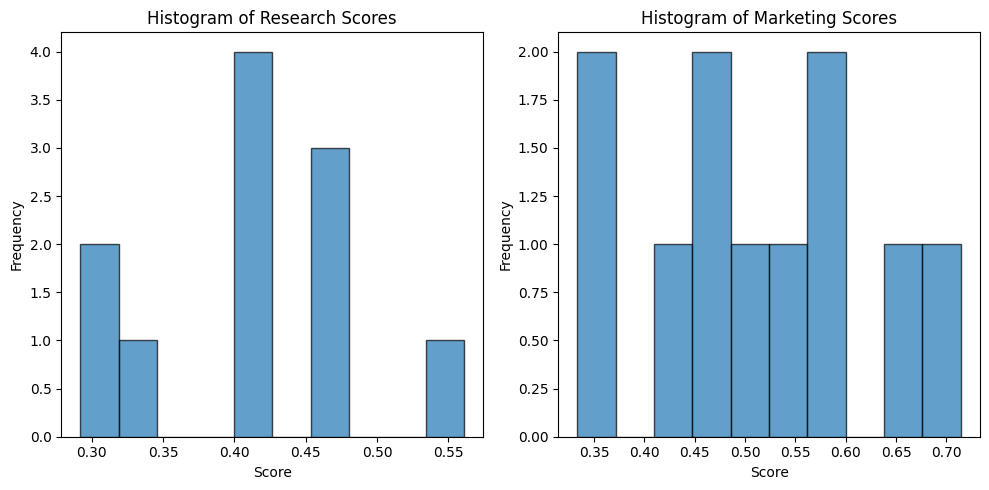

In [ ]:
cohere_scores_rouge=compute_score(answers4,scoretype='rouge')

cohere_rouge_average_scores=get_average(cohere_scores_rouge,scoretype='rouge')
print(cohere_rouge_average_scores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research']['rouge1'][0] for entry in cohere_scores_rouge]
marketing_scores = [entry['marketing']['rouge1'][0] for entry in cohere_scores_rouge]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#ROUGE - FINAL MODEL V41

{'research_avg': 0.4083391881091115, 'marketing_avg': 0.5506837324611749}


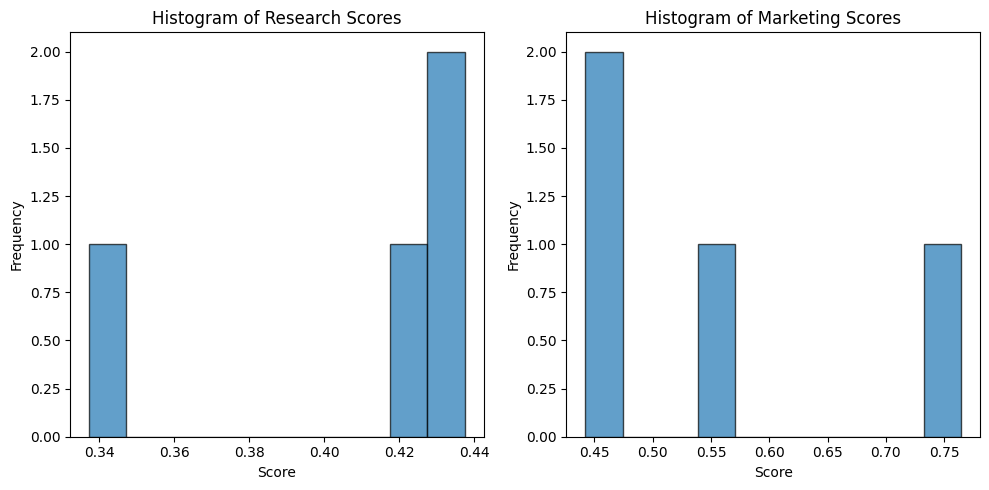

In [ ]:
cohere_scores_rouge=compute_score(answers5,scoretype='rouge')

cohere_rouge_average_scores=get_average(cohere_scores_rouge,scoretype='rouge')
print(cohere_rouge_average_scores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research']['rouge1'][0] for entry in cohere_scores_rouge]
marketing_scores = [entry['marketing']['rouge1'][0] for entry in cohere_scores_rouge]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#ROUGE - FINAL MODEL V42

{'research_avg': 0.3340775856968767, 'marketing_avg': 0.35551316846757525}


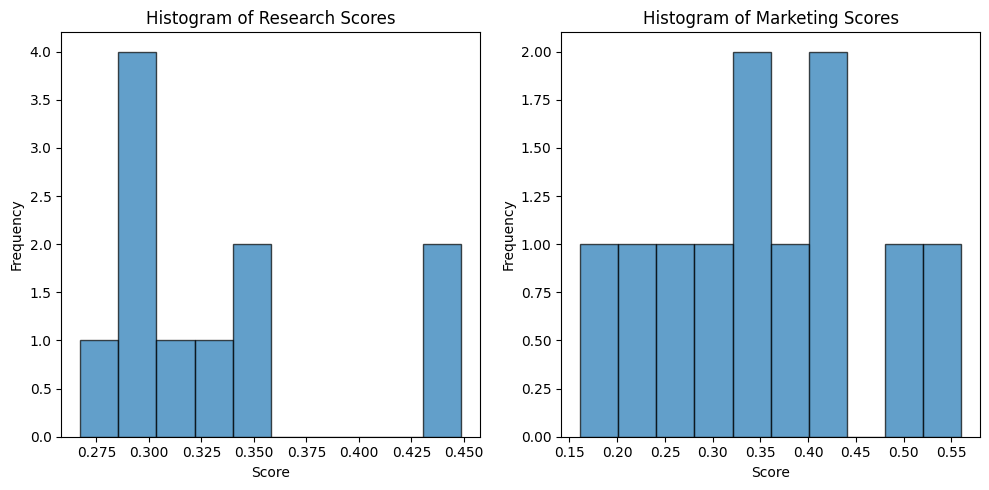

In [ ]:
cohere_scores_rouge=compute_score(answers6,scoretype='rouge')

cohere_rouge_average_scores=get_average(cohere_scores_rouge,scoretype='rouge')
print(cohere_rouge_average_scores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research']['rouge1'][0] for entry in cohere_scores_rouge]
marketing_scores = [entry['marketing']['rouge1'][0] for entry in cohere_scores_rouge]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#ROUGE - FINAL MODEL V5

{'research_avg': 0.4731980271265437, 'marketing_avg': 0.5829554942650093}


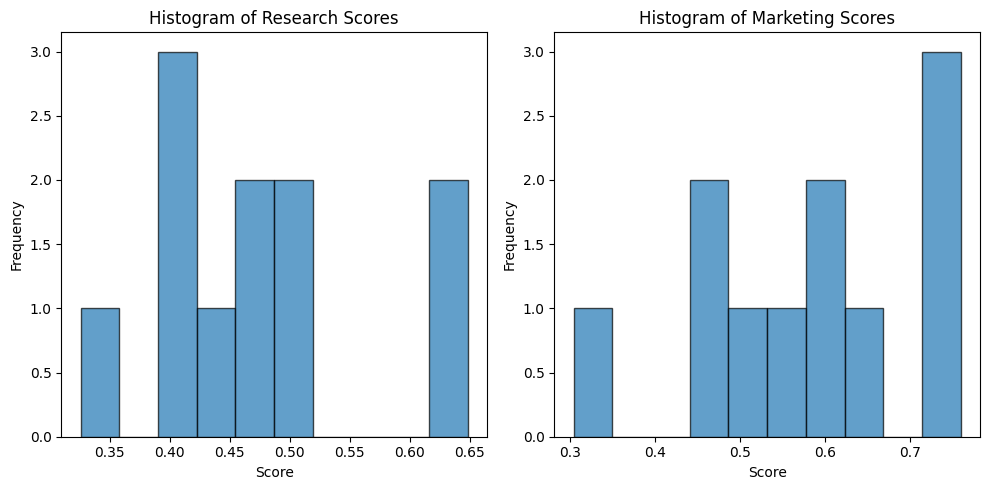

In [ ]:
cohere_scores_rouge=compute_score(answers7,scoretype='rouge')

cohere_rouge_average_scores=get_average(cohere_scores_rouge,scoretype='rouge')
print(cohere_rouge_average_scores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research']['rouge1'][0] for entry in cohere_scores_rouge]
marketing_scores = [entry['marketing']['rouge1'][0] for entry in cohere_scores_rouge]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#ROUGE - FINAL MODEL V5 - FULL RUN THROUGH

In [ ]:
cohere_scores_rouge=compute_score(answers8,scoretype='rouge')



{'research_avg': 0.4350613537893065, 'marketing_avg': 0.4599013353626401}


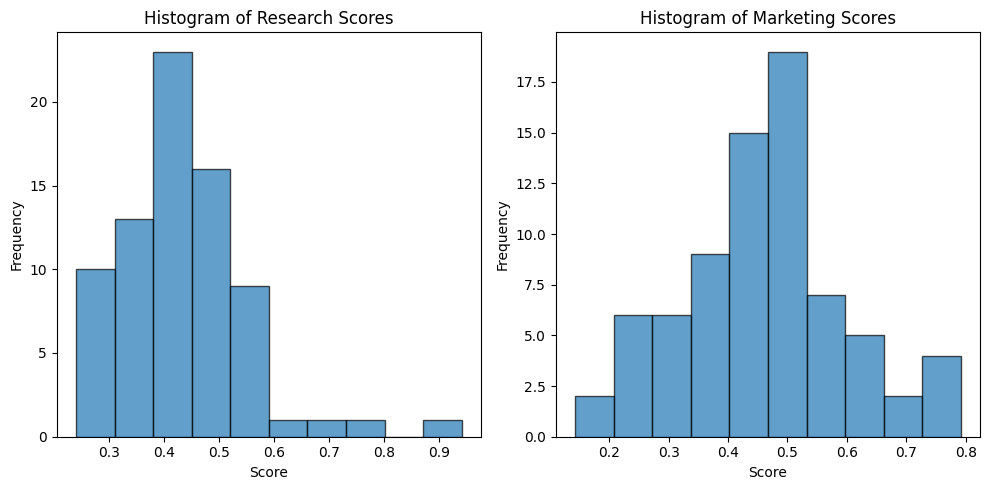

In [ ]:
cohere_rouge_average_scores=get_average(cohere_scores_rouge,scoretype='rouge')
print(cohere_rouge_average_scores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research']['rouge1'][0] for entry in cohere_scores_rouge]
marketing_scores = [entry['marketing']['rouge1'][0] for entry in cohere_scores_rouge]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#ROUGE - FULL MODEL V 3.2 - FULL RUNTHROUGH

In [ ]:
cohere_scores_rouge=compute_score(answers9,scoretype='rouge')



{'research_avg': 0.44565928937687005, 'marketing_avg': 0.4749802752785808}


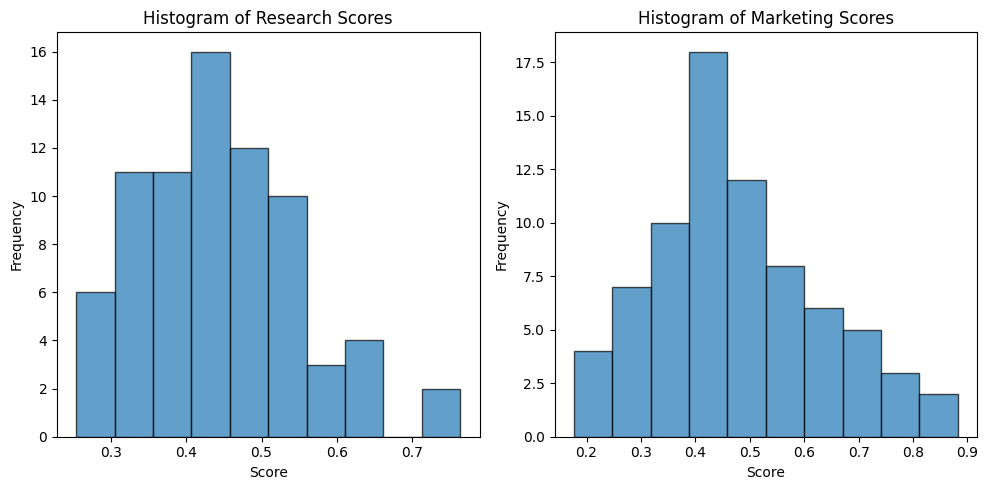

In [ ]:
cohere_rouge_average_scores=get_average(cohere_scores_rouge,scoretype='rouge')
print(cohere_rouge_average_scores)

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = [entry['research']['rouge1'][0] for entry in cohere_scores_rouge]
marketing_scores = [entry['marketing']['rouge1'][0] for entry in cohere_scores_rouge]

# Plot histograms
plt.figure(figsize=(10, 5))

# Research scores histogram
plt.subplot(1, 2, 1)
plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Marketing scores histogram
plt.subplot(1, 2, 2)
plt.hist(marketing_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS SETUP

In [ ]:
%%capture
!pip install ragas

from datasets import Dataset
from ragas.metrics import faithfulness, answer_correctness
from ragas import evaluate

!pip install langchain-openai

import os
openaikey=userdata.get('openai')
os.environ["OPENAI_API_KEY"] = openaikey

from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
evaluator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-3.5-turbo"))
evaluator_embeddings = LangchainEmbeddingsWrapper(OpenAIEmbeddings())

def convert_to_dataset(data):
  new_dict_research={'question':[],'answer':[],'ground_truth':[]}
  new_dict_marketing={'question':[],'answer':[],'ground_truth':[]}
  for x in data:
    num=x['num']
    question=x['question']
    goldresearch=(x['gold_answer_research'])
    predictedresearch=x['rag_answer']['gold_answer_research']
    goldmarketing=x['gold_answer_marketing']
    predictedmarketing=x['rag_answer']['gold_answer_marketing']
    new_dict_research['question'].append(question)
    new_dict_research['answer'].append(predictedresearch)
    new_dict_research['ground_truth'].append(goldresearch)
    new_dict_marketing['question'].append(question)
    new_dict_marketing['answer'].append(predictedmarketing)
    new_dict_marketing['ground_truth'].append(goldmarketing)
  marketing_dataset=Dataset.from_dict(new_dict_marketing)
  research_dataset=Dataset.from_dict(new_dict_research)
  return marketing_dataset,research_dataset

##RAGAS - LLM as a judge - OVERVIEW SETUP

In [ ]:
%%capture
!pip install ragas

In [ ]:
from datasets import Dataset
from ragas.metrics import faithfulness, answer_correctness
from ragas import evaluate

In [ ]:
from google.colab import userdata

In [ ]:
%%capture
!pip install langchain-openai

In [ ]:
import os
openaikey=userdata.get('openai')
os.environ["OPENAI_API_KEY"] = openaikey

In [ ]:
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
evaluator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-3.5-turbo"))
evaluator_embeddings = LangchainEmbeddingsWrapper(OpenAIEmbeddings())

In [ ]:
def convert_to_dataset(data):
  new_dict_research={'question':[],'answer':[],'ground_truth':[]}
  new_dict_marketing={'question':[],'answer':[],'ground_truth':[]}
  for x in data:
    num=x['num']
    question=x['question']
    goldresearch=(x['gold_answer_research'])
    predictedresearch=x['rag_answer']['gold_answer_research']
    goldmarketing=x['gold_answer_marketing']
    predictedmarketing=x['rag_answer']['gold_answer_marketing']
    new_dict_research['question'].append(question)
    new_dict_research['answer'].append(predictedresearch)
    new_dict_research['ground_truth'].append(goldresearch)
    new_dict_marketing['question'].append(question)
    new_dict_marketing['answer'].append(predictedmarketing)
    new_dict_marketing['ground_truth'].append(goldmarketing)
  marketing_dataset=Dataset.from_dict(new_dict_marketing)
  research_dataset=Dataset.from_dict(new_dict_research)
  return marketing_dataset,research_dataset

#RAGAS - BASELINE MODEL EVALUATION SETUP
- used baseline model - no functions, chunk size 200, 50

In [ ]:
marketing_data,research_data=convert_to_dataset(answers2)

In [ ]:
research_score_ragas = evaluate(research_data,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

Evaluating:   0%|          | 0/75 [00:00<?, ?it/s]

ERROR:ragas.executor:Exception raised in Job[6]: RateLimitError(Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-5B387WQ5ukHHrQ7A9v19bntg on tokens per min (TPM): Limit 30000, Used 29096, Requested 1788. Please try again in 1.768s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}})
ERROR:ragas.executor:Exception raised in Job[15]: RateLimitError(Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-5B387WQ5ukHHrQ7A9v19bntg on tokens per min (TPM): Limit 30000, Used 29249, Requested 1829. Please try again in 2.156s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}})
ERROR:ragas.executor:Exception raised in Job[0]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[2]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[4]: 

In [ ]:
research_score_ragas_pandas=research_score_ragas.to_pandas()

In [ ]:
research_score_ragas_pandas=research_score_ragas.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas.csv'
research_score_ragas_pandas.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

File saved to /content/drive/My Drive/assignment5data/research_score_ragas.csv


In [ ]:
import pandas as pd
import json
import os
from google.colab import drive
drive.mount('/content/drive')

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas.csv'

# Load the DataFrame
baseline_research_df = pd.read_csv(file_path)


Mounted at /content/drive


In [ ]:
marketing_score_ragas = evaluate(marketing_data,metrics=[answer_correctness])
#8.74 start

Evaluating:   0%|          | 0/75 [00:00<?, ?it/s]

In [ ]:
marketing_score_ragas_pandas=marketing_score_ragas.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas.csv'
marketing_score_ragas_pandas.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

File saved to /content/drive/My Drive/assignment5data/marketing_score_ragas.csv


In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas.csv'

# Load the DataFrame
df = pd.read_csv(file_path)


#RAGAS - BASELINE - RESEARCH RAGAS SCORES

In [ ]:
import pandas as pd
import json
import os
from google.colab import drive
drive.mount('/content/drive')

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas.csv'

# Load the DataFrame
baseline_research_df = pd.read_csv(file_path)

baseline_research_scores=list(baseline_research_df['answer_correctness'].dropna())

In [ ]:
import numpy as np
print('average research score baseline:',sum(baseline_research_scores)/len(baseline_research_scores))

average research score baseline: 0.5090768164326659


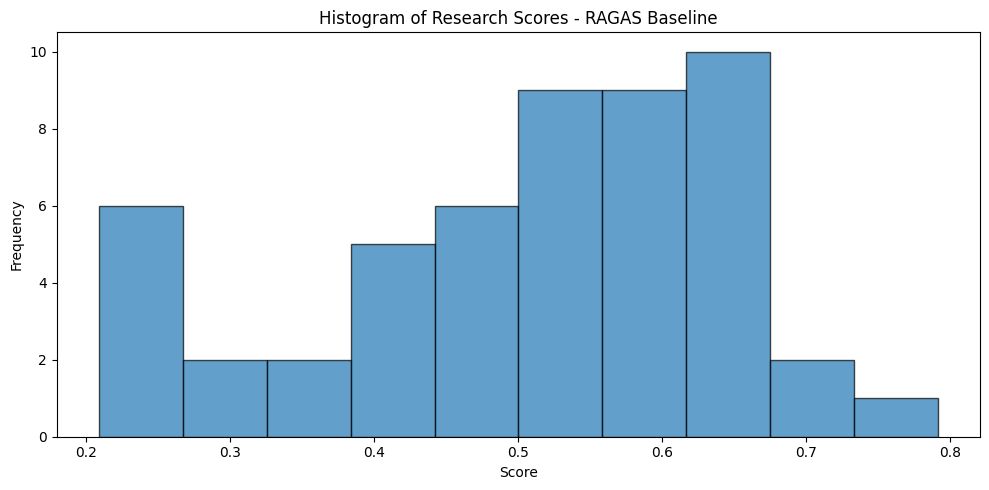

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = baseline_research_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS - BASELINE - MARKETING RAGAS SCORES

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas.csv'

# Load the DataFrame
marketing_score_ragas_baseline = pd.read_csv(file_path)

marketing_score_ragas_baseline_scores=list(marketing_score_ragas_baseline['answer_correctness'].dropna())


In [ ]:
import numpy as np
print('average research score baseline:',sum(marketing_score_ragas_baseline_scores)/len(marketing_score_ragas_baseline_scores))

average research score baseline: 0.5580535919107071


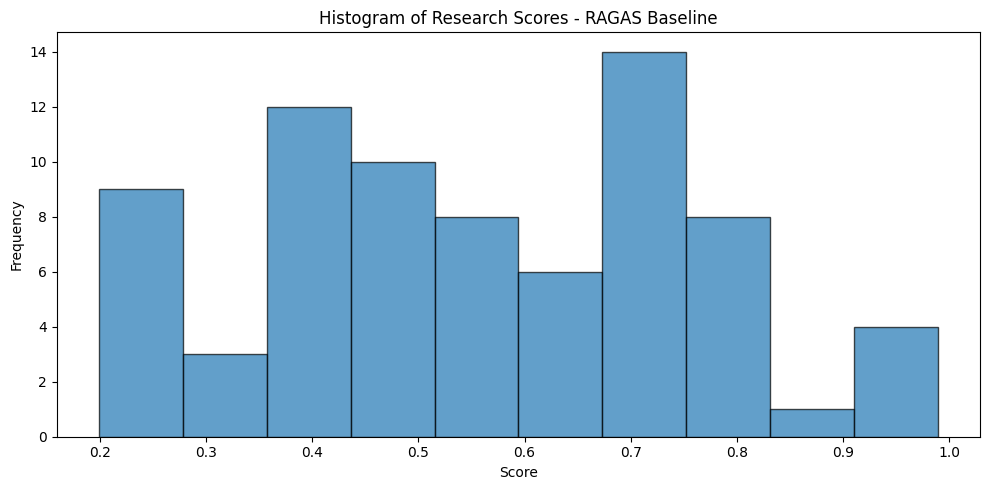

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = marketing_score_ragas_baseline['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS - FINAL MODEL SETUP

with functions convert to answer and multi query expansion and rerank and chunk size 800,100

In [ ]:
marketing_data_final,research_data_final=convert_to_dataset(answers)

In [ ]:
research_score_ragas_final = evaluate(research_data_final,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

research_score_ragas_pandas_final=research_score_ragas_final.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_final.csv'
research_score_ragas_pandas_final.to_csv(file_path, index=False)

print(f"File saved to {file_path}")


Evaluating:   0%|          | 0/75 [00:00<?, ?it/s]

File saved to /content/drive/My Drive/assignment5data/research_score_ragas_final.csv


In [ ]:
marketing_score_ragas_final = evaluate(marketing_data_final,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

marketing_score_ragas_pandas_final=marketing_score_ragas_final.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_final.csv'
marketing_score_ragas_pandas_final.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

Evaluating:   0%|          | 0/75 [00:00<?, ?it/s]

File saved to /content/drive/My Drive/assignment5data/marketing_score_ragas_final.csv


In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_final.csv'

# Load the DataFrame
research_final_df = pd.read_csv(file_path)

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_final.csv'

# Load the DataFrame
marketing_final_df = pd.read_csv(file_path)

#RAGAS - FINAL MODEL - RESEARCH SCORES

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_final.csv'

# Load the DataFrame
research_final_df = pd.read_csv(file_path)

research_ragas_final_scores=list(research_final_df['answer_correctness'].dropna())

In [ ]:
import numpy as np
print('average research score baseline:',sum(research_ragas_final_scores)/len(research_ragas_final_scores))

average research score baseline: 0.5561628089219319


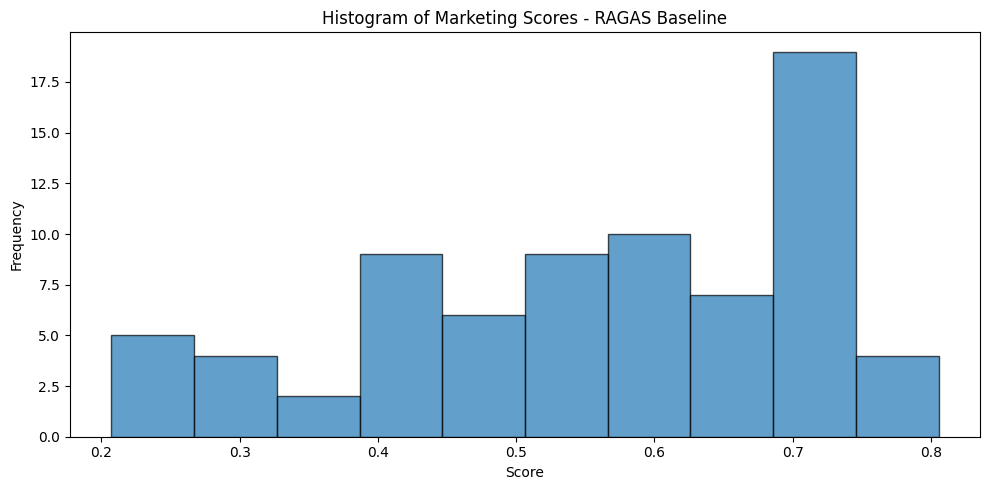

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = research_final_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS - FINAL MODEL - MARKETING SCORES

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_final.csv'

# Load the DataFrame
marketing_final_df = pd.read_csv(file_path)

marketing_ragas_final_scores=list(marketing_final_df['answer_correctness'].dropna())

In [ ]:
import numpy as np
print('average research score baseline:',sum(marketing_ragas_final_scores)/len(marketing_ragas_final_scores))

average research score baseline: 0.44582780062484695


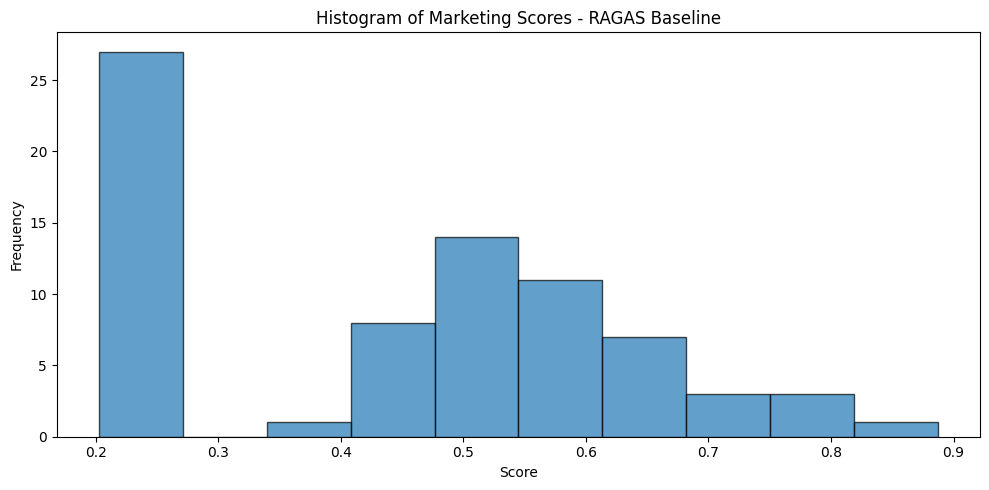

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = marketing_final_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS - FINAL V3.1 - SETUP

- final model v3.1 uses cohere rerank and a chunk size of 200,30
- sample size is 10

In [ ]:
marketing_data_31,research_data_31=convert_to_dataset(answers3)

In [ ]:
research_score_ragas_31 = evaluate(research_data_31,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

research_score_ragas_pandas_31=research_score_ragas_31.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_31.csv'
research_score_ragas_pandas_31.to_csv(file_path, index=False)

print(f"File saved to {file_path}")


In [ ]:

marketing_score_ragas_31 = evaluate(marketing_data_31,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

marketing_score_ragas_pandas_31=marketing_score_ragas_31.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_31.csv'
marketing_score_ragas_pandas_31.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

File saved to /content/drive/My Drive/assignment5data/marketing_score_ragas_31.csv


#RAGAS - FINAL V3.1 - RESEARCH SCORES

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_31.csv'

# Load the DataFrame
research_31_df = pd.read_csv(file_path)

research_ragas_31_scores=list(research_31_df['answer_correctness'].dropna())

In [ ]:
import numpy as np
print('average research score baseline:',sum(research_ragas_31_scores)/len(research_ragas_31_scores))

average research score baseline: 0.5339667706443735


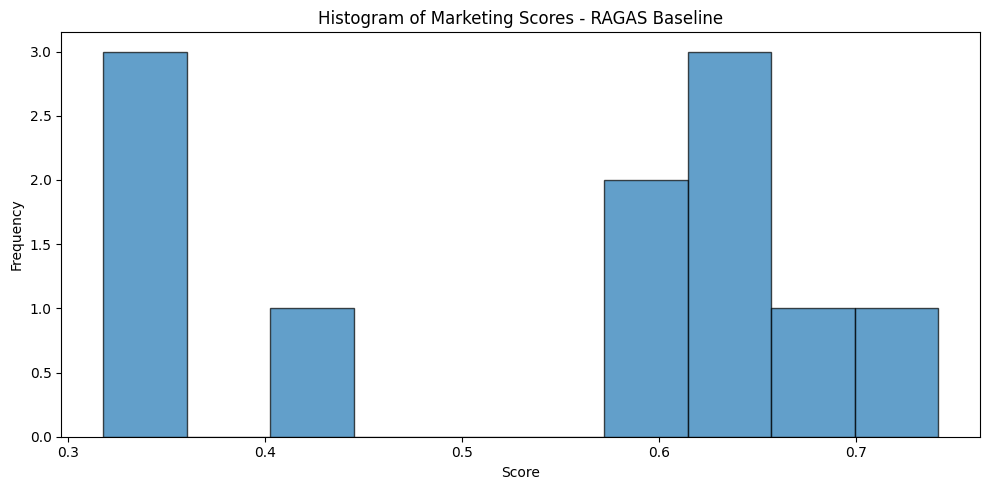

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = research_31_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS - FINAL V3.1 - MARKETING SCORES

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_31.csv'

# Load the DataFrame
marketing_31_df = pd.read_csv(file_path)

marketing_ragas_31_scores=list(marketing_31_df['answer_correctness'].dropna())

In [ ]:
import numpy as np
print('average research score baseline:',sum(marketing_ragas_31_scores)/len(marketing_ragas_31_scores))

average research score baseline: 0.3881935062480286


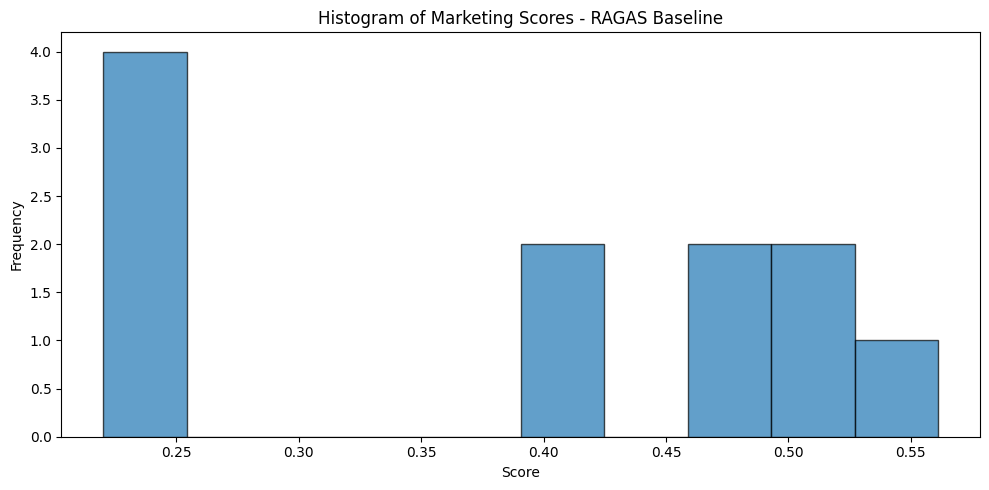

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = marketing_31_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS - V3.2 FINAL MODEL - SETUP
- cohere rerank and chunk size 800,100
- change chunk size vs 3.1

In [ ]:
marketing_data_32,research_data_32=convert_to_dataset(answers4)

In [ ]:
research_score_ragas_32 = evaluate(research_data_32,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

research_score_ragas_pandas_32=research_score_ragas_32.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_32.csv'
research_score_ragas_pandas_32.to_csv(file_path, index=False)

print(f"File saved to {file_path}")


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

File saved to /content/drive/My Drive/assignment5data/research_score_ragas_32.csv


In [ ]:
marketing_score_ragas_32 = evaluate(marketing_data_32,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

marketing_score_ragas_pandas_32=marketing_score_ragas_32.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_32.csv'
marketing_score_ragas_pandas_32.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

File saved to /content/drive/My Drive/assignment5data/marketing_score_ragas_32.csv


#RAGAS - 3.2 FINAL MODEL - RESEARCH SCORE

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_32.csv'

# Load the DataFrame
research_32_df = pd.read_csv(file_path)

research_ragas_32_scores=list(research_32_df['answer_correctness'].dropna())

In [ ]:
import numpy as np
print('average research score baseline:',sum(research_ragas_32_scores)/len(research_ragas_32_scores))

average research score baseline: 0.6495115425923449


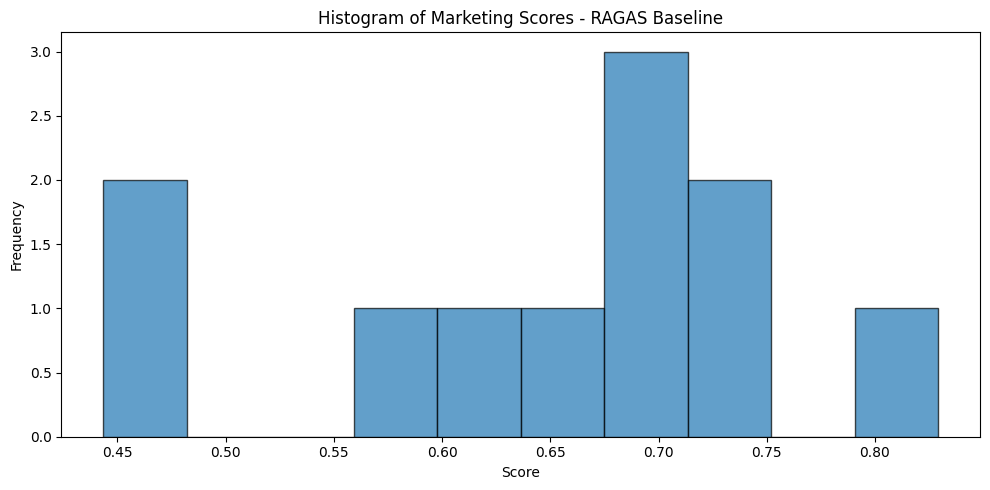

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = research_32_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS - 3.2 FINAL MODEL - MARKETING SCORE

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_32.csv'

# Load the DataFrame
marketing_32_df = pd.read_csv(file_path)

marketing_ragas_32_scores=list(marketing_31_df['answer_correctness'].dropna())

In [ ]:
import numpy as np
print('average research score baseline:',sum(marketing_ragas_32_scores)/len(marketing_ragas_32_scores))

average research score baseline: 0.3881935062480286


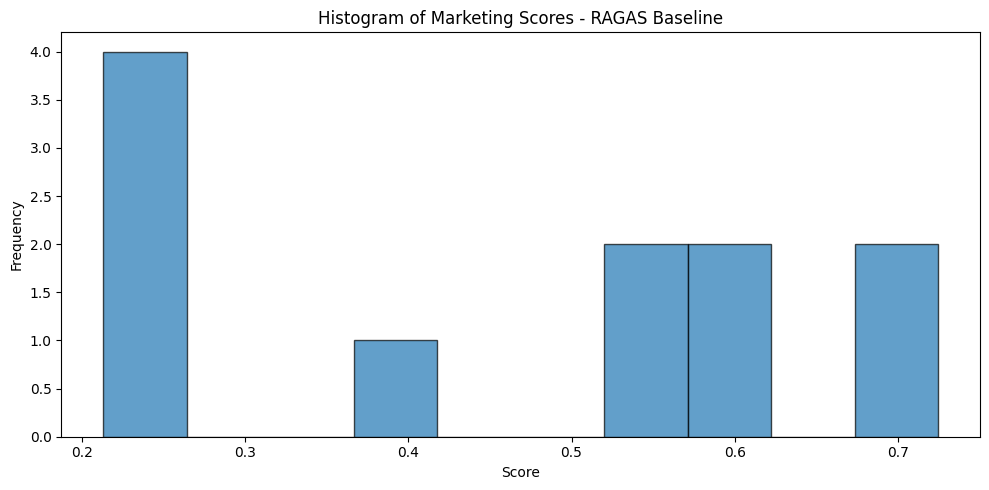

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = marketing_32_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

##RAGAS - MODEL V4 - SETUP

In [ ]:
marketing_data_4,research_data_4=convert_to_dataset(answers5)

In [ ]:
research_score_ragas_4 = evaluate(research_data_4,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

research_score_ragas_pandas_4=research_score_ragas_4.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_4.csv'
research_score_ragas_pandas_4.to_csv(file_path, index=False)

print(f"File saved to {file_path}")



Evaluating:   0%|          | 0/4 [00:00<?, ?it/s]

File saved to /content/drive/My Drive/assignment5data/research_score_ragas_4.csv


In [ ]:

marketing_score_ragas_4 = evaluate(marketing_data_4,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

marketing_score_ragas_pandas_4=marketing_score_ragas_4.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_4.csv'
marketing_score_ragas_pandas_4.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

Evaluating:   0%|          | 0/4 [00:00<?, ?it/s]

File saved to /content/drive/My Drive/assignment5data/marketing_score_ragas_4.csv


#RAGAS - MODEL V41 - RESEARCH SCORES

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_4.csv'

# Load the DataFrame
research_4_df = pd.read_csv(file_path)

research_ragas_4_scores=list(research_4_df['answer_correctness'].dropna())

In [ ]:
import numpy as np
print('average research score baseline:',sum(research_ragas_4_scores)/len(research_ragas_4_scores))

average research score baseline: 0.6742130422725854


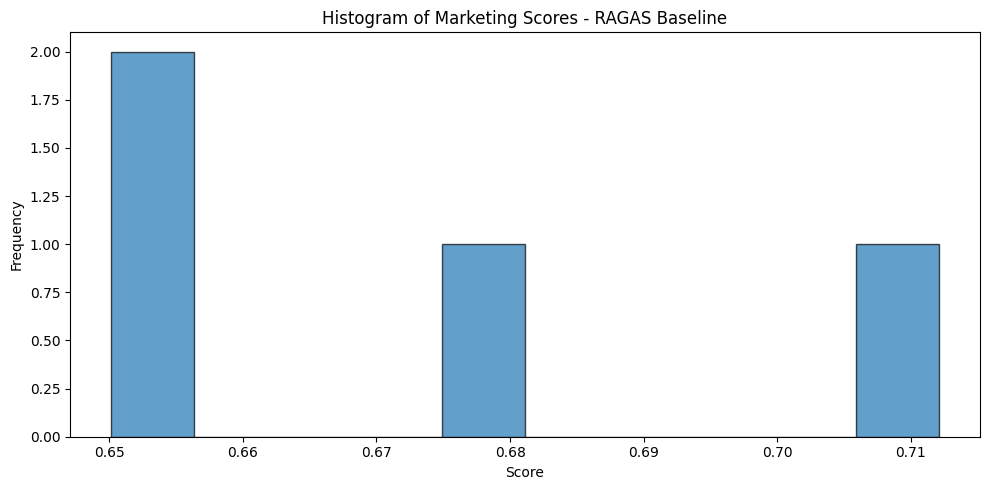

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = research_4_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS - MODEL V41 - MARKETING SCORES

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_4.csv'

# Load the DataFrame
marketing_4_df = pd.read_csv(file_path)

marketing_ragas_4_scores=list(marketing_4_df['answer_correctness'].dropna())

In [ ]:
import numpy as np
print('average research score baseline:',sum(marketing_ragas_4_scores)/len(marketing_ragas_4_scores))

average research score baseline: 0.49384623534319405


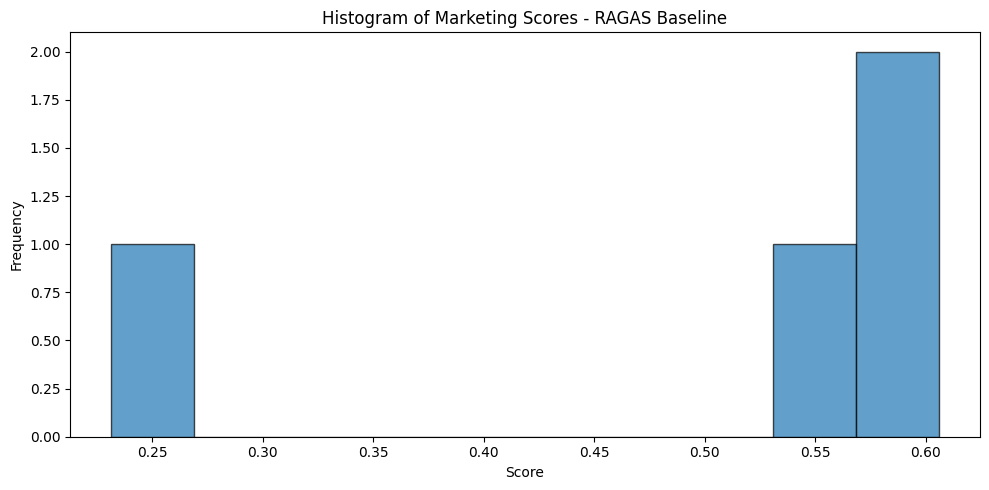

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = marketing_4_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS SETUP - FINAL MODEL V42

In [ ]:
marketing_data_42,research_data_42=convert_to_dataset(answers6)

In [ ]:
research_score_ragas_42 = evaluate(research_data_42,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26


Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
research_score_ragas_pandas_42=research_score_ragas_42.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_42.csv'
research_score_ragas_pandas_42.to_csv(file_path, index=False)

print(f"File saved to {file_path}")


File saved to /content/drive/My Drive/assignment5data/research_score_ragas_42.csv


In [ ]:
marketing_score_ragas_42 = evaluate(marketing_data_42,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
marketing_score_ragas_pandas_42=marketing_score_ragas_42.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_42.csv'
marketing_score_ragas_pandas_42.to_csv(file_path, index=False)

print(f"File saved to {file_path}")



File saved to /content/drive/My Drive/assignment5data/marketing_score_ragas_42.csv


#RAGAS - FINAL MODEL V42 - Research Scores

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_42.csv'

# Load the DataFrame
research_42_df = pd.read_csv(file_path)

research_ragas_42_scores=list(research_42_df['answer_correctness'].dropna())




In [ ]:
import numpy as np
print('average research score baseline:',sum(research_ragas_42_scores)/len(research_ragas_42_scores))


average research score baseline: 0.5348771067728841


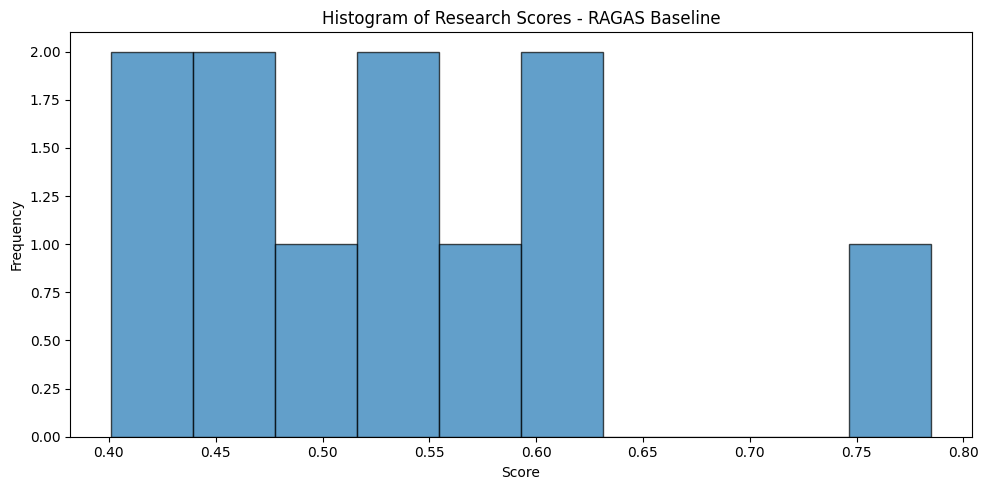

In [ ]:

import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = research_42_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#RAGAS - Model V42 - Marketing Scores

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_42.csv'

# Load the DataFrame
marketing_42_df = pd.read_csv(file_path)

marketing_ragas_42_scores=list(marketing_42_df['answer_correctness'].dropna())


In [ ]:
import numpy as np
print('average research score baseline:',sum(marketing_ragas_42_scores)/len(marketing_ragas_42_scores))

average research score baseline: 0.47942078058994314


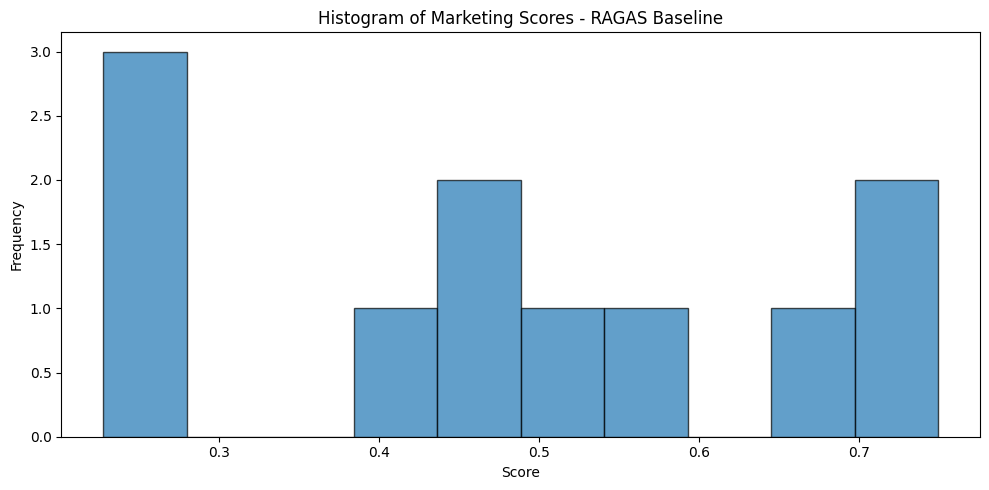

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = marketing_42_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#RAGAS - FINAL MODEL V5 - SETUP

In [ ]:
marketing_data_V5,research_data_V5=convert_to_dataset(answers7)

In [ ]:
research_score_ragas_V5 = evaluate(research_data_V5,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
research_score_ragas_pandas_V5=research_score_ragas_V5.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_V5.csv'
research_score_ragas_pandas_V5.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

File saved to /content/drive/My Drive/assignment5data/research_score_ragas_V5.csv


In [ ]:
marketing_score_ragas_V5 = evaluate(marketing_data_V5,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
marketing_score_ragas_pandas_V5=marketing_score_ragas_V5.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_V5.csv'
marketing_score_ragas_pandas_V5.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

File saved to /content/drive/My Drive/assignment5data/marketing_score_ragas_V5.csv


#RAGAS - FINAL MODEL V5 - RESEARCH SCORES

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_V5.csv'

# Load the DataFrame
research_V5_df = pd.read_csv(file_path)

research_ragas_V5_scores=list(research_V5_df['answer_correctness'].dropna())



In [ ]:
import numpy as np
print('average research score baseline:',sum(research_ragas_V5_scores)/len(research_ragas_V5_scores))

average research score baseline: 0.5888169211681525


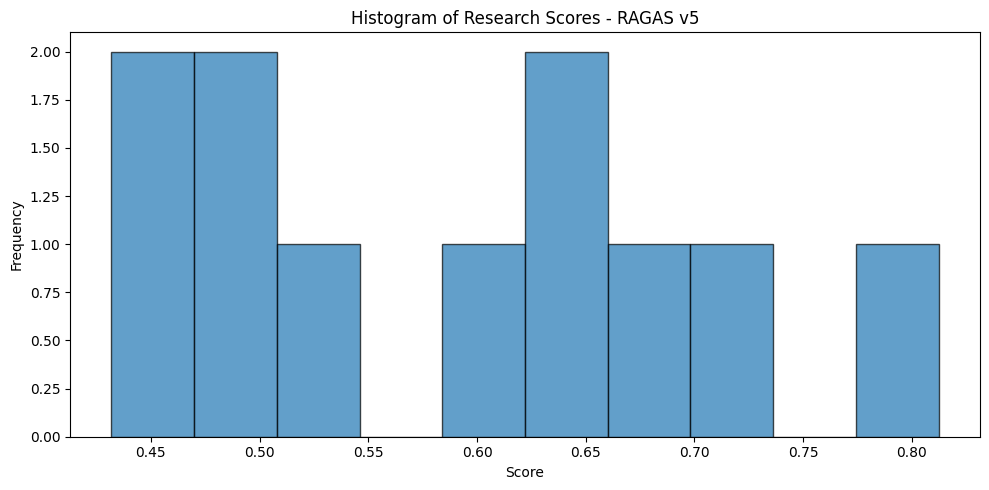

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = research_V5_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Research Scores - RAGAS v5')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS - FINAL MODEL V5 - MARKETING SCORES

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_V5.csv'

# Load the DataFrame
marketing_v5_df = pd.read_csv(file_path)

marketing_ragas_v5_scores=list(marketing_v5_df['answer_correctness'].dropna())

In [ ]:
import numpy as np
print('average marketing score baseline:',sum(marketing_ragas_v5_scores)/len(marketing_ragas_v5_scores))

average marketing score baseline: 0.5636173110590389


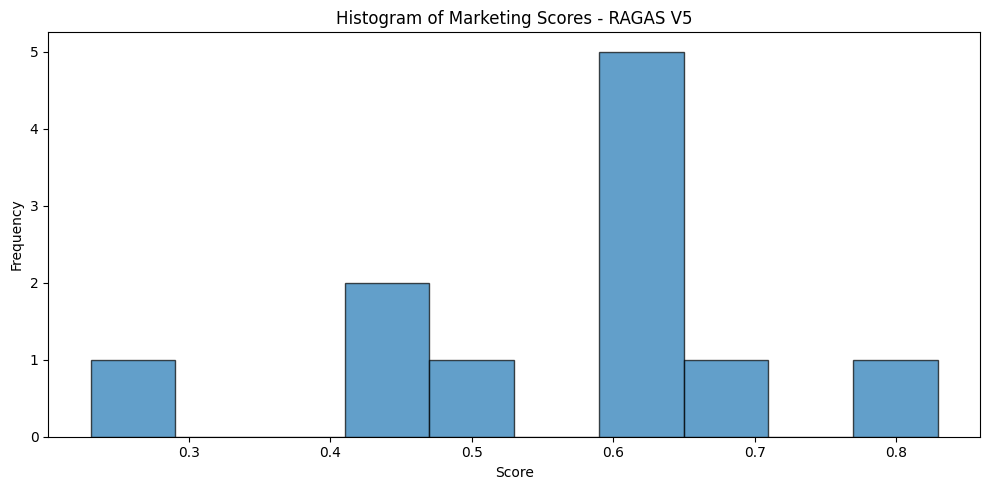

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = marketing_v5_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS V5')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS SETUP - FINAL MODEL V5 - FULL RUNTHROUGH

In [ ]:
marketing_data_v5full,research_data_v5full=convert_to_dataset(answers8)

In [ ]:
research_score_ragas_v5full = evaluate(research_data_v5full,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

Evaluating:   0%|          | 0/75 [00:00<?, ?it/s]

In [ ]:
research_score_ragas_pandas_v5full=research_score_ragas_v5full.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_v5full.csv'
research_score_ragas_pandas_v5full.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

File saved to /content/drive/My Drive/assignment5data/research_score_ragas_v5full.csv


In [ ]:
marketing_score_ragas_v5full = evaluate(marketing_data_v5full,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

Evaluating:   0%|          | 0/75 [00:00<?, ?it/s]

ERROR:ragas.executor:Exception raised in Job[26]: AttributeError('StringIO' object has no attribute 'sentences')


In [ ]:

marketing_score_ragas_pandas_v5full=marketing_score_ragas_v5full.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_v5full.csv'
marketing_score_ragas_pandas_v5full.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

File saved to /content/drive/My Drive/assignment5data/marketing_score_ragas_v5full.csv


#RAGAS RESEARCH SCORE - FINAL MODEL V5 - FULL RUN THROUGH

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_v5full.csv'

# Load the DataFrame
research_v5full_df = pd.read_csv(file_path)

research_ragas_v5full_scores=list(research_v5full_df['answer_correctness'].dropna())



In [ ]:
import numpy as np
print('average research score baseline:',sum(research_ragas_v5full_scores)/len(research_ragas_v5full_scores))


average research score baseline: 0.5838911719782391


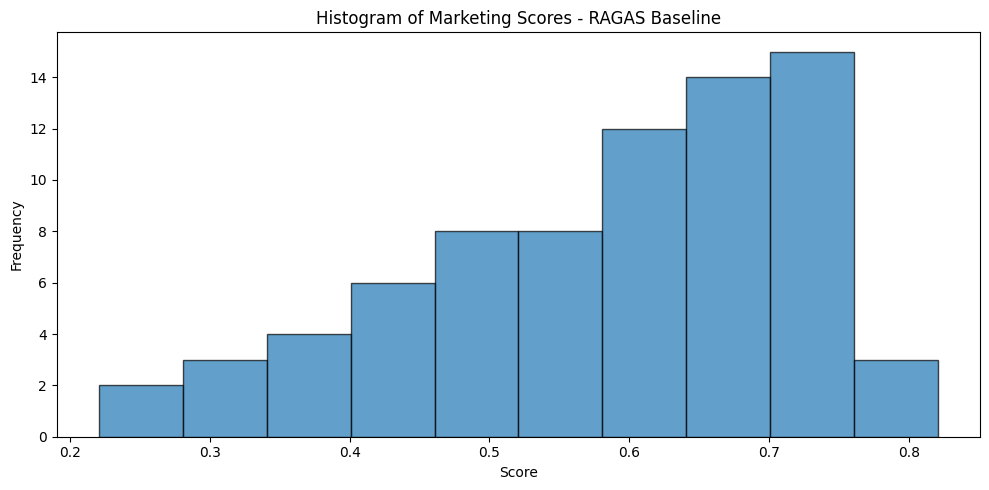

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = research_v5full_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS MARKETING - FULL MODEL V5 - FULL RUNTHROUGH

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_v5full.csv'

# Load the DataFrame
marketing_v5full_df = pd.read_csv(file_path)

marketing_ragas_v5full_scores=list(marketing_v5full_df['answer_correctness'].dropna())



In [ ]:
import numpy as np
print('average research score baseline:',sum(marketing_ragas_v5full_scores)/len(marketing_ragas_v5full_scores))



average research score baseline: 0.5173849227322664


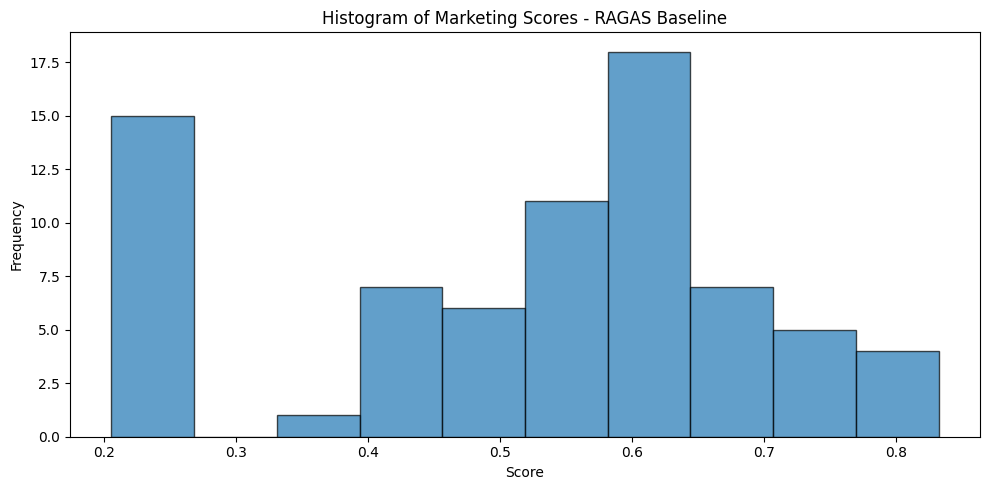

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = marketing_v5full_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS SETUP - FINAL MODEL V3.2 - FULL RUNTHROUGH

In [ ]:
marketing_data_v32full,research_data_v32full=convert_to_dataset(answers9)

In [ ]:
research_score_ragas_v32full = evaluate(research_data_v32full,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

Evaluating:   0%|          | 0/75 [00:00<?, ?it/s]

In [ ]:
research_score_ragas_pandas_v32full=research_score_ragas_v32full.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_v32full.csv'
research_score_ragas_pandas_v32full.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

File saved to /content/drive/My Drive/assignment5data/research_score_ragas_v32full.csv


In [ ]:
marketing_score_ragas_v32full = evaluate(marketing_data_v32full,metrics=[answer_correctness],llm=evaluator_llm)
#cost: $1.26

Evaluating:   0%|          | 0/75 [00:00<?, ?it/s]

In [ ]:
marketing_score_ragas_pandas_v32full=marketing_score_ragas_v32full.to_pandas()
# Save the DataFrame to CSV
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_v32full.csv'
marketing_score_ragas_pandas_v32full.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

File saved to /content/drive/My Drive/assignment5data/marketing_score_ragas_v32full.csv


#RAGAS RESEARCH SCORE - FULL MODEL V3.2 - FULL RUNTHROUGH

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/research_score_ragas_v32full.csv'

# Load the DataFrame
research_v32full_df = pd.read_csv(file_path)

research_ragas_v32full_scores=list(research_v32full_df['answer_correctness'].dropna())

In [ ]:
import numpy as np
print('average research score baseline:',sum(research_ragas_v32full_scores)/len(research_ragas_v32full_scores))

average research score baseline: 0.6010909732582802


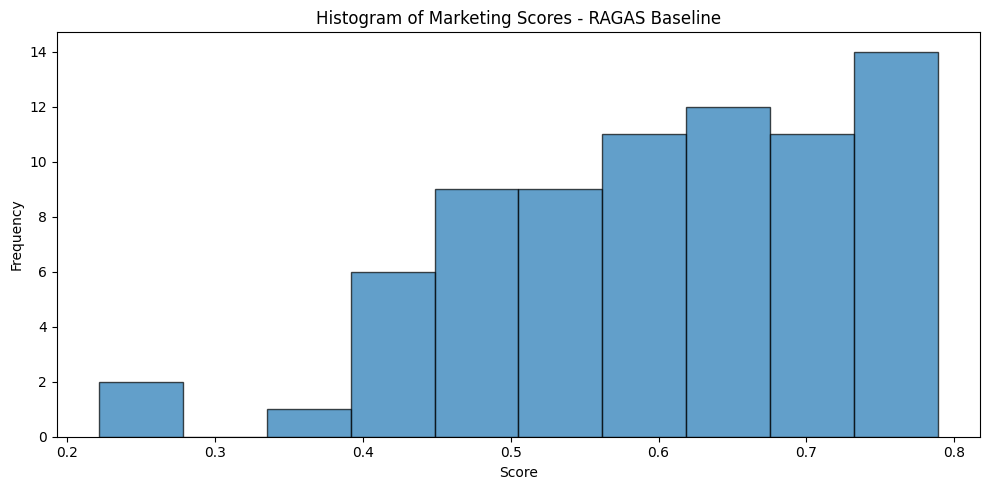

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = research_v32full_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#RAGAS MARKETING SCORE - FULL MODEL V3.2 - FULL RUNTHROUGH

In [ ]:
import pandas as pd

# Path to the file in your Google Drive
file_path = '/content/drive/My Drive/assignment5data/marketing_score_ragas_v32full.csv'

# Load the DataFrame
marketing_v32full_df = pd.read_csv(file_path)

marketing_ragas_v32full_scores=list(marketing_v32full_df['answer_correctness'].dropna())

In [ ]:
import numpy as np
print('average research score baseline:',sum(marketing_ragas_v32full_scores)/len(marketing_ragas_v32full_scores))

average research score baseline: 0.5349685122476286


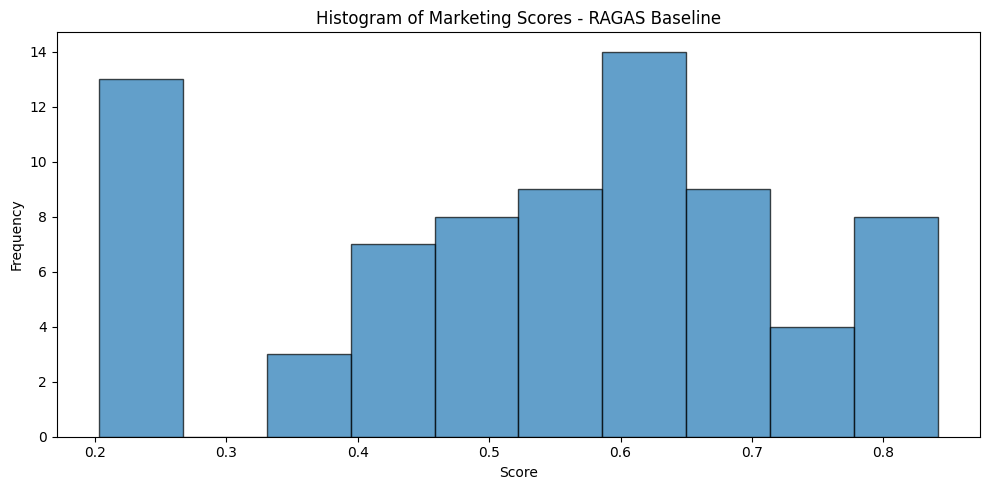

In [ ]:
import matplotlib.pyplot as plt
# Extract research and marketing scores
research_scores = marketing_v32full_df['answer_correctness'].dropna()

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(research_scores, bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Marketing Scores - RAGAS Baseline')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#TABLE OF RESULTS FOR ALL MODELS ACROSS ALL SCORING CATEGORIES

In [ ]:
import pandas as pd

resultsdata = {
    "Model Name": ["Baseline Model - Full Run",'Final Model V1', 'Final Model V31', 'Final Model V32', 'Final Model V41', 'Final Model V42','Final Model V5', 'Final Model V5 - Full Run', 'Final Model V32 - Full Run'],
    "Marketing BERTSCORE": [0.89355,0.886931,0.8953541,0.901005,0.906664,0.8811922,0.911475577137687,0.8896504783630371,0.8909521349271139],
    "Research BERTSCORE": [0.8849847,0.8751521,0.874252,0.8840422,0.889562,0.87346779,0.8896455222910101,0.8828915810585022,0.8828379392623902],
    "Marketing BLEU": [0.04990738,0.04835739,0.02778180,0.056496026,0.04595537,0.02781491,0.08699336020422323,0.039948342457525966,0.051781250953135176],
    "Research BLEU": [0.05285574,0.040186345,0.036140252,0.03953961,0.04897309,0.034558849,0.0538391747592738,0.04516540939433398,0.050917162969670596],
    "Marketing ROUGE": [0.46737108,0.442835678,0.399388484,0.51286401,0.55068373,0.355513168,0.5829554942650093,0.4599013353626401,0.4749802752785808],
    "Research ROUGE": [0.422502640,0.40659446,0.42788833,0.41163772,0.40833918,0.334077856, 0.4731980271265437,0.4350613537893065,0.44565928937687005],
    "Marketing RAGAS": [0.558053591,0.44582780062,0.3881935062,0.388193506,0.49384623534,0.4794207805, 0.5636173110590389,0.5173849227322664,0.5349685122476286],
    "Research RAGAS": [0.5090768164,0.5561628089,0.5339667706,0.6495115425,0.6742130422725,0.534877106, 0.5888169211681525,0.5838911719782391,0.6010909732582802],
}

results_df = pd.DataFrame(resultsdata)

In [ ]:
results_df

,Model Name,Marketing BERTSCORE,Research BERTSCORE,Marketing BLEU,Research BLEU,Marketing ROUGE,Research ROUGE,Marketing RAGAS,Research RAGAS
0,Baseline Model - Full Run,0.893550,0.884985,0.049907,0.052856,0.467371,0.422503,0.558054,0.509077
1,Final Model V1,0.886931,0.875152,0.048357,0.040186,0.442836,0.406594,0.445828,0.556163
2,Final Model V31,0.895354,0.874252,0.027782,0.036140,0.399388,0.427888,0.388194,0.533967
3,Final Model V32,0.901005,0.884042,0.056496,0.039540,0.512864,0.411638,0.388194,0.649512
4,Final Model V41,0.906664,0.889562,0.045955,0.048973,0.550684,0.408339,0.493846,0.674213
5,Final Model V42,0.881192,0.873468,0.027815,0.034559,0.355513,0.334078,0.479421,0.534877
6,Final Model V5,0.911476,0.889646,0.086993,0.053839,0.582955,0.473198,0.563617,0.588817
7,Final Model V5 - Full Run,0.889650,0.882892,0.039948,0.045165,0.459901,0.435061,0.517385,0.583891
8,Final Model V32 - Full Run,0.890952,0.882838,0.051781,0.050917,0.474980,0.445659,0.534969,0.601091


In [ ]:
import pandas as pd

fullrun= {
    "Model Name": ["Baseline Model - Full Run", 'Final Model V5 - Full Run','Final Model V32 - Full Run'],
    "Marketing BERTSCORE": [0.89355,0.8896504783630371,0.8909521349271139],
    "Research BERTSCORE": [0.8849847,0.8828915810585022,0.8828379392623902],
    "Marketing BLEU": [0.04990738,0.039948342457525966,0.051781250953135176],
    "Research BLEU": [0.05285574,0.04516540939433398,0.050917162969670596],
    "Marketing ROUGE": [0.46737108,0.4599013353626401,0.4749802752785808],
    "Research ROUGE": [0.422502640,0.4350613537893065,0.44565928937687005],
    "Marketing RAGAS": [0.558053591,0.5173849227322664,0.5349685122476286],
    "Research RAGAS": [0.5090768164,0.5838911719782391,0.6010909732582802],
}

fullrun_df = pd.DataFrame(fullrun)

In [ ]:
fullrun_df

,Model Name,Marketing BERTSCORE,Research BERTSCORE,Marketing BLEU,Research BLEU,Marketing ROUGE,Research ROUGE,Marketing RAGAS,Research RAGAS
0,Baseline Model - Full Run,0.893550,0.884985,0.049907,0.052856,0.467371,0.422503,0.558054,0.509077
1,Final Model V5 - Full Run,0.889650,0.882892,0.039948,0.045165,0.459901,0.435061,0.517385,0.583891
2,Final Model V32 - Full Run,0.890952,0.882838,0.051781,0.050917,0.474980,0.445659,0.534969,0.601091


#RESULTS HEAT MAP

Model Specifications
- Baseline Model: multi-qa-mpnet-base-dot-v1, Recursive (800, 100)
- Final Model V1: Recursive (800, 100), BERT Cross-Encoder Rerank, Query Expansion, Query Rewrite, Prompt Engineering
- Final Model V31: Recursive (200, 30), Cohere Rerank, Query Expansion, Query Rewrite, Prompt Engineering
- Final Model V32: Recursive (800, 100), Cohere Rerank, Query Expansion, Query Rewrite, Prompt Engineering
- Final Model V41: Unstructured API Chunking + Recursive (200, 30),Query Expansion, Cohere Rerank, Query Rewrite, Prompt Engineering
- Final Model V42: Unstructured API Chunking + Recursive (800, 100), Query Expansion, Cohere Rerank, Query Rewrite, Prompt Engineering
- Final Model V5: Unstructured API Chunking + Semantic Chunking + Recursive (800, 100), Cohere Rerank, Query Expansion, Query Rewrite, Prompt Engineering


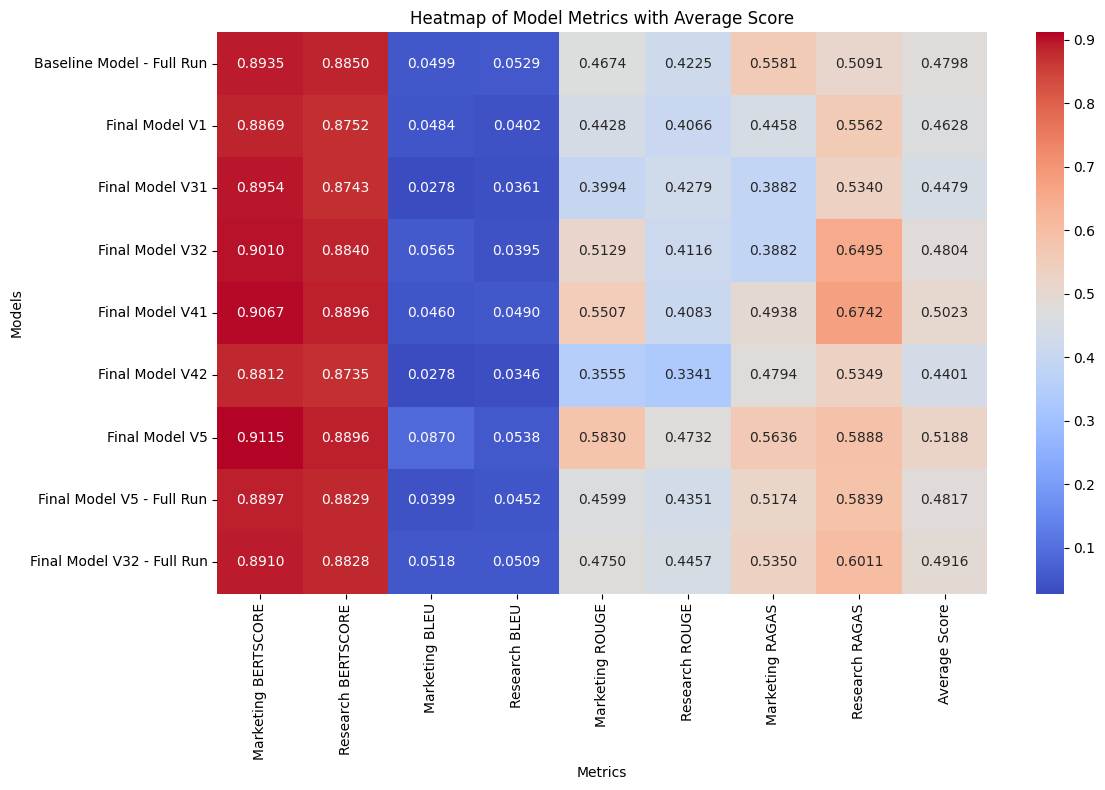

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(resultsdata)
df.set_index("Model Name", inplace=True)


df['Average Score'] = df.mean(axis=1)


plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Heatmap of Model Metrics with Average Score")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()

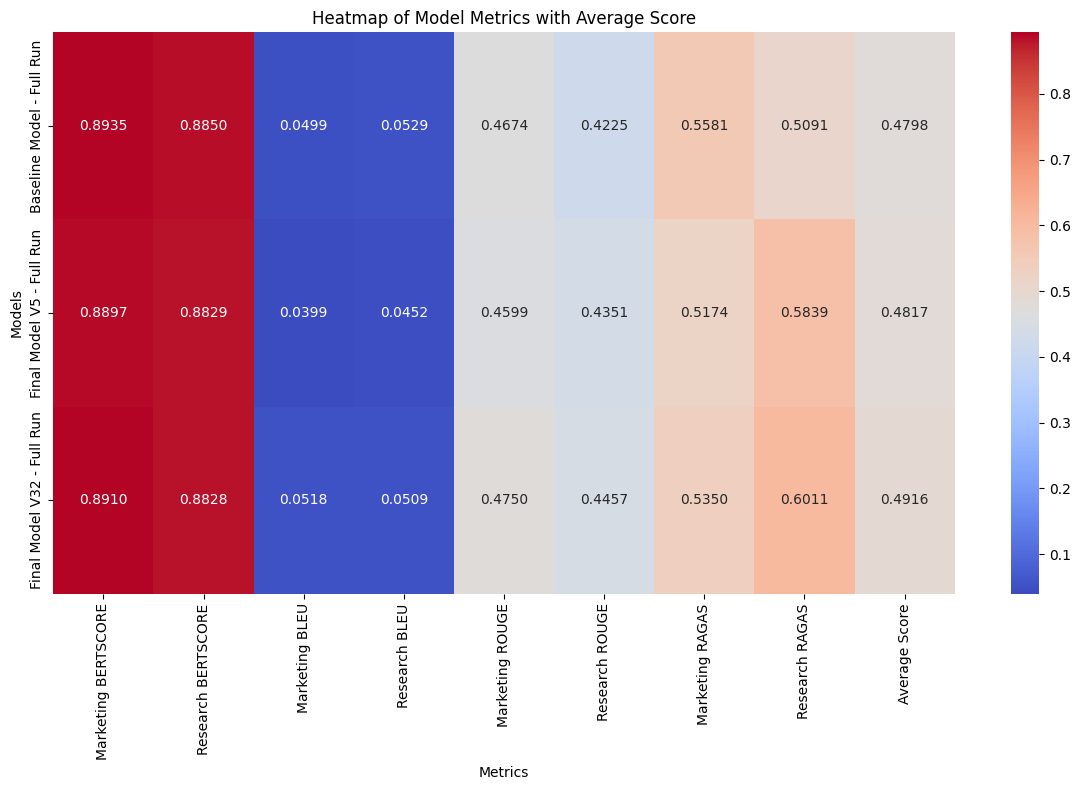

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(fullrun)
df.set_index("Model Name", inplace=True)

df['Average Score'] = df.mean(axis=1)


plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Heatmap of Model Metrics with Average Score")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()

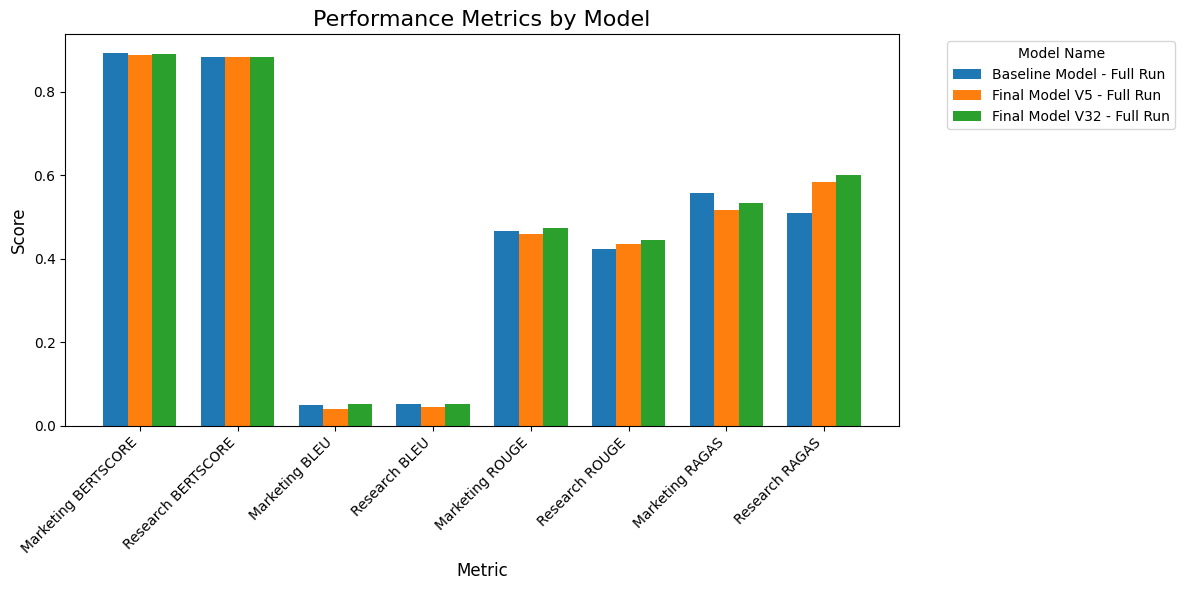

In [ ]:
metrics_df = fullrun_df.set_index("Model Name").transpose()
metrics_df.index.name = "Metric"

x = range(len(metrics_df.index))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

for i, model in enumerate(metrics_df.columns):
    ax.bar(
        [pos + i * width for pos in x],
        metrics_df[model],
        width=width,
        label=model,
    )
ax.set_title("Performance Metrics by Model", fontsize=16)
ax.set_xlabel("Metric", fontsize=12)
ax.set_ylabel("Score", fontsize=12)
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(metrics_df.index, rotation=45, ha="right", fontsize=10)
ax.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### 5.2 Some Test Questions

**QUESTIONS:**

1. "What purpose do large language models serve in the field of natural language processing?" (Question 0)

2. "What methods are typically employed to create training data for embedding models that use task-specific instructions?" (Question 50)

3. "How does a model's ability to answer questions relate to its exposure to specific types of questions during training?" (Question 83, no labeled answers)

For each of the three questions testing is done at an individual level and the following are provided:

a) The RAG results (research and marketing response)  
b) The context provided  
c) The document sources for the context  
d) Also discuss your metric(s) for the first two examples (for both responses) compared to the gold responses










#Test Question Setup

In [ ]:
from langchain_core.runnables import RunnableParallel

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

output_parser = StrOutputParser()
# Step 1: Define Two Prompt Templates
prompt_template_1 = """[INST]You are tasked with generating an answer that a tech engineering research team would come up with. \
The answer that you generate should be as verbose and as technical as possible. Limit your answer to 3 sentences. Do not use bullet points. \
Reference only the context provided
Here is the context: **** Context:{context} **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """


prompt_template_2 = """[INST]You are tasked with generating an answer that a marketing team would come up with. \
The answer that you generate should include high level terminology and buzzwords and it should not be too in depth or technical. Limit your answer to two sentences. Do not use bullet points \
Reference only the context provided
Here is the context: **** Context:{context} **** Here is the question **** Question: {question}[/INST] **** Answer the Question Using the Context: """

# Convert the templates to LangChain prompts
prompt_1 = ChatPromptTemplate.from_template(prompt_template_1)
prompt_2 = ChatPromptTemplate.from_template(prompt_template_2)

#create runnable lambda functions for convert to answer and also multiple query expansion
runnable_convert_to_answer = RunnableLambda(convert_to_answer)
runnable_retrieve_docs = RunnableLambda(retrieve_docs)

# Define Two Separate RAG Chains with Different Prompts
# First chain for summarization
chain_1 = (
    RunnableParallel({
        "context": RunnablePassthrough()
                   | multiple_query_expansion
                    | runnable_convert_to_answer.batch
                    | runnable_retrieve_docs.batch,
        "question": RunnablePassthrough()
    })
     | cohere_rerank_test #need to return a dictionary
     | reformat
     | prompt_1  # Use the summarization prompt template
     | cohere_chat_model  # Language model for response generation
     | output_parser  # Parse output to clean it up
)


# Second chain for question answering
chain_2 = (
    RunnableParallel({
        "context": RunnablePassthrough()
                   | multiple_query_expansion
                    | runnable_convert_to_answer.batch
                    | runnable_retrieve_docs.batch,
        "question": RunnablePassthrough()
    })
     | cohere_rerank_test #need to return a dictionary
     | reformat
     | prompt_2  # Use the summarization prompt template
     | cohere_chat_model  # Language model for response generation
     | output_parser  # Parse output to clean it up
)

# Combine Chains into a Parallel Runnable Map
final_map_chain = RunnableParallel(gold_answer_research=chain_1, gold_answer_marketing=chain_2)


In [ ]:
%%capture
!pip install bert_score
import bert_score
from bert_score import score


%%capture
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate.bleu_score import sentence_bleu
!pip install rouge-score
from rouge_score import rouge_scorer

def compute_score(data,model=None,scoretype='bertscore'):
  if scoretype=='bertscore':
    pass
  if scoretype=='rouge':
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
  if scoretype=='ragas':
    pass
  if scoretype=='bleu':
    # Adding smoothing to handle short sentences
    smoothing = SmoothingFunction().method1
  list_of_scores=[]
  scores={}
  for x in data:
    num=x['num']
    question=x['question']
    goldresearch=(x['gold_answer_research'])
    predictedresearch=x['rag_answer']['gold_answer_research']
    goldmarketing=x['gold_answer_marketing']
    predictedmarketing=x['rag_answer']['gold_answer_marketing']

    if scoretype=='bertscore':
      researchresults = score([predictedresearch], [goldresearch], lang='en',verbose=False)
      marketingresults = score([predictedmarketing], [goldmarketing], lang='en',verbose=False)
      scores={'num':num,'question':question,'research':researchresults,'marketing':marketingresults}
      list_of_scores.append(scores)

    if scoretype=='rouge':
      researchresults = scorer.score(predictedresearch,goldresearch)
      marketingresults = scorer.score(predictedmarketing,goldmarketing)
      scores={'num':num,'question':question,'research':researchresults,'marketing':marketingresults}
      list_of_scores.append(scores)

    if scoretype=='bleu':
      researchresults = sentence_bleu([predictedresearch.split()], goldresearch.split(),smoothing_function=smoothing)
      marketingresults = sentence_bleu([predictedmarketing.split()], goldmarketing.split(),smoothing_function=smoothing)
      scores={'num':num,'question':question,'research':researchresults,'marketing':marketingresults}
      list_of_scores.append(scores)

    if scoretype=='ragas':
      list_of_scores.append('test')
      pass


  return list_of_scores

In [ ]:
%%capture
!pip install ragas

from datasets import Dataset
from ragas.metrics import faithfulness, answer_correctness
from ragas import evaluate

from google.colab import userdata

%%capture
!pip install langchain-openai


import os
openaikey=userdata.get('openai')
os.environ["OPENAI_API_KEY"] = openaikey

from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
evaluator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-3.5-turbo"))
evaluator_embeddings = LangchainEmbeddingsWrapper(OpenAIEmbeddings())

def convert_to_dataset(data):
  new_dict_research={'question':[],'answer':[],'ground_truth':[]}
  new_dict_marketing={'question':[],'answer':[],'ground_truth':[]}
  for x in data:
    num=x['num']
    question=x['question']
    goldresearch=(x['gold_answer_research'])
    predictedresearch=x['rag_answer']['gold_answer_research']
    goldmarketing=x['gold_answer_marketing']
    predictedmarketing=x['rag_answer']['gold_answer_marketing']
    new_dict_research['question'].append(question)
    new_dict_research['answer'].append(predictedresearch)
    new_dict_research['ground_truth'].append(goldresearch)
    new_dict_marketing['question'].append(question)
    new_dict_marketing['answer'].append(predictedmarketing)
    new_dict_marketing['ground_truth'].append(goldmarketing)
  marketing_dataset=Dataset.from_dict(new_dict_marketing)
  research_dataset=Dataset.from_dict(new_dict_research)
  return marketing_dataset,research_dataset

In [ ]:
import random
import time

#select 4 random questions and invoke the chain to get answers
def cohere_rag_eval(data,rag_chain,sleeptime=61):
  """returns a list of dictionaries - each with the question, rag_answer, gold_answer_research, and gold_answer_marketing"""
  rag_answers=[]

  max_num=max(data.keys())
  random_number = random.randint(0, max_num)
  counter=0

  for num in data:
    tracker={}
    entry=data[num]
    question=entry['question']
    rag_answer=rag_chain.invoke(question)
    tracker['num']=num
    tracker['question']=question
    tracker['rag_answer']=rag_answer
    tracker['gold_answer_research']=entry['gold_answer_research']
    tracker['gold_answer_marketing']=entry['gold_answer_marketing']
    rag_answers.append(tracker)
    counter+=1
    if counter%25==0 and counter!=0:
      print('done')
  return rag_answers

In [ ]:
def final_scoring(data):
  bert=compute_score(data)
  bleu=compute_score(data,scoretype='bleu')
  rouge=compute_score(data,scoretype='rouge')
  marketing_data,research_data=convert_to_dataset(data)
  research_score_ragas = evaluate(research_data,metrics=[answer_correctness],llm=evaluator_llm)
  marketing_score_ragas = evaluate(marketing_data,metrics=[answer_correctness],llm=evaluator_llm)
  bleu_dict={'research':bleu[0]['research'],'marketing':bleu[0]['marketing']}
  bert_dict={'research':bert[0]['research'],'marketing':bert[0]['marketing']}
  rouge_dict={'research':rouge[0]['research'],'marketing':rouge[0]['marketing']}
  ragas_dict={'research':research_score_ragas['answer_correctness'],'marketing':marketing_score_ragas['answer_correctness']}
  return bleu_dict,bert_dict,rouge_dict,ragas_dict

In [ ]:
def print_scores(data, category_name):
    """
    Prints out the scores neatly for a given category.
    """
    print(f"Scores for {category_name}:")
    print("-" * (12 + len(category_name)))
    for metric, score in data:
        if isinstance(score, dict):  # If the score is a dictionary (e.g., BERTScore, ROUGE)
            print(f"{metric}:")
            for key, value in score.items():
                print(f"  {key}: {value:.4f}")
        else:  # If the score is a single value (e.g., BLEU, RAGAS)
            print(f"{metric}: {score:.4f}")
    print()

####Test Question 1 - "What purpose do large language models serve in the field of natural language processing?"

Please run the query:

In [ ]:
test1question={0:{"question": "What purpose do large language models serve in the field of natural language processing?",
  "gold_answer_research": "Large language models (LLMs) serve the purpose of enabling general-purpose language generation and other natural language processing tasks such as classification. They achieve this by learning statistical relationships from text documents during computationally intensive self-supervised and semi-supervised training. LLMs can be used for text generation by predicting the next token or word, making them valuable for tasks like speech recognition, machine translation, and information retrieval. Additionally, LLMs have superseded previous models like recurrent neural networks, showcasing their efficiency and effectiveness in NLP tasks.",
  "gold_answer_marketing": "Large language models serve the purpose of improving performance in various natural language processing tasks, such as speech recognition, machine translation, natural language generation, optical character recognition, handwriting recognition, grammar induction, and information retrieval."}}
test1answers=cohere_rag_eval(test1question,final_map_chain)

**context_passed_to_LLM**  ['A large language model (LLM) is a type of computational model designed for natural language processing tasks such as language generation. As language models, LLMs acquire these abilities by learning statistical relationships from vast amounts of text during a self-supervised and semi-supervised training process.', 'Large language models, currently their most advanced form, are a combination of larger datasets (frequently using words scraped from the public internet), feedforward neural networks, and transformers. They have superseded recurrent neural network-based models, which had previously superseded the pure statistical models, such as word n-gram language model.']  **context_passed_end**
**source_passed_to_LLM**  ['https://en.wikipedia.org/wiki/Large_language_model', 'https://en.wikipedia.org/wiki/Language_model', 'https://en.wikipedia.org/wiki/Llama_(language_model)', 'https://arxiv.org/pdf/2401.17268.pdf', 'https://en.wikipedia.org/wiki/Large_languag

In [ ]:
# Print the results
print("Research Output:", test1answers[0]['rag_answer']['gold_answer_research'])
print('-'*200)
print("Marketing Output:", test1answers[0]['rag_answer']['gold_answer_marketing'])

Research Output: Large Language Models (LLMs) are an integral component in natural language processing (NLP) systems, designed to enhance language understanding and generation tasks. These models excel in various NLP applications, including response generation, logical reasoning, and program synthesis, by learning complex statistical patterns from extensive textual data during training. The primary objective of LLMs is to improve the overall performance and capabilities of NLP systems, enabling them to process and understand human language more effectively.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Marketing Output: Large Language Models (LLMs) are a powerful tool for natural language processing, enabling advanced language understanding and generation by leveraging vast datasets and cutting-edge neural network architectures. Thes

In [ ]:
bleu,bert,rouge,ragas=final_scoring(test1answers)

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
bleu

{'research': 0.02070162880277114, 'marketing': 0.011847843972736657}

In [ ]:
bert

{'research': (tensor([0.9071]), tensor([0.8881]), tensor([0.8975])),
 'marketing': (tensor([0.8780]), tensor([0.8821]), tensor([0.8801]))}

In [ ]:
rouge

{'research': {'rouge1': Score(precision=0.36046511627906974, recall=0.4189189189189189, fmeasure=0.38749999999999996),
  'rougeL': Score(precision=0.22093023255813954, recall=0.25675675675675674, fmeasure=0.23750000000000002)},
 'marketing': {'rouge1': Score(precision=0.3235294117647059, recall=0.2391304347826087, fmeasure=0.275),
  'rougeL': Score(precision=0.2647058823529412, recall=0.1956521739130435, fmeasure=0.225)}}

In [ ]:
ragas

{'research': [0.5561961949233281], 'marketing': [0.563355494091469]}

In [ ]:
question1engineeringscores=[    ["BLEU", 0.02070162880277114],
    ["BERTScore", {"Precision": 0.9071, "Recall": 0.8881, "F1": 0.8975}],
    ["ROUGE", {"Precision": 0.3605, "Recall": 0.4189, "F1": 0.3875}],
    ["RAGAS", 0.5561961949233281]
]


In [ ]:
question1marketingscores=[    ["BLEU", 0.011847843972736657],
    ["BERTScore", {"Precision": 0.8780, "Recall": 0.8821, "F1": 0.8801}],
    ["ROUGE", {"Precision": 0.3325, "Recall": 0.2391, "F1": 0.2750}],
    ["RAGAS", 0.563355494091469]
]


In [ ]:
# Print scores
print_scores(question1engineeringscores, "Research")
print_scores(question1marketingscores, "Marketing")

Scores for Research:
--------------------
BLEU: 0.0207
BERTScore:
  Precision: 0.9071
  Recall: 0.8881
  F1: 0.8975
ROUGE:
  Precision: 0.3605
  Recall: 0.4189
  F1: 0.3875
RAGAS: 0.5562

Scores for Marketing:
---------------------
BLEU: 0.0118
BERTScore:
  Precision: 0.8780
  Recall: 0.8821
  F1: 0.8801
ROUGE:
  Precision: 0.3325
  Recall: 0.2391
  F1: 0.2750
RAGAS: 0.5634



Discuss...

#### Test Question 2 - "What methods are typically employed to create training data for embedding models that use task-specific instructions?"

In [ ]:
test2question={0:{"question": "What methods are typically employed to create training data for embedding models that use task-specific instructions?",
  "gold_answer_research": "To create training data for embedding models that use task-specific instructions, a common method is to combine datasets from different sources, such as the SuperNaturalInstructions dataset with existing collections designed for embedding training. The SuperNaturalInstructions dataset provides natural language instructions, which can be paired with positive and negative examples to form training samples. Additionally, for tasks like classification or similarity, training samples can be constructed by selecting text sequences associated with different classes or similarities. This diverse training data is essential for instruction-based finetuning, which enables the embedding model to learn from a wide range of tasks and domains.",
  "gold_answer_marketing": "Training data for embedding models that use task-specific instructions is typically created by formulating a wide variety of tasks as text-to-text problems, distinguishing good/bad candidate outputs given an input text. This is done by combining datasets with natural language instructions and constructing positive and negative pairs for training."}}
test2answers=cohere_rag_eval(test2question,final_map_chain)

**context_passed_to_LLM**  ['us to explore the scaling behaviors of instruction-\nfinetuned embedding models. Given an input text\nx and a task instruction Ix, INSTRUCTOR encodes\ntheir concatenation Ix ⊕x. We then generate a\nfixed-sized, task-specific embedding EI(Ix, x) by\napplying mean pooling to the last hidden represen-\ntations over the tokens in x.\n2.2\nTraining Objective\nINSTRUCTOR is trained by formulating a wide\nvariety of tasks as a text-to-text problem of distin-\nguishing good/bad candidate outputs y ∈{y+, y−\ni }\ngiven an input x, where a training sample corre-\nsponds to the tuple (x, Ix, y, Iy), with Ix and Iy\nbeing instructions associated with x and y, respec-\ntively. For example, in a retrieval task, x is a query,\nand good/bad y is a relevant/irrelevant document', '(       ,       ) \nTrain\nEval\n11 datasets\nPrompt Retrieval\nText Evaluation\n4 datasets\nFigure 2: INSTRUCTOR training and evaluation pipeline. INSTRUCTOR is a single embedding model that takes

In [ ]:
# Print the results
print("Research Output:", test2answers[0]['rag_answer']['gold_answer_research'])
print('-'*200)
print("Marketing Output:", test2answers[0]['rag_answer']['gold_answer_marketing'])

Research Output: To construct training data for embedding models utilizing task-specific instructions, a prevalent approach involves formulating diverse tasks as text-to-text problems, where the objective is to discriminate between positive and negative candidate outputs for a given input. This process entails the creation of tuples containing the input, associated instructions, and corresponding positive or negative outputs. By employing this strategy, the model can learn to generate task-specific embeddings that effectively capture the nuances of each task.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Marketing Output: To create training data for task-specific embedding models, a common approach is to formulate various tasks as text-to-text problems, distinguishing between positive and negative output candidates. This involves con

In [ ]:
bleu,bert,rouge,ragas=final_scoring(test2answers)

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
bleu

{'research': 0.07514015083804461, 'marketing': 0.12120981066263758}

In [ ]:
bert

{'research': (tensor([0.8886]), tensor([0.8756]), tensor([0.8820])),
 'marketing': (tensor([0.9274]), tensor([0.9237]), tensor([0.9255]))}

In [ ]:
rouge

{'research': {'rouge1': Score(precision=0.39603960396039606, recall=0.5128205128205128, fmeasure=0.44692737430167595),
  'rougeL': Score(precision=0.2376237623762376, recall=0.3076923076923077, fmeasure=0.2681564245810056)},
 'marketing': {'rouge1': Score(precision=0.5769230769230769, recall=0.6521739130434783, fmeasure=0.6122448979591837),
  'rougeL': Score(precision=0.40384615384615385, recall=0.45652173913043476, fmeasure=0.4285714285714286)}}

In [ ]:
ragas

{'research': [0.45888038867423364], 'marketing': [0.57711096803193]}

In [ ]:
question2engineeringscores=[    ["BLEU", 0.07514015083804461],
    ["BERTScore", {"Precision": 0.8886, "Recall": 0.8756, "F1": 0.8820}],
    ["ROUGE", {"Precision": 0.3960, "Recall": 0.5128, "F1": 0.4469}],
    ["RAGAS", 0.45888038867423364]
]


In [ ]:
question2marketingscores=[    ["BLEU", 0.12120981066263758],
    ["BERTScore", {"Precision": 0.9274, "Recall": 0.9237, "F1": 0.9255}],
    ["ROUGE", {"Precision": 0.5769, "Recall": 0.6521, "F1": 0.6122}],
    ["RAGAS", 0.57711096803193]
]


In [ ]:
# Print scores
print_scores(question2engineeringscores, "Research")
print_scores(question2marketingscores, "Marketing")

Scores for Research:
--------------------
BLEU: 0.0751
BERTScore:
  Precision: 0.8886
  Recall: 0.8756
  F1: 0.8820
ROUGE:
  Precision: 0.3960
  Recall: 0.5128
  F1: 0.4469
RAGAS: 0.4589

Scores for Marketing:
---------------------
BLEU: 0.1212
BERTScore:
  Precision: 0.9274
  Recall: 0.9237
  F1: 0.9255
ROUGE:
  Precision: 0.5769
  Recall: 0.6521
  F1: 0.6122
RAGAS: 0.5771



Discuss...

#### Test Question 3: "How does a model's ability to answer questions relate to its exposure to specific types of questions during training?"

In [ ]:
# Run the chain with a sample question
question3 = "How does a model's ability to answer questions relate to its exposure to specific types of questions during training?"
results=final_map_chain.invoke(question)

**context_passed_to_LLM**  ['A large language model (LLM) is a type of computational model designed for natural language processing tasks such as language generation. As language models, LLMs acquire these abilities by learning statistical relationships from vast amounts of text during a self-supervised and semi-supervised training process.', 'Large language models, currently their most advanced form, are a combination of larger datasets (frequently using words scraped from the public internet), feedforward neural networks, and transformers. They have superseded recurrent neural network-based models, which had previously superseded the pure statistical models, such as word n-gram language model.']  **context_passed_end**
**source_passed_to_LLM**  ['https://en.wikipedia.org/wiki/Large_language_model', 'https://en.wikipedia.org/wiki/Language_model', 'https://en.wikipedia.org/wiki/Llama_(language_model)', 'https://en.wikipedia.org/wiki/Language_model', 'https://arxiv.org/pdf/2401.17268.pd

In [ ]:
# Print the results
print("Research Output:", results["gold_answer_research"])
print('-'*200)
print("Marketing Output:", results["gold_answer_marketing"])

Research Output: Large Language Models (LLMs) are a cornerstone of natural language processing (NLP), revolutionizing the field by offering a sophisticated approach to language understanding and generation. These models excel at learning intricate patterns and semantic relationships from extensive textual data, enabling them to perform various NLP tasks, including text prediction, language translation, and sentiment analysis, with remarkable proficiency. By integrating feedforward neural networks, transformers, and vast datasets, LLMs have significantly advanced the capabilities of NLP systems, making them indispensable tools for numerous language-centric applications.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Marketing Output: Large Language Models (LLMs) are an innovative solution for natural language processing, offering advan

# How would you expect your response quality to change if you had a chunk size of 50?
With a chunk size of 50, my responses would likely lose some cohesiveness and broader contextual understanding, as I might struggle to connect ideas across chunks. This could lead to more fragmented answers and potentially repetitive content, as I might not recognize when ideas have already been addressed. Semantic relationships between concepts spanning multiple chunks could also weaken, reducing the depth of my analysis. On the positive side, smaller chunks might result in more detailed focus on specific parts of the input, improving precision in narrow contexts. Overall, this change would likely sacrifice completeness and contextual synthesis in favor of more granular attention to details.

#How would you expect your response quality to change if you had a chunk size of 5000?
With a chunk size of 5000, my response quality would likely improve due to the ability to process and synthesize a larger context at once. This would result in more cohesive and well-connected answers, as I could maintain the flow of ideas across a broader range of content. Larger chunks would reduce the likelihood of fragmented or incomplete responses, improving overall comprehensiveness. However, processing larger chunks may introduce added noise, as irrelevant or extraneous information within the chunk could dilute focus and impact the precision of my responses. Additionally, while handling complex questions more effectively, there could be a risk of overlooking smaller details within the larger chunk, especially if noisy information competes with key content.


# If you had time, how do you think fine-tuning of the LLM could help?  What type of data would you want for that? And which training approach would you take?
Fine-tuning the LLM could significantly improve its ability to handle specific tasks by tailoring it to the nuances of the desired domain or problem. To achieve this, I would want high-quality, task-specific datasets that include examples of both ideal responses and edge cases to ensure robustness. For instance, annotated data that emphasizes semantic understanding, paraphrasing, and nuanced reasoning would help improve the model’s ability to capture deeper contextual relationships. I would use instruction-tuning or supervised fine-tuning approaches, where the model is trained on input-output pairs to refine its behavior for specific tasks. This method would ensure the LLM not only generates more accurate responses but also handles task-specific requirements like relevance, precision, and tone.


# What was your design philosophy of the prompts? How did they differ between engineering and marketing support?
The design philosophy of the prompts likely emphasized tailoring the language and structure to the specific needs of the audience. For engineering support, prompts would focus on clarity, precision, and technical accuracy, using terminology familiar to engineers and framing tasks in logical, step-by-step terms. Conversely, marketing support prompts would prioritize persuasive and engaging language, highlighting benefits and key takeaways in a concise, audience-friendly manner. While engineering prompts aim to facilitate problem-solving and functionality, marketing prompts are crafted to drive impact, align with branding, and resonate emotionally with the audience. This difference reflects the goals of each domain: engineering requires specificity and utility, while marketing demands creativity and audience connection.


# What are your average and peak load estimates for the system? Given that, would you suggest a pay-per-use deployment or one that reserves the LLM?
The average load depends on the expected query volume, with each question-answer taking about 10 seconds and costing 6 cents. For example, handling 100 questions per hour would cost around 6 dollars per hour and the system is also likely to experience a large slow down with a high number of requests. A pay-per-use deployment is ideal if the system experiences fluctuating or unpredictable demand, as it minimizes costs during low traffic periods. On the other hand, reserving the LLM may be more cost-effective for consistently high usage, ensuring availability and lower per-unit cost at scale. The choice ultimately depends on the predictability and consistency of query volumes over time.


# What type of limitations/risks would you see in using this system?
The system does not have any safe guards for alignment and toxicity and it also does not guarantee that there will not be any hallucination. Additionally the cost of each query is too high when using Cohere's reranking and LLM. The chunking is also highly situational and dependent on the document so it would be difficult to scale and continue to add content to the database. Privacy and Security concerns are present if sensitive or personal data are processed without adequate safeguards, particularly since the system relies on external infrastructure.

#Proof of Concept Functionality
The results prove definitively that in a question answering scenario, a basic LLM is outmatched by a more sophisticated RAG system. This proved to be especially true for research teams seeking greater detail in results. The only downside to building a RAG system with multiple api calls per question answer is that each call costs money. For the project I ended up spending $30 for roughly 500 final text generations. Each question answer costs about six cents (the 500 does not include development and testing run throughs).
#Lessons Learned & Challenges and Limitations & Next Steps & Summary & Recommendations
Overall this project helped me understand some of the basic components of a rag system including chunking, embedding, vector databases, retrieval, prompt engineering, and LLMs. I also learned some of the weak points of rag systems and how to address them.  

The primary sources of error leading to poorly formatted answers and hallucinations were issues with the chunks. Larger chunk sizes introduced excessive noise, resulting in convoluted answers. Additionally, the retrieval method contributed to poor responses; without query manipulation or reranking, the retrieved chunks were often irrelevant. Finally, a lack of effective prompt engineering resulted in poorly formatted answers with an incorrect tone and insufficient detail.

Getting chunks that contained useful information and addressed the question was difficult. At one point in the project I felt I had a complete pipeline and then I manually inspected a batch of 5 chunks only to find they were all useless and filled with only keywords rather than real content and explanations. I was able to use Unstructured for a rudimentary fix but in the future I would invest more time into chunking strategies and also fine-tuning the embedding model. I would fine-tune using a reward function for reinforcement learning with human feedback. Another area of potential improvement was the retrieval stage. I would use iterative retrieval and continue to retrieve content as the answer is being generated. I would explore selecting a larger embedding model and using a graph vector database. Lastly, for metrics I would expand on my RAGAS usage to include context_recall, factual_correctness, and faithfulness.


In [ ]:
##THIS CELL IS FOR NOTE TAKING AND DEVELOPMENT PURPOSES



#two models - mistral and cohere
#two types of gold answers - engineering, marketing
#retrieve chunks from vector db and use them in a prompt template to create a engineering style input and a marketing style input
#come up with metric to measure both types of answers

#start with a baseline - string match / similarity score
#research some metrics - and other frameworks
#possible to use other models as judges

#consider vector database retrieval and scoring
#consider chunk size

#build an end to end system that given a question uses the vector database to answer


#vector db - qdrant_vectorstore
#vector retriever - retriever = qdrant_vectorstore.as_retriever()

#chunk size - embedding model - chunk size - retriever model

#smaller chunks have less noise
#evaluate our retrieval in isolation (is the best source in our set of retrieved chunks) and evaluating our LLMs response (given the best source,
#is the LLM able to produce a quality answer). And for end-to-end evaluation, we can assess the quality of the entire system
 #(given the data sources, what is the quality of the response)

#how to compare and why we compare different models

#use a better llm to tell us a score of how good the answers are
#compare the scores of the rag system with context and without context (also vary k - number of chunks) to understand how well the retriever is performing
#compare the scores of the rag system with context across different chunk sizes - consider small chunks but retrieving a bit of other chunks around it. consider storing summary embedding of each doc
#try different embedding models

#notes from OH 1
#embedding models - contrastive learning objective - trained on pairs, cosine similarity for things that go together are high (question and answer)
#other models were using cosine similarity rather than QA pairs (?)
# contrastive learning is binary classification task where yes/no if the pair goes together (way more predictions given a set of training data)
# could potentially identify pairs better?
# 100 vectors for questions 100 vectors for answers - compare them all, more training data for the model
# all-mini-LM-L6-v2
# after researching a little use - all-mpnet-base-v2

#more notes from OH 1
#try using llama 3.2 8B - it does well for evaluation
#justify evaluation techniques

#more notes OH1
#reranking using MMR - Maximal Marginal Relevance

#pick some sensible hyperparameters, try them and compare by eye
#sentence embeddings
#chunk size and overlap - overlap is a good way to combat early cutoffs
#retriever - what metric is retriever using find this out
#rerank - MMR - overlap might affect this(?) - given a list of ranked chunks - compare pairwise to make sure that there is no repetition (if the top chunks are similar then one will be removed)

#check the huggingface documentation for training data for the sentence embeddings (a lot are QA)

#What is langchain
#connects functions together
#also provide the chunking and the document loading
#potentially look into parsing documents better
#LLMs can handle noisy chunks though

#evaluation metrics
#RAGAS needs an open api key
#LLM as judge type metrics
#BERTScore is a lexical score
#try a few different metrics

#lesson notebooks with rag chains


#ideas after paper - RAG a survey https://arxiv.org/pdf/2312.10997
# - retrieve large chunks, split into smaller chunks and then retrieve smaller chunks
# - assess chunks and compare generated output using ROUGE then choose chunks that have higher ROUGE scores
# - small2big - use sentences for retrieval and include surrounding sentences as context
# - recursive splits and sliding window chunking
# Reverse HyDe - use LLM to generate a hypothetical question that represents a chunk and store as metadata to be used for retrieval
# mutliple queries in parallel - Use RunnableParallel: Create a RunnableParallel object and add your RunnableLambda instances to it
# sub-query - make additional calls for retrieval for follow up questions this is also called iterative retrieval
# query rewrite -  construct hypothetical documents (assumed answers to the original query)
# fine-tune embedding model or add a adapter to the retriever
# rerank using cohere - excessive context can introduce more noise
# compression using a small language model - reduce and optimize context (less tokens at the risk of losing useful context) while preserving key information - PRCA or RECOMP

#more ideas - evaluation
# F1 and EM scores
# BLEU and ROUGE
# Retrival quality and generation quality
#Retrieval - faithfulness, context relevance, answer relevance
#Generation - noise robustness (can the model distinguish between noise and substantive information), negative rjection (does the model hallucinate when the information to answer the question is not retrieved)
# - counterfactual robustness (test the model's ability to recognize and disregard innacuracies in the documents retrieved)
#accuracy and precision are the best measures for all of the categories and BLEU and ROUGE are used mostly for retrieval evaluation and the contextual information

#page 12

#consider adding the research paper title to each chunk?


#write about methods to stop LLM from hallucinating when there is no answer found in docs or pretrained knowledge

#why RAG vs semantic search
#transform raw text into coherent and correct answers
#summarize lengthy passages into an abbreviated answer